In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import matplotlib
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference
import corner
import os

def NOTIMPLEMENTED():
    raise NotImplementedError('Must specify config/save path')

2023-09-17 22:09:34.937969: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 22:09:35.584544: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/parlange/anaconda3/envs/bnn/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


# Testing the Performance of a Model That Has Been Fit

__Author:__ Sebastian Wagner-Carena

__Last Run:__ 08/04/2020

__Goals:__ Learn how to test the performance of a trained model on the validation set.

__Before running this notebook:__ Run the Train_Toy_Model notebook to understand how to train a model. Then train a model with whatever configuration you want. You will have to add the path to the config file in this notebook.

To start, all we have to do is load up our model weights and run it on the validation set. Thankfully, that's pretty easy to do with the BNN inference class. If you don't have a GPU, generating samples for the full validation set can be time consuming (30-40 minutes for 1000 samples). However, by specifying a save path for the samples we only need to do this once.

In [2]:
# First specify the config path
config_path = '/home/parlange/ovejero/test/test_data/diag.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 1000 is a good starting point though.
num_samples = 2000
sample_save_dir = '/home/parlange/ovejero/test/test_data/test_samples/'
bnn_infer.gen_samples(num_samples,sample_save_dir=sample_save_dir)

2023-09-17 22:09:47.481392: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-17 22:09:47.516517: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Is model built: True
Loaded weights /home/parlange/ovejero/test/test_data/test_model.h5
TFRecord found at /home/parlange/ovejero/test/test_data/tf_record_test_val
No samples found. Saving samples to /home/parlange/ovejero/test/test_data/test_samples/


  0%|                                                                       | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 192ms/step


  0%|                                                               | 1/2000 [00:00<08:03,  4.13it/s]

1/1 [==============================] - 0s 84ms/step


  0%|                                                               | 2/2000 [00:00<05:38,  5.90it/s]

1/1 [==============================] - 0s 84ms/step


  0%|                                                               | 3/2000 [00:00<04:43,  7.05it/s]

1/1 [==============================] - 0s 84ms/step


  0%|▏                                                              | 4/2000 [00:00<04:17,  7.76it/s]

1/1 [==============================] - 0s 83ms/step


  0%|▏                                                              | 5/2000 [00:00<04:04,  8.17it/s]

1/1 [==============================] - 0s 83ms/step


  0%|▏                                                              | 6/2000 [00:00<03:54,  8.50it/s]

1/1 [==============================] - 0s 89ms/step


  0%|▏                                                              | 7/2000 [00:00<03:55,  8.46it/s]

1/1 [==============================] - 0s 100ms/step


  0%|▎                                                              | 8/2000 [00:01<04:01,  8.25it/s]

1/1 [==============================] - 0s 102ms/step


  0%|▎                                                              | 9/2000 [00:01<04:06,  8.08it/s]

1/1 [==============================] - 0s 87ms/step


  0%|▎                                                             | 10/2000 [00:01<03:59,  8.30it/s]

1/1 [==============================] - 0s 83ms/step


  1%|▎                                                             | 11/2000 [00:01<03:50,  8.61it/s]

1/1 [==============================] - 0s 84ms/step


  1%|▎                                                             | 12/2000 [00:01<03:45,  8.80it/s]

1/1 [==============================] - 0s 85ms/step


  1%|▍                                                             | 13/2000 [00:01<03:44,  8.84it/s]

1/1 [==============================] - 0s 84ms/step


  1%|▍                                                             | 14/2000 [00:01<03:42,  8.93it/s]

1/1 [==============================] - 0s 84ms/step


  1%|▍                                                             | 15/2000 [00:01<03:41,  8.96it/s]

1/1 [==============================] - 0s 84ms/step


  1%|▍                                                             | 16/2000 [00:01<03:40,  9.00it/s]

1/1 [==============================] - 0s 85ms/step


  1%|▌                                                             | 17/2000 [00:02<03:39,  9.03it/s]

1/1 [==============================] - 0s 85ms/step


  1%|▌                                                             | 18/2000 [00:02<03:38,  9.07it/s]

1/1 [==============================] - 0s 86ms/step


  1%|▌                                                             | 19/2000 [00:02<03:38,  9.08it/s]

1/1 [==============================] - 0s 85ms/step


  1%|▌                                                             | 20/2000 [00:02<03:38,  9.05it/s]

1/1 [==============================] - 0s 84ms/step


  1%|▋                                                             | 21/2000 [00:02<03:37,  9.09it/s]

1/1 [==============================] - 0s 87ms/step


  1%|▋                                                             | 22/2000 [00:02<03:38,  9.05it/s]

1/1 [==============================] - 0s 84ms/step


  1%|▋                                                             | 23/2000 [00:02<03:43,  8.83it/s]

1/1 [==============================] - 0s 85ms/step


  1%|▋                                                             | 24/2000 [00:02<03:41,  8.93it/s]

1/1 [==============================] - 0s 84ms/step


  1%|▊                                                             | 25/2000 [00:02<03:39,  8.99it/s]

1/1 [==============================] - 0s 79ms/step


  1%|▊                                                             | 26/2000 [00:03<03:33,  9.25it/s]

1/1 [==============================] - 0s 79ms/step


  1%|▊                                                             | 27/2000 [00:03<03:28,  9.46it/s]

1/1 [==============================] - 0s 80ms/step


  1%|▊                                                             | 28/2000 [00:03<03:26,  9.56it/s]

1/1 [==============================] - 0s 83ms/step


  1%|▉                                                             | 29/2000 [00:03<03:26,  9.54it/s]

1/1 [==============================] - 0s 83ms/step


  2%|▉                                                             | 30/2000 [00:03<03:26,  9.54it/s]

1/1 [==============================] - 0s 81ms/step


  2%|▉                                                             | 31/2000 [00:03<03:26,  9.52it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▉                                                             | 32/2000 [00:03<03:24,  9.62it/s]

1/1 [==============================] - 0s 82ms/step


  2%|█                                                             | 33/2000 [00:03<03:25,  9.59it/s]

1/1 [==============================] - 0s 82ms/step


  2%|█                                                             | 34/2000 [00:03<03:24,  9.63it/s]

1/1 [==============================] - 0s 80ms/step


  2%|█                                                             | 35/2000 [00:03<03:24,  9.61it/s]

1/1 [==============================] - 0s 81ms/step


  2%|█                                                             | 36/2000 [00:04<03:23,  9.65it/s]

1/1 [==============================] - 0s 79ms/step


  2%|█▏                                                            | 37/2000 [00:04<03:21,  9.74it/s]

1/1 [==============================] - 0s 80ms/step


  2%|█▏                                                            | 38/2000 [00:04<03:21,  9.75it/s]

1/1 [==============================] - 0s 80ms/step


  2%|█▏                                                            | 39/2000 [00:04<03:20,  9.76it/s]

1/1 [==============================] - 0s 82ms/step


  2%|█▏                                                            | 40/2000 [00:04<03:23,  9.65it/s]

1/1 [==============================] - 0s 82ms/step


  2%|█▎                                                            | 41/2000 [00:04<03:30,  9.29it/s]

1/1 [==============================] - 0s 81ms/step


  2%|█▎                                                            | 42/2000 [00:04<03:27,  9.42it/s]

1/1 [==============================] - 0s 80ms/step


  2%|█▎                                                            | 43/2000 [00:04<03:25,  9.53it/s]

1/1 [==============================] - 0s 80ms/step


  2%|█▎                                                            | 44/2000 [00:04<03:24,  9.54it/s]

1/1 [==============================] - 0s 81ms/step


  2%|█▍                                                            | 45/2000 [00:05<03:23,  9.60it/s]

1/1 [==============================] - 0s 83ms/step


  2%|█▍                                                            | 46/2000 [00:05<03:24,  9.57it/s]

1/1 [==============================] - 0s 80ms/step


  2%|█▍                                                            | 47/2000 [00:05<03:23,  9.60it/s]

1/1 [==============================] - 0s 84ms/step


  2%|█▍                                                            | 48/2000 [00:05<03:25,  9.52it/s]

1/1 [==============================] - 0s 85ms/step


  2%|█▌                                                            | 49/2000 [00:05<03:27,  9.39it/s]

1/1 [==============================] - 0s 80ms/step


  2%|█▌                                                            | 50/2000 [00:05<03:25,  9.49it/s]

1/1 [==============================] - 0s 96ms/step


  3%|█▌                                                            | 51/2000 [00:05<03:32,  9.16it/s]

1/1 [==============================] - 0s 103ms/step


  3%|█▌                                                            | 52/2000 [00:05<03:46,  8.59it/s]

1/1 [==============================] - 0s 96ms/step


  3%|█▋                                                            | 53/2000 [00:05<03:52,  8.38it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▋                                                            | 54/2000 [00:06<03:57,  8.19it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▋                                                            | 55/2000 [00:06<03:56,  8.22it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▋                                                            | 56/2000 [00:06<03:55,  8.24it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▊                                                            | 57/2000 [00:06<03:55,  8.25it/s]

1/1 [==============================] - 0s 89ms/step


  3%|█▊                                                            | 58/2000 [00:06<03:53,  8.30it/s]

1/1 [==============================] - 0s 80ms/step


  3%|█▊                                                            | 59/2000 [00:06<03:44,  8.63it/s]

1/1 [==============================] - 0s 85ms/step


  3%|█▊                                                            | 60/2000 [00:06<03:40,  8.80it/s]

1/1 [==============================] - 0s 81ms/step


  3%|█▉                                                            | 61/2000 [00:06<03:34,  9.05it/s]

1/1 [==============================] - 0s 81ms/step


  3%|█▉                                                            | 62/2000 [00:06<03:29,  9.24it/s]

1/1 [==============================] - 0s 84ms/step


  3%|█▉                                                            | 63/2000 [00:07<03:31,  9.17it/s]

1/1 [==============================] - 0s 79ms/step


  3%|█▉                                                            | 64/2000 [00:07<03:26,  9.40it/s]

1/1 [==============================] - 0s 81ms/step


  3%|██                                                            | 65/2000 [00:07<03:23,  9.51it/s]

1/1 [==============================] - 0s 80ms/step


  3%|██                                                            | 66/2000 [00:07<03:23,  9.51it/s]

1/1 [==============================] - 0s 80ms/step


  3%|██                                                            | 67/2000 [00:07<03:21,  9.59it/s]

1/1 [==============================] - 0s 92ms/step


  3%|██                                                            | 68/2000 [00:07<03:30,  9.17it/s]

1/1 [==============================] - 0s 86ms/step


  3%|██▏                                                           | 69/2000 [00:07<03:30,  9.16it/s]

1/1 [==============================] - 0s 86ms/step


  4%|██▏                                                           | 70/2000 [00:07<03:30,  9.17it/s]

1/1 [==============================] - 0s 90ms/step


  4%|██▏                                                           | 71/2000 [00:07<03:32,  9.10it/s]

1/1 [==============================] - 0s 93ms/step


  4%|██▏                                                           | 72/2000 [00:08<03:35,  8.96it/s]

1/1 [==============================] - 0s 102ms/step


  4%|██▎                                                           | 73/2000 [00:08<03:43,  8.61it/s]

1/1 [==============================] - 0s 101ms/step


  4%|██▎                                                           | 74/2000 [00:08<03:49,  8.40it/s]

1/1 [==============================] - 0s 104ms/step


  4%|██▎                                                           | 75/2000 [00:08<04:06,  7.82it/s]

1/1 [==============================] - 0s 89ms/step


  4%|██▎                                                           | 76/2000 [00:08<03:57,  8.10it/s]

1/1 [==============================] - 0s 102ms/step


  4%|██▍                                                           | 77/2000 [00:08<04:01,  7.96it/s]

1/1 [==============================] - 0s 95ms/step


  4%|██▍                                                           | 78/2000 [00:08<04:03,  7.89it/s]

1/1 [==============================] - 0s 100ms/step


  4%|██▍                                                           | 79/2000 [00:08<04:02,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


  4%|██▍                                                           | 80/2000 [00:09<04:03,  7.89it/s]

1/1 [==============================] - 0s 93ms/step


  4%|██▌                                                           | 81/2000 [00:09<04:05,  7.82it/s]

1/1 [==============================] - 0s 87ms/step


  4%|██▌                                                           | 82/2000 [00:09<03:54,  8.17it/s]

1/1 [==============================] - 0s 88ms/step


  4%|██▌                                                           | 83/2000 [00:09<03:48,  8.41it/s]

1/1 [==============================] - 0s 88ms/step


  4%|██▌                                                           | 84/2000 [00:09<03:46,  8.46it/s]

1/1 [==============================] - 0s 83ms/step


  4%|██▋                                                           | 85/2000 [00:09<03:44,  8.55it/s]

1/1 [==============================] - 0s 82ms/step


  4%|██▋                                                           | 86/2000 [00:09<03:36,  8.83it/s]

1/1 [==============================] - 0s 83ms/step


  4%|██▋                                                           | 87/2000 [00:09<03:31,  9.04it/s]

1/1 [==============================] - 0s 82ms/step


  4%|██▋                                                           | 88/2000 [00:09<03:27,  9.23it/s]

1/1 [==============================] - 0s 81ms/step


  4%|██▊                                                           | 89/2000 [00:10<03:23,  9.39it/s]

1/1 [==============================] - 0s 88ms/step


  4%|██▊                                                           | 90/2000 [00:10<03:26,  9.26it/s]

1/1 [==============================] - 0s 92ms/step


  5%|██▊                                                           | 91/2000 [00:10<03:34,  8.88it/s]

1/1 [==============================] - 0s 82ms/step


  5%|██▊                                                           | 92/2000 [00:10<03:31,  9.04it/s]

1/1 [==============================] - 0s 83ms/step


  5%|██▉                                                           | 93/2000 [00:10<03:30,  9.06it/s]

1/1 [==============================] - 0s 81ms/step


  5%|██▉                                                           | 94/2000 [00:10<03:26,  9.21it/s]

1/1 [==============================] - 0s 82ms/step


  5%|██▉                                                           | 95/2000 [00:10<03:25,  9.29it/s]

1/1 [==============================] - 0s 84ms/step


  5%|██▉                                                           | 96/2000 [00:10<03:24,  9.32it/s]

1/1 [==============================] - 0s 83ms/step


  5%|███                                                           | 97/2000 [00:10<03:23,  9.35it/s]

1/1 [==============================] - 0s 81ms/step


  5%|███                                                           | 98/2000 [00:11<03:21,  9.42it/s]

1/1 [==============================] - 0s 80ms/step


  5%|███                                                           | 99/2000 [00:11<03:19,  9.53it/s]

1/1 [==============================] - 0s 82ms/step


  5%|███                                                          | 100/2000 [00:11<03:22,  9.39it/s]

1/1 [==============================] - 0s 81ms/step


  5%|███                                                          | 101/2000 [00:11<03:21,  9.42it/s]

1/1 [==============================] - 0s 83ms/step


  5%|███                                                          | 102/2000 [00:11<03:23,  9.34it/s]

1/1 [==============================] - 0s 84ms/step


  5%|███▏                                                         | 103/2000 [00:11<03:23,  9.31it/s]

1/1 [==============================] - 0s 79ms/step


  5%|███▏                                                         | 104/2000 [00:11<03:20,  9.46it/s]

1/1 [==============================] - 0s 84ms/step


  5%|███▏                                                         | 105/2000 [00:11<03:20,  9.43it/s]

1/1 [==============================] - 0s 88ms/step


  5%|███▏                                                         | 106/2000 [00:11<03:22,  9.35it/s]

1/1 [==============================] - 0s 83ms/step


  5%|███▎                                                         | 107/2000 [00:12<03:22,  9.34it/s]

1/1 [==============================] - 0s 80ms/step


  5%|███▎                                                         | 108/2000 [00:12<03:21,  9.40it/s]

1/1 [==============================] - 0s 81ms/step


  5%|███▎                                                         | 109/2000 [00:12<03:18,  9.50it/s]

1/1 [==============================] - 0s 80ms/step


  6%|███▎                                                         | 110/2000 [00:12<03:16,  9.61it/s]

1/1 [==============================] - 0s 80ms/step


  6%|███▍                                                         | 111/2000 [00:12<03:17,  9.58it/s]

1/1 [==============================] - 0s 80ms/step


  6%|███▍                                                         | 112/2000 [00:12<03:16,  9.62it/s]

1/1 [==============================] - 0s 80ms/step


  6%|███▍                                                         | 113/2000 [00:12<03:14,  9.69it/s]

1/1 [==============================] - 0s 80ms/step


  6%|███▍                                                         | 114/2000 [00:12<03:13,  9.75it/s]

1/1 [==============================] - 0s 80ms/step


  6%|███▌                                                         | 115/2000 [00:12<03:12,  9.78it/s]

1/1 [==============================] - 0s 85ms/step


  6%|███▌                                                         | 116/2000 [00:12<03:18,  9.49it/s]

1/1 [==============================] - 0s 85ms/step


  6%|███▌                                                         | 117/2000 [00:13<03:21,  9.33it/s]

1/1 [==============================] - 0s 85ms/step


  6%|███▌                                                         | 118/2000 [00:13<03:23,  9.26it/s]

1/1 [==============================] - 0s 81ms/step


  6%|███▋                                                         | 119/2000 [00:13<03:20,  9.36it/s]

1/1 [==============================] - 0s 83ms/step


  6%|███▋                                                         | 120/2000 [00:13<03:21,  9.32it/s]

1/1 [==============================] - 0s 83ms/step


  6%|███▋                                                         | 121/2000 [00:13<03:20,  9.35it/s]

1/1 [==============================] - 0s 82ms/step


  6%|███▋                                                         | 122/2000 [00:13<03:19,  9.40it/s]

1/1 [==============================] - 0s 82ms/step


  6%|███▊                                                         | 123/2000 [00:13<03:21,  9.30it/s]

1/1 [==============================] - 0s 80ms/step


  6%|███▊                                                         | 124/2000 [00:13<03:18,  9.43it/s]

1/1 [==============================] - 0s 81ms/step


  6%|███▊                                                         | 125/2000 [00:13<03:16,  9.55it/s]

1/1 [==============================] - 0s 80ms/step


  6%|███▊                                                         | 126/2000 [00:13<03:14,  9.63it/s]

1/1 [==============================] - 0s 82ms/step


  6%|███▊                                                         | 127/2000 [00:14<03:14,  9.62it/s]

1/1 [==============================] - 0s 91ms/step


  6%|███▉                                                         | 128/2000 [00:14<03:23,  9.19it/s]

1/1 [==============================] - 0s 80ms/step


  6%|███▉                                                         | 129/2000 [00:14<03:21,  9.28it/s]

1/1 [==============================] - 0s 79ms/step


  6%|███▉                                                         | 130/2000 [00:14<03:17,  9.45it/s]

1/1 [==============================] - 0s 80ms/step


  7%|███▉                                                         | 131/2000 [00:14<03:15,  9.57it/s]

1/1 [==============================] - 0s 81ms/step


  7%|████                                                         | 132/2000 [00:14<03:13,  9.64it/s]

1/1 [==============================] - 0s 80ms/step


  7%|████                                                         | 133/2000 [00:14<03:12,  9.68it/s]

1/1 [==============================] - 0s 82ms/step


  7%|████                                                         | 134/2000 [00:14<03:12,  9.69it/s]

1/1 [==============================] - 0s 85ms/step


  7%|████                                                         | 135/2000 [00:14<03:14,  9.61it/s]

1/1 [==============================] - 0s 85ms/step


  7%|████▏                                                        | 136/2000 [00:15<03:16,  9.50it/s]

1/1 [==============================] - 0s 79ms/step


  7%|████▏                                                        | 138/2000 [00:15<03:12,  9.67it/s]

1/1 [==============================] - 0s 81ms/step


  7%|████▏                                                        | 139/2000 [00:15<03:12,  9.67it/s]

1/1 [==============================] - 0s 87ms/step


  7%|████▎                                                        | 140/2000 [00:15<03:15,  9.52it/s]

1/1 [==============================] - 0s 81ms/step


  7%|████▎                                                        | 141/2000 [00:15<03:15,  9.51it/s]

1/1 [==============================] - 0s 89ms/step


  7%|████▎                                                        | 142/2000 [00:15<03:19,  9.31it/s]

1/1 [==============================] - 0s 87ms/step


  7%|████▎                                                        | 143/2000 [00:15<03:23,  9.13it/s]

1/1 [==============================] - 0s 86ms/step


  7%|████▍                                                        | 144/2000 [00:15<03:23,  9.14it/s]

1/1 [==============================] - 0s 88ms/step


  7%|████▍                                                        | 145/2000 [00:16<03:26,  8.98it/s]

1/1 [==============================] - 0s 88ms/step


  7%|████▍                                                        | 146/2000 [00:16<03:26,  8.99it/s]

1/1 [==============================] - 0s 88ms/step


  7%|████▍                                                        | 147/2000 [00:16<03:29,  8.85it/s]

1/1 [==============================] - 0s 91ms/step


  7%|████▌                                                        | 148/2000 [00:16<03:31,  8.77it/s]

1/1 [==============================] - 0s 85ms/step


  7%|████▌                                                        | 149/2000 [00:16<03:27,  8.90it/s]

1/1 [==============================] - 0s 89ms/step


  8%|████▌                                                        | 150/2000 [00:16<03:27,  8.91it/s]

1/1 [==============================] - 0s 83ms/step


  8%|████▌                                                        | 151/2000 [00:16<03:25,  8.99it/s]

1/1 [==============================] - 0s 82ms/step


  8%|████▋                                                        | 152/2000 [00:16<03:21,  9.18it/s]

1/1 [==============================] - 0s 90ms/step


  8%|████▋                                                        | 153/2000 [00:16<03:33,  8.67it/s]

1/1 [==============================] - 0s 80ms/step


  8%|████▋                                                        | 154/2000 [00:17<03:25,  8.99it/s]

1/1 [==============================] - 0s 80ms/step


  8%|████▋                                                        | 155/2000 [00:17<03:19,  9.23it/s]

1/1 [==============================] - 0s 99ms/step


  8%|████▊                                                        | 156/2000 [00:17<03:31,  8.73it/s]

1/1 [==============================] - 0s 80ms/step


  8%|████▊                                                        | 157/2000 [00:17<03:25,  8.98it/s]

1/1 [==============================] - 0s 80ms/step


  8%|████▊                                                        | 158/2000 [00:17<03:20,  9.20it/s]

1/1 [==============================] - 0s 81ms/step


  8%|████▊                                                        | 159/2000 [00:17<03:18,  9.29it/s]

1/1 [==============================] - 0s 87ms/step


  8%|████▉                                                        | 160/2000 [00:17<03:20,  9.19it/s]

1/1 [==============================] - 0s 85ms/step


  8%|████▉                                                        | 161/2000 [00:17<03:20,  9.19it/s]

1/1 [==============================] - 0s 89ms/step


  8%|████▉                                                        | 162/2000 [00:17<03:22,  9.09it/s]

1/1 [==============================] - 0s 87ms/step


  8%|████▉                                                        | 163/2000 [00:18<03:22,  9.07it/s]

1/1 [==============================] - 0s 104ms/step


  8%|█████                                                        | 164/2000 [00:18<03:33,  8.58it/s]

1/1 [==============================] - 0s 92ms/step


  8%|█████                                                        | 165/2000 [00:18<03:37,  8.43it/s]

1/1 [==============================] - 0s 85ms/step


  8%|█████                                                        | 166/2000 [00:18<03:32,  8.62it/s]

1/1 [==============================] - 0s 87ms/step


  8%|█████                                                        | 167/2000 [00:18<03:31,  8.67it/s]

1/1 [==============================] - 0s 100ms/step


  8%|█████                                                        | 168/2000 [00:18<03:38,  8.39it/s]

1/1 [==============================] - 0s 86ms/step


  8%|█████▏                                                       | 169/2000 [00:18<03:34,  8.54it/s]

1/1 [==============================] - 0s 87ms/step


  8%|█████▏                                                       | 170/2000 [00:18<03:31,  8.65it/s]

1/1 [==============================] - 0s 85ms/step


  9%|█████▏                                                       | 171/2000 [00:18<03:27,  8.84it/s]

1/1 [==============================] - 0s 80ms/step


  9%|█████▏                                                       | 172/2000 [00:19<03:20,  9.10it/s]

1/1 [==============================] - 0s 80ms/step


  9%|█████▎                                                       | 173/2000 [00:19<03:16,  9.31it/s]

1/1 [==============================] - 0s 80ms/step


  9%|█████▎                                                       | 174/2000 [00:19<03:14,  9.39it/s]

1/1 [==============================] - 0s 80ms/step


  9%|█████▎                                                       | 175/2000 [00:19<03:12,  9.48it/s]

1/1 [==============================] - 0s 93ms/step


  9%|█████▎                                                       | 176/2000 [00:19<03:19,  9.16it/s]

1/1 [==============================] - 0s 93ms/step


  9%|█████▍                                                       | 177/2000 [00:19<03:23,  8.95it/s]

1/1 [==============================] - 0s 95ms/step


  9%|█████▍                                                       | 178/2000 [00:19<03:28,  8.73it/s]

1/1 [==============================] - 0s 86ms/step


  9%|█████▍                                                       | 179/2000 [00:19<03:27,  8.77it/s]

1/1 [==============================] - 0s 82ms/step


  9%|█████▍                                                       | 180/2000 [00:19<03:22,  9.00it/s]

1/1 [==============================] - 0s 80ms/step


  9%|█████▌                                                       | 181/2000 [00:20<03:16,  9.24it/s]

1/1 [==============================] - 0s 82ms/step


  9%|█████▌                                                       | 182/2000 [00:20<03:16,  9.25it/s]

1/1 [==============================] - 0s 80ms/step


  9%|█████▌                                                       | 183/2000 [00:20<03:15,  9.30it/s]

1/1 [==============================] - 0s 80ms/step


  9%|█████▌                                                       | 184/2000 [00:20<03:12,  9.45it/s]

1/1 [==============================] - 0s 79ms/step


  9%|█████▋                                                       | 185/2000 [00:20<03:09,  9.58it/s]

1/1 [==============================] - 0s 79ms/step


  9%|█████▋                                                       | 186/2000 [00:20<03:07,  9.68it/s]

1/1 [==============================] - 0s 80ms/step


  9%|█████▋                                                       | 187/2000 [00:20<03:05,  9.76it/s]

1/1 [==============================] - 0s 79ms/step


  9%|█████▋                                                       | 188/2000 [00:20<03:04,  9.81it/s]

1/1 [==============================] - 0s 80ms/step


  9%|█████▊                                                       | 189/2000 [00:20<03:05,  9.77it/s]

1/1 [==============================] - 0s 80ms/step


 10%|█████▊                                                       | 190/2000 [00:20<03:05,  9.76it/s]

1/1 [==============================] - 0s 82ms/step


 10%|█████▊                                                       | 191/2000 [00:21<03:06,  9.69it/s]

1/1 [==============================] - 0s 82ms/step


 10%|█████▊                                                       | 192/2000 [00:21<03:08,  9.60it/s]

1/1 [==============================] - 0s 82ms/step


 10%|█████▉                                                       | 193/2000 [00:21<03:07,  9.61it/s]

1/1 [==============================] - 0s 79ms/step


 10%|█████▉                                                       | 194/2000 [00:21<03:05,  9.72it/s]

1/1 [==============================] - 0s 79ms/step


 10%|█████▉                                                       | 195/2000 [00:21<03:04,  9.76it/s]

1/1 [==============================] - 0s 80ms/step


 10%|█████▉                                                       | 196/2000 [00:21<03:04,  9.79it/s]

1/1 [==============================] - 0s 80ms/step


 10%|██████                                                       | 197/2000 [00:21<03:03,  9.83it/s]

1/1 [==============================] - 0s 83ms/step


 10%|██████                                                       | 198/2000 [00:21<03:07,  9.61it/s]

1/1 [==============================] - 0s 81ms/step


 10%|██████                                                       | 199/2000 [00:21<03:06,  9.63it/s]

1/1 [==============================] - 0s 82ms/step


 10%|██████                                                       | 200/2000 [00:22<03:08,  9.56it/s]

1/1 [==============================] - 0s 82ms/step


 10%|██████▏                                                      | 201/2000 [00:22<03:09,  9.51it/s]

1/1 [==============================] - 0s 79ms/step


 10%|██████▏                                                      | 202/2000 [00:22<03:06,  9.63it/s]

1/1 [==============================] - 0s 79ms/step


 10%|██████▏                                                      | 204/2000 [00:22<03:03,  9.80it/s]

1/1 [==============================] - 0s 80ms/step


 10%|██████▎                                                      | 205/2000 [00:22<03:03,  9.80it/s]

1/1 [==============================] - 0s 80ms/step


 10%|██████▎                                                      | 206/2000 [00:22<03:02,  9.81it/s]

1/1 [==============================] - 0s 80ms/step


 10%|██████▎                                                      | 207/2000 [00:22<03:02,  9.82it/s]

1/1 [==============================] - 0s 88ms/step


 10%|██████▎                                                      | 208/2000 [00:22<03:12,  9.29it/s]

1/1 [==============================] - 0s 83ms/step


 10%|██████▎                                                      | 209/2000 [00:22<03:11,  9.36it/s]

1/1 [==============================] - 0s 87ms/step


 10%|██████▍                                                      | 210/2000 [00:23<03:15,  9.17it/s]

1/1 [==============================] - 0s 98ms/step


 11%|██████▍                                                      | 211/2000 [00:23<03:22,  8.86it/s]

1/1 [==============================] - 0s 84ms/step


 11%|██████▍                                                      | 212/2000 [00:23<03:18,  9.00it/s]

1/1 [==============================] - 0s 80ms/step


 11%|██████▍                                                      | 213/2000 [00:23<03:13,  9.25it/s]

1/1 [==============================] - 0s 87ms/step


 11%|██████▌                                                      | 214/2000 [00:23<03:13,  9.25it/s]

1/1 [==============================] - 0s 96ms/step


 11%|██████▌                                                      | 215/2000 [00:23<03:19,  8.94it/s]

1/1 [==============================] - 0s 97ms/step


 11%|██████▌                                                      | 216/2000 [00:23<03:28,  8.54it/s]

1/1 [==============================] - 0s 96ms/step


 11%|██████▌                                                      | 217/2000 [00:23<03:32,  8.40it/s]

1/1 [==============================] - 0s 90ms/step


 11%|██████▋                                                      | 218/2000 [00:23<03:30,  8.47it/s]

1/1 [==============================] - 0s 80ms/step


 11%|██████▋                                                      | 219/2000 [00:24<03:23,  8.76it/s]

1/1 [==============================] - 0s 81ms/step


 11%|██████▋                                                      | 220/2000 [00:24<03:17,  9.02it/s]

1/1 [==============================] - 0s 81ms/step


 11%|██████▋                                                      | 221/2000 [00:24<03:13,  9.18it/s]

1/1 [==============================] - 0s 79ms/step


 11%|██████▊                                                      | 222/2000 [00:24<03:09,  9.40it/s]

1/1 [==============================] - 0s 79ms/step


 11%|██████▊                                                      | 223/2000 [00:24<03:07,  9.48it/s]

1/1 [==============================] - 0s 79ms/step


 11%|██████▊                                                      | 224/2000 [00:24<03:05,  9.56it/s]

1/1 [==============================] - 0s 79ms/step


 11%|██████▊                                                      | 225/2000 [00:24<03:03,  9.69it/s]

1/1 [==============================] - 0s 79ms/step


 11%|██████▉                                                      | 226/2000 [00:24<03:02,  9.73it/s]

1/1 [==============================] - 0s 84ms/step


 11%|██████▉                                                      | 227/2000 [00:24<03:05,  9.57it/s]

1/1 [==============================] - 0s 80ms/step


 11%|██████▉                                                      | 228/2000 [00:25<03:05,  9.56it/s]

1/1 [==============================] - 0s 79ms/step


 11%|██████▉                                                      | 229/2000 [00:25<03:03,  9.65it/s]

1/1 [==============================] - 0s 79ms/step


 12%|███████                                                      | 230/2000 [00:25<03:02,  9.72it/s]

1/1 [==============================] - 0s 80ms/step


 12%|███████                                                      | 231/2000 [00:25<03:01,  9.76it/s]

1/1 [==============================] - 0s 81ms/step


 12%|███████                                                      | 232/2000 [00:25<03:00,  9.77it/s]

1/1 [==============================] - 0s 81ms/step


 12%|███████                                                      | 233/2000 [00:25<03:02,  9.67it/s]

1/1 [==============================] - 0s 80ms/step


 12%|███████▏                                                     | 234/2000 [00:25<03:01,  9.72it/s]

1/1 [==============================] - 0s 84ms/step


 12%|███████▏                                                     | 235/2000 [00:25<03:07,  9.44it/s]

1/1 [==============================] - 0s 81ms/step


 12%|███████▏                                                     | 236/2000 [00:25<03:05,  9.51it/s]

1/1 [==============================] - 0s 80ms/step


 12%|███████▏                                                     | 237/2000 [00:25<03:05,  9.49it/s]

1/1 [==============================] - 0s 80ms/step


 12%|███████▎                                                     | 238/2000 [00:26<03:03,  9.58it/s]

1/1 [==============================] - 0s 80ms/step


 12%|███████▎                                                     | 239/2000 [00:26<03:02,  9.65it/s]

1/1 [==============================] - 0s 82ms/step


 12%|███████▎                                                     | 240/2000 [00:26<03:04,  9.55it/s]

1/1 [==============================] - 0s 82ms/step


 12%|███████▎                                                     | 241/2000 [00:26<03:07,  9.39it/s]

1/1 [==============================] - 0s 81ms/step


 12%|███████▍                                                     | 242/2000 [00:26<03:05,  9.46it/s]

1/1 [==============================] - 0s 80ms/step


 12%|███████▍                                                     | 243/2000 [00:26<03:03,  9.57it/s]

1/1 [==============================] - 0s 80ms/step


 12%|███████▍                                                     | 244/2000 [00:26<03:02,  9.62it/s]

1/1 [==============================] - 0s 80ms/step


 12%|███████▍                                                     | 245/2000 [00:26<03:01,  9.67it/s]

1/1 [==============================] - 0s 80ms/step


 12%|███████▌                                                     | 246/2000 [00:26<03:02,  9.62it/s]

1/1 [==============================] - 0s 81ms/step


 12%|███████▌                                                     | 247/2000 [00:27<03:02,  9.61it/s]

1/1 [==============================] - 0s 81ms/step


 12%|███████▌                                                     | 248/2000 [00:27<03:02,  9.61it/s]

1/1 [==============================] - 0s 81ms/step


 12%|███████▌                                                     | 249/2000 [00:27<03:40,  7.96it/s]

1/1 [==============================] - 0s 106ms/step


 12%|███████▋                                                     | 250/2000 [00:27<04:17,  6.78it/s]

1/1 [==============================] - 0s 87ms/step


 13%|███████▋                                                     | 251/2000 [00:27<04:00,  7.27it/s]

1/1 [==============================] - 0s 87ms/step


 13%|███████▋                                                     | 252/2000 [00:27<03:49,  7.61it/s]

1/1 [==============================] - 0s 79ms/step


 13%|███████▋                                                     | 253/2000 [00:27<03:33,  8.19it/s]

1/1 [==============================] - 0s 83ms/step


 13%|███████▋                                                     | 254/2000 [00:27<03:24,  8.55it/s]

1/1 [==============================] - 0s 81ms/step


 13%|███████▊                                                     | 255/2000 [00:28<03:17,  8.83it/s]

1/1 [==============================] - 0s 82ms/step


 13%|███████▊                                                     | 256/2000 [00:28<03:13,  9.03it/s]

1/1 [==============================] - 0s 80ms/step


 13%|███████▊                                                     | 257/2000 [00:28<03:08,  9.24it/s]

1/1 [==============================] - 0s 80ms/step


 13%|███████▊                                                     | 258/2000 [00:28<03:06,  9.37it/s]

1/1 [==============================] - 0s 80ms/step


 13%|███████▉                                                     | 259/2000 [00:28<03:03,  9.51it/s]

1/1 [==============================] - 0s 79ms/step


 13%|███████▉                                                     | 260/2000 [00:28<03:01,  9.61it/s]

1/1 [==============================] - 0s 79ms/step


 13%|███████▉                                                     | 261/2000 [00:28<03:00,  9.65it/s]

1/1 [==============================] - 0s 80ms/step


 13%|███████▉                                                     | 262/2000 [00:28<02:59,  9.67it/s]

1/1 [==============================] - 0s 79ms/step


 13%|████████                                                     | 263/2000 [00:28<02:58,  9.75it/s]

1/1 [==============================] - 0s 85ms/step


 13%|████████                                                     | 264/2000 [00:28<03:01,  9.58it/s]

1/1 [==============================] - 0s 80ms/step


 13%|████████                                                     | 265/2000 [00:29<03:00,  9.62it/s]

1/1 [==============================] - 0s 80ms/step


 13%|████████                                                     | 266/2000 [00:29<02:59,  9.67it/s]

1/1 [==============================] - 0s 80ms/step


 13%|████████▏                                                    | 267/2000 [00:29<02:59,  9.66it/s]

1/1 [==============================] - 0s 79ms/step


 13%|████████▏                                                    | 268/2000 [00:29<02:58,  9.71it/s]

1/1 [==============================] - 0s 81ms/step


 13%|████████▏                                                    | 269/2000 [00:29<02:58,  9.72it/s]

1/1 [==============================] - 0s 79ms/step


 14%|████████▏                                                    | 270/2000 [00:29<02:56,  9.78it/s]

1/1 [==============================] - 0s 83ms/step


 14%|████████▎                                                    | 271/2000 [00:29<02:58,  9.69it/s]

1/1 [==============================] - 0s 85ms/step


 14%|████████▎                                                    | 272/2000 [00:29<03:02,  9.46it/s]

1/1 [==============================] - 0s 82ms/step


 14%|████████▎                                                    | 273/2000 [00:29<03:03,  9.43it/s]

1/1 [==============================] - 0s 79ms/step


 14%|████████▎                                                    | 274/2000 [00:29<03:00,  9.56it/s]

1/1 [==============================] - 0s 80ms/step


 14%|████████▍                                                    | 275/2000 [00:30<02:59,  9.61it/s]

1/1 [==============================] - 0s 80ms/step


 14%|████████▍                                                    | 276/2000 [00:30<02:58,  9.66it/s]

1/1 [==============================] - 0s 82ms/step


 14%|████████▍                                                    | 277/2000 [00:30<02:59,  9.62it/s]

1/1 [==============================] - 0s 83ms/step


 14%|████████▍                                                    | 278/2000 [00:30<02:59,  9.60it/s]

1/1 [==============================] - 0s 81ms/step


 14%|████████▌                                                    | 279/2000 [00:30<02:58,  9.62it/s]

1/1 [==============================] - 0s 87ms/step


 14%|████████▌                                                    | 280/2000 [00:30<03:01,  9.46it/s]

1/1 [==============================] - 0s 80ms/step


 14%|████████▌                                                    | 281/2000 [00:30<03:00,  9.54it/s]

1/1 [==============================] - 0s 82ms/step


 14%|████████▌                                                    | 282/2000 [00:30<03:02,  9.40it/s]

1/1 [==============================] - 0s 82ms/step


 14%|████████▋                                                    | 283/2000 [00:30<03:01,  9.45it/s]

1/1 [==============================] - 0s 80ms/step


 14%|████████▋                                                    | 284/2000 [00:31<02:59,  9.56it/s]

1/1 [==============================] - 0s 81ms/step


 14%|████████▋                                                    | 285/2000 [00:31<03:02,  9.42it/s]

1/1 [==============================] - 0s 81ms/step


 14%|████████▋                                                    | 286/2000 [00:31<03:00,  9.49it/s]

1/1 [==============================] - 0s 81ms/step


 14%|████████▊                                                    | 287/2000 [00:31<03:00,  9.49it/s]

1/1 [==============================] - 0s 81ms/step


 14%|████████▊                                                    | 288/2000 [00:31<03:00,  9.48it/s]

1/1 [==============================] - 0s 82ms/step


 14%|████████▊                                                    | 289/2000 [00:31<02:59,  9.52it/s]

1/1 [==============================] - 0s 81ms/step


 14%|████████▊                                                    | 290/2000 [00:31<02:58,  9.56it/s]

1/1 [==============================] - 0s 80ms/step


 15%|████████▉                                                    | 291/2000 [00:31<02:58,  9.58it/s]

1/1 [==============================] - 0s 81ms/step


 15%|████████▉                                                    | 292/2000 [00:31<02:59,  9.51it/s]

1/1 [==============================] - 0s 80ms/step


 15%|████████▉                                                    | 293/2000 [00:31<02:57,  9.60it/s]

1/1 [==============================] - 0s 88ms/step


 15%|████████▉                                                    | 294/2000 [00:32<03:02,  9.35it/s]

1/1 [==============================] - 0s 81ms/step


 15%|████████▉                                                    | 295/2000 [00:32<02:59,  9.47it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█████████                                                    | 296/2000 [00:32<02:57,  9.59it/s]

1/1 [==============================] - 0s 79ms/step


 15%|█████████                                                    | 297/2000 [00:32<02:55,  9.69it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█████████                                                    | 298/2000 [00:32<02:54,  9.74it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█████████                                                    | 299/2000 [00:32<02:53,  9.79it/s]

1/1 [==============================] - 0s 81ms/step


 15%|█████████▏                                                   | 300/2000 [00:32<02:58,  9.50it/s]

1/1 [==============================] - 0s 79ms/step


 15%|█████████▏                                                   | 301/2000 [00:32<02:56,  9.62it/s]

1/1 [==============================] - 0s 79ms/step


 15%|█████████▏                                                   | 302/2000 [00:32<02:55,  9.70it/s]

1/1 [==============================] - 0s 81ms/step


 15%|█████████▏                                                   | 303/2000 [00:33<02:56,  9.62it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█████████▎                                                   | 304/2000 [00:33<03:01,  9.36it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█████████▎                                                   | 305/2000 [00:33<02:59,  9.44it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█████████▎                                                   | 306/2000 [00:33<03:00,  9.36it/s]

1/1 [==============================] - 0s 81ms/step


 15%|█████████▎                                                   | 307/2000 [00:33<02:59,  9.44it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█████████▍                                                   | 308/2000 [00:33<02:57,  9.53it/s]

1/1 [==============================] - 0s 82ms/step


 15%|█████████▍                                                   | 309/2000 [00:33<02:58,  9.49it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█████████▍                                                   | 310/2000 [00:33<03:02,  9.26it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█████████▍                                                   | 311/2000 [00:33<03:11,  8.82it/s]

1/1 [==============================] - 0s 86ms/step


 16%|█████████▌                                                   | 312/2000 [00:34<03:09,  8.92it/s]

1/1 [==============================] - 0s 82ms/step


 16%|█████████▌                                                   | 313/2000 [00:34<03:05,  9.12it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█████████▌                                                   | 314/2000 [00:34<03:02,  9.23it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█████████▌                                                   | 315/2000 [00:34<03:00,  9.34it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█████████▋                                                   | 316/2000 [00:34<02:57,  9.50it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█████████▋                                                   | 317/2000 [00:34<02:54,  9.62it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█████████▋                                                   | 318/2000 [00:34<02:54,  9.63it/s]

1/1 [==============================] - 0s 81ms/step


 16%|█████████▋                                                   | 319/2000 [00:34<02:54,  9.65it/s]

1/1 [==============================] - 0s 81ms/step


 16%|█████████▊                                                   | 320/2000 [00:34<02:53,  9.67it/s]

1/1 [==============================] - 0s 82ms/step


 16%|█████████▊                                                   | 321/2000 [00:34<02:55,  9.57it/s]

1/1 [==============================] - 0s 86ms/step


 16%|█████████▊                                                   | 322/2000 [00:35<03:01,  9.26it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█████████▊                                                   | 323/2000 [00:35<02:59,  9.36it/s]

1/1 [==============================] - 0s 79ms/step


 16%|█████████▉                                                   | 324/2000 [00:35<02:56,  9.52it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█████████▉                                                   | 325/2000 [00:35<02:54,  9.61it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█████████▉                                                   | 326/2000 [00:35<02:53,  9.66it/s]

1/1 [==============================] - 0s 81ms/step


 16%|█████████▉                                                   | 327/2000 [00:35<02:53,  9.63it/s]

1/1 [==============================] - 0s 81ms/step


 16%|██████████                                                   | 328/2000 [00:35<02:53,  9.64it/s]

1/1 [==============================] - 0s 80ms/step


 16%|██████████                                                   | 329/2000 [00:35<02:53,  9.65it/s]

1/1 [==============================] - 0s 82ms/step


 16%|██████████                                                   | 330/2000 [00:35<02:52,  9.65it/s]

1/1 [==============================] - 0s 83ms/step


 17%|██████████                                                   | 331/2000 [00:35<02:54,  9.59it/s]

1/1 [==============================] - 0s 90ms/step


 17%|██████████▏                                                  | 332/2000 [00:36<02:59,  9.28it/s]

1/1 [==============================] - 0s 79ms/step


 17%|██████████▏                                                  | 333/2000 [00:36<02:56,  9.44it/s]

1/1 [==============================] - 0s 82ms/step


 17%|██████████▏                                                  | 334/2000 [00:36<02:54,  9.52it/s]

1/1 [==============================] - 0s 93ms/step


 17%|██████████▏                                                  | 335/2000 [00:36<03:01,  9.15it/s]

1/1 [==============================] - 0s 83ms/step


 17%|██████████▏                                                  | 336/2000 [00:36<03:03,  9.08it/s]

1/1 [==============================] - 0s 80ms/step


 17%|██████████▎                                                  | 337/2000 [00:36<03:00,  9.24it/s]

1/1 [==============================] - 0s 80ms/step


 17%|██████████▎                                                  | 338/2000 [00:36<02:56,  9.39it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████████▎                                                  | 339/2000 [00:36<03:03,  9.08it/s]

1/1 [==============================] - 0s 83ms/step


 17%|██████████▎                                                  | 340/2000 [00:36<03:01,  9.15it/s]

1/1 [==============================] - 0s 81ms/step


 17%|██████████▍                                                  | 341/2000 [00:37<02:59,  9.25it/s]

1/1 [==============================] - 0s 82ms/step


 17%|██████████▍                                                  | 342/2000 [00:37<02:57,  9.35it/s]

1/1 [==============================] - 0s 82ms/step


 17%|██████████▍                                                  | 343/2000 [00:37<02:56,  9.41it/s]

1/1 [==============================] - 0s 82ms/step


 17%|██████████▍                                                  | 344/2000 [00:37<02:55,  9.41it/s]

1/1 [==============================] - 0s 84ms/step


 17%|██████████▌                                                  | 345/2000 [00:37<02:56,  9.40it/s]

1/1 [==============================] - 0s 81ms/step


 17%|██████████▌                                                  | 346/2000 [00:37<02:54,  9.46it/s]

1/1 [==============================] - 0s 82ms/step


 17%|██████████▌                                                  | 347/2000 [00:37<02:53,  9.52it/s]

1/1 [==============================] - 0s 83ms/step


 17%|██████████▌                                                  | 348/2000 [00:37<02:53,  9.55it/s]

1/1 [==============================] - 0s 82ms/step


 17%|██████████▋                                                  | 349/2000 [00:37<02:57,  9.31it/s]

1/1 [==============================] - 0s 82ms/step


 18%|██████████▋                                                  | 350/2000 [00:38<02:56,  9.33it/s]

1/1 [==============================] - 0s 84ms/step


 18%|██████████▋                                                  | 351/2000 [00:38<02:58,  9.25it/s]

1/1 [==============================] - 0s 82ms/step


 18%|██████████▋                                                  | 352/2000 [00:38<02:56,  9.36it/s]

1/1 [==============================] - 0s 90ms/step


 18%|██████████▊                                                  | 353/2000 [00:38<03:01,  9.08it/s]

1/1 [==============================] - 0s 108ms/step


 18%|██████████▊                                                  | 354/2000 [00:38<03:19,  8.24it/s]

1/1 [==============================] - 0s 125ms/step


 18%|██████████▊                                                  | 355/2000 [00:38<03:33,  7.69it/s]

1/1 [==============================] - 0s 100ms/step


 18%|██████████▊                                                  | 356/2000 [00:38<03:32,  7.73it/s]

1/1 [==============================] - 0s 96ms/step


 18%|██████████▉                                                  | 357/2000 [00:38<03:29,  7.85it/s]

1/1 [==============================] - 0s 89ms/step


 18%|██████████▉                                                  | 358/2000 [00:39<03:21,  8.15it/s]

1/1 [==============================] - 0s 102ms/step


 18%|██████████▉                                                  | 359/2000 [00:39<03:23,  8.08it/s]

1/1 [==============================] - 0s 82ms/step


 18%|██████████▉                                                  | 360/2000 [00:39<03:14,  8.41it/s]

1/1 [==============================] - 0s 82ms/step


 18%|███████████                                                  | 361/2000 [00:39<03:08,  8.70it/s]

1/1 [==============================] - 0s 80ms/step


 18%|███████████                                                  | 362/2000 [00:39<03:04,  8.86it/s]

1/1 [==============================] - 0s 80ms/step


 18%|███████████                                                  | 363/2000 [00:39<03:00,  9.07it/s]

1/1 [==============================] - 0s 80ms/step


 18%|███████████                                                  | 364/2000 [00:39<02:58,  9.18it/s]

1/1 [==============================] - 0s 86ms/step


 18%|███████████▏                                                 | 365/2000 [00:39<02:59,  9.09it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████████▏                                                 | 366/2000 [00:39<03:05,  8.79it/s]

1/1 [==============================] - 0s 82ms/step


 18%|███████████▏                                                 | 367/2000 [00:40<03:04,  8.86it/s]

1/1 [==============================] - 0s 88ms/step


 18%|███████████▏                                                 | 368/2000 [00:40<03:05,  8.82it/s]

1/1 [==============================] - 0s 90ms/step


 18%|███████████▎                                                 | 369/2000 [00:40<03:08,  8.64it/s]

1/1 [==============================] - 0s 88ms/step


 18%|███████████▎                                                 | 370/2000 [00:40<03:08,  8.67it/s]

1/1 [==============================] - 0s 99ms/step


 19%|███████████▎                                                 | 371/2000 [00:40<03:15,  8.35it/s]

1/1 [==============================] - 0s 98ms/step


 19%|███████████▎                                                 | 372/2000 [00:40<03:19,  8.15it/s]

1/1 [==============================] - 0s 88ms/step


 19%|███████████▍                                                 | 373/2000 [00:40<03:15,  8.34it/s]

1/1 [==============================] - 0s 92ms/step


 19%|███████████▍                                                 | 374/2000 [00:40<03:14,  8.37it/s]

1/1 [==============================] - 0s 113ms/step


 19%|███████████▍                                                 | 375/2000 [00:41<03:24,  7.95it/s]

1/1 [==============================] - 0s 91ms/step


 19%|███████████▍                                                 | 376/2000 [00:41<03:23,  7.99it/s]

1/1 [==============================] - 0s 93ms/step


 19%|███████████▍                                                 | 377/2000 [00:41<03:19,  8.13it/s]

1/1 [==============================] - 0s 108ms/step


 19%|███████████▌                                                 | 378/2000 [00:41<03:25,  7.89it/s]

1/1 [==============================] - 0s 95ms/step


 19%|███████████▌                                                 | 379/2000 [00:41<03:23,  7.95it/s]

1/1 [==============================] - 0s 111ms/step


 19%|███████████▌                                                 | 380/2000 [00:41<03:31,  7.66it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████████▌                                                 | 381/2000 [00:41<03:29,  7.72it/s]

1/1 [==============================] - 0s 85ms/step


 19%|███████████▋                                                 | 382/2000 [00:41<03:23,  7.93it/s]

1/1 [==============================] - 0s 92ms/step


 19%|███████████▋                                                 | 383/2000 [00:42<03:21,  8.04it/s]

1/1 [==============================] - 0s 83ms/step


 19%|███████████▋                                                 | 384/2000 [00:42<03:13,  8.33it/s]

1/1 [==============================] - 0s 83ms/step


 19%|███████████▋                                                 | 385/2000 [00:42<03:08,  8.57it/s]

1/1 [==============================] - 0s 88ms/step


 19%|███████████▊                                                 | 386/2000 [00:42<03:06,  8.67it/s]

1/1 [==============================] - 0s 82ms/step


 19%|███████████▊                                                 | 387/2000 [00:42<03:01,  8.89it/s]

1/1 [==============================] - 0s 83ms/step


 19%|███████████▊                                                 | 388/2000 [00:42<02:59,  8.99it/s]

1/1 [==============================] - 0s 87ms/step


 19%|███████████▊                                                 | 389/2000 [00:42<03:00,  8.91it/s]

1/1 [==============================] - 0s 86ms/step


 20%|███████████▉                                                 | 390/2000 [00:42<02:59,  8.99it/s]

1/1 [==============================] - 0s 83ms/step


 20%|███████████▉                                                 | 391/2000 [00:42<02:57,  9.07it/s]

1/1 [==============================] - 0s 91ms/step


 20%|███████████▉                                                 | 392/2000 [00:43<03:37,  7.40it/s]

1/1 [==============================] - 0s 95ms/step


 20%|███████████▉                                                 | 393/2000 [00:43<04:00,  6.68it/s]

1/1 [==============================] - 0s 86ms/step


 20%|████████████                                                 | 394/2000 [00:43<03:40,  7.27it/s]

1/1 [==============================] - 0s 89ms/step


 20%|████████████                                                 | 395/2000 [00:43<03:31,  7.59it/s]

1/1 [==============================] - 0s 83ms/step


 20%|████████████                                                 | 396/2000 [00:43<03:22,  7.91it/s]

1/1 [==============================] - 0s 102ms/step


 20%|████████████                                                 | 397/2000 [00:43<03:26,  7.78it/s]

1/1 [==============================] - 0s 114ms/step


 20%|████████████▏                                                | 398/2000 [00:43<03:36,  7.41it/s]

1/1 [==============================] - 0s 89ms/step


 20%|████████████▏                                                | 399/2000 [00:44<03:28,  7.69it/s]

1/1 [==============================] - 0s 86ms/step


 20%|████████████▏                                                | 400/2000 [00:44<03:21,  7.95it/s]

1/1 [==============================] - 0s 86ms/step


 20%|████████████▏                                                | 401/2000 [00:44<03:13,  8.25it/s]

1/1 [==============================] - 0s 83ms/step


 20%|████████████▎                                                | 402/2000 [00:44<03:07,  8.53it/s]

1/1 [==============================] - 0s 82ms/step


 20%|████████████▎                                                | 403/2000 [00:44<03:05,  8.60it/s]

1/1 [==============================] - 0s 82ms/step


 20%|████████████▎                                                | 404/2000 [00:44<03:00,  8.83it/s]

1/1 [==============================] - 0s 83ms/step


 20%|████████████▎                                                | 405/2000 [00:44<02:58,  8.96it/s]

1/1 [==============================] - 0s 83ms/step


 20%|████████████▍                                                | 406/2000 [00:44<02:59,  8.87it/s]

1/1 [==============================] - 0s 83ms/step


 20%|████████████▍                                                | 407/2000 [00:44<02:59,  8.89it/s]

1/1 [==============================] - 0s 83ms/step


 20%|████████████▍                                                | 408/2000 [00:45<02:57,  8.99it/s]

1/1 [==============================] - 0s 83ms/step


 20%|████████████▍                                                | 409/2000 [00:45<02:55,  9.05it/s]

1/1 [==============================] - 0s 82ms/step


 20%|████████████▌                                                | 410/2000 [00:45<02:54,  9.12it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████▌                                                | 411/2000 [00:45<02:52,  9.19it/s]

1/1 [==============================] - 0s 84ms/step


 21%|████████████▌                                                | 412/2000 [00:45<02:52,  9.22it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████▌                                                | 413/2000 [00:45<02:51,  9.24it/s]

1/1 [==============================] - 0s 81ms/step


 21%|████████████▋                                                | 414/2000 [00:45<02:50,  9.29it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████▋                                                | 415/2000 [00:45<02:49,  9.33it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████▋                                                | 416/2000 [00:45<02:52,  9.19it/s]

1/1 [==============================] - 0s 83ms/step


 21%|████████████▋                                                | 417/2000 [00:45<02:51,  9.22it/s]

1/1 [==============================] - 0s 83ms/step


 21%|████████████▋                                                | 418/2000 [00:46<02:51,  9.24it/s]

1/1 [==============================] - 0s 83ms/step


 21%|████████████▊                                                | 419/2000 [00:46<02:50,  9.26it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████▊                                                | 420/2000 [00:46<02:49,  9.30it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████▊                                                | 421/2000 [00:46<02:50,  9.28it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████▊                                                | 422/2000 [00:46<02:49,  9.31it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████▉                                                | 423/2000 [00:46<02:50,  9.26it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████▉                                                | 424/2000 [00:46<02:49,  9.30it/s]

1/1 [==============================] - 0s 84ms/step


 21%|████████████▉                                                | 425/2000 [00:46<02:53,  9.10it/s]

1/1 [==============================] - 0s 83ms/step


 21%|████████████▉                                                | 426/2000 [00:46<02:52,  9.13it/s]

1/1 [==============================] - 0s 82ms/step


 21%|█████████████                                                | 427/2000 [00:47<02:52,  9.14it/s]

1/1 [==============================] - 0s 83ms/step


 21%|█████████████                                                | 428/2000 [00:47<02:51,  9.17it/s]

1/1 [==============================] - 0s 83ms/step


 21%|█████████████                                                | 429/2000 [00:47<02:50,  9.24it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████                                                | 430/2000 [00:47<02:54,  8.99it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▏                                               | 431/2000 [00:47<02:52,  9.10it/s]

1/1 [==============================] - 0s 84ms/step


 22%|█████████████▏                                               | 432/2000 [00:47<02:52,  9.08it/s]

1/1 [==============================] - 0s 84ms/step


 22%|█████████████▏                                               | 433/2000 [00:47<02:51,  9.13it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▏                                               | 434/2000 [00:47<02:52,  9.10it/s]

1/1 [==============================] - 0s 84ms/step


 22%|█████████████▎                                               | 435/2000 [00:47<02:51,  9.12it/s]

1/1 [==============================] - 0s 82ms/step


 22%|█████████████▎                                               | 436/2000 [00:48<02:50,  9.17it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▎                                               | 437/2000 [00:48<02:49,  9.21it/s]

1/1 [==============================] - 0s 82ms/step


 22%|█████████████▎                                               | 438/2000 [00:48<02:48,  9.27it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▍                                               | 439/2000 [00:48<02:49,  9.23it/s]

1/1 [==============================] - 0s 81ms/step


 22%|█████████████▍                                               | 440/2000 [00:48<02:48,  9.27it/s]

1/1 [==============================] - 0s 82ms/step


 22%|█████████████▍                                               | 441/2000 [00:48<02:48,  9.24it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▍                                               | 442/2000 [00:48<02:49,  9.22it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▌                                               | 443/2000 [00:48<02:51,  9.08it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▌                                               | 444/2000 [00:48<02:51,  9.07it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▌                                               | 445/2000 [00:49<02:52,  9.03it/s]

1/1 [==============================] - 0s 86ms/step


 22%|█████████████▌                                               | 446/2000 [00:49<02:53,  8.95it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▋                                               | 447/2000 [00:49<02:51,  9.07it/s]

1/1 [==============================] - 0s 82ms/step


 22%|█████████████▋                                               | 448/2000 [00:49<02:50,  9.13it/s]

1/1 [==============================] - 0s 83ms/step


 22%|█████████████▋                                               | 449/2000 [00:49<02:49,  9.15it/s]

1/1 [==============================] - 0s 85ms/step


 22%|█████████████▋                                               | 450/2000 [00:49<02:52,  8.99it/s]

1/1 [==============================] - 0s 83ms/step


 23%|█████████████▊                                               | 451/2000 [00:49<02:50,  9.07it/s]

1/1 [==============================] - 0s 82ms/step


 23%|█████████████▊                                               | 452/2000 [00:49<02:49,  9.11it/s]

1/1 [==============================] - 0s 86ms/step


 23%|█████████████▊                                               | 453/2000 [00:49<02:50,  9.09it/s]

1/1 [==============================] - 0s 87ms/step


 23%|█████████████▊                                               | 454/2000 [00:50<02:51,  9.04it/s]

1/1 [==============================] - 0s 89ms/step


 23%|█████████████▉                                               | 455/2000 [00:50<02:54,  8.87it/s]

1/1 [==============================] - 0s 82ms/step


 23%|█████████████▉                                               | 456/2000 [00:50<02:51,  9.00it/s]

1/1 [==============================] - 0s 83ms/step


 23%|█████████████▉                                               | 457/2000 [00:50<02:49,  9.10it/s]

1/1 [==============================] - 0s 83ms/step


 23%|█████████████▉                                               | 458/2000 [00:50<02:49,  9.08it/s]

1/1 [==============================] - 0s 82ms/step


 23%|█████████████▉                                               | 459/2000 [00:50<02:49,  9.12it/s]

1/1 [==============================] - 0s 83ms/step


 23%|██████████████                                               | 460/2000 [00:50<02:47,  9.17it/s]

1/1 [==============================] - 0s 82ms/step


 23%|██████████████                                               | 461/2000 [00:50<02:48,  9.14it/s]

1/1 [==============================] - 0s 84ms/step


 23%|██████████████                                               | 462/2000 [00:50<02:48,  9.15it/s]

1/1 [==============================] - 0s 84ms/step


 23%|██████████████                                               | 463/2000 [00:51<02:48,  9.14it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██████████████▏                                              | 464/2000 [00:51<02:51,  8.97it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██████████████▏                                              | 465/2000 [00:51<02:52,  8.90it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██████████████▏                                              | 466/2000 [00:51<02:55,  8.72it/s]

1/1 [==============================] - 0s 83ms/step


 23%|██████████████▏                                              | 467/2000 [00:51<02:52,  8.90it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██████████████▎                                              | 468/2000 [00:51<02:52,  8.91it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██████████████▎                                              | 469/2000 [00:51<02:51,  8.93it/s]

1/1 [==============================] - 0s 105ms/step


 24%|██████████████▎                                              | 470/2000 [00:51<03:03,  8.34it/s]

1/1 [==============================] - 0s 86ms/step


 24%|██████████████▎                                              | 471/2000 [00:51<02:58,  8.55it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██████████████▍                                              | 472/2000 [00:52<02:55,  8.71it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██████████████▍                                              | 473/2000 [00:52<02:52,  8.87it/s]

1/1 [==============================] - 0s 89ms/step


 24%|██████████████▍                                              | 474/2000 [00:52<02:52,  8.87it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██████████████▍                                              | 475/2000 [00:52<02:48,  9.03it/s]

1/1 [==============================] - 0s 86ms/step


 24%|██████████████▌                                              | 476/2000 [00:52<02:47,  9.08it/s]

1/1 [==============================] - 0s 95ms/step


 24%|██████████████▌                                              | 477/2000 [00:52<02:52,  8.81it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██████████████▌                                              | 478/2000 [00:52<02:54,  8.72it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██████████████▌                                              | 479/2000 [00:52<02:59,  8.46it/s]

1/1 [==============================] - 0s 82ms/step


 24%|██████████████▋                                              | 480/2000 [00:52<02:55,  8.68it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██████████████▋                                              | 481/2000 [00:53<02:51,  8.83it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██████████████▋                                              | 482/2000 [00:53<02:49,  8.98it/s]

1/1 [==============================] - 0s 85ms/step


 24%|██████████████▋                                              | 483/2000 [00:53<02:47,  9.04it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██████████████▊                                              | 484/2000 [00:53<02:46,  9.12it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██████████████▊                                              | 485/2000 [00:53<02:45,  9.13it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██████████████▊                                              | 486/2000 [00:53<02:45,  9.16it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██████████████▊                                              | 487/2000 [00:53<02:53,  8.73it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██████████████▉                                              | 488/2000 [00:53<03:03,  8.25it/s]

1/1 [==============================] - 0s 85ms/step


 24%|██████████████▉                                              | 489/2000 [00:53<03:02,  8.30it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██████████████▉                                              | 490/2000 [00:54<02:57,  8.49it/s]

1/1 [==============================] - 0s 85ms/step


 25%|██████████████▉                                              | 491/2000 [00:54<02:55,  8.60it/s]

1/1 [==============================] - 0s 87ms/step


 25%|███████████████                                              | 492/2000 [00:54<02:56,  8.56it/s]

1/1 [==============================] - 0s 89ms/step


 25%|███████████████                                              | 493/2000 [00:54<02:55,  8.60it/s]

1/1 [==============================] - 0s 86ms/step


 25%|███████████████                                              | 494/2000 [00:54<02:57,  8.48it/s]

1/1 [==============================] - 0s 90ms/step


 25%|███████████████                                              | 495/2000 [00:54<02:56,  8.51it/s]

1/1 [==============================] - 0s 96ms/step


 25%|███████████████▏                                             | 496/2000 [00:54<02:58,  8.42it/s]

1/1 [==============================] - 0s 91ms/step


 25%|███████████████▏                                             | 497/2000 [00:54<02:59,  8.36it/s]

1/1 [==============================] - 0s 88ms/step


 25%|███████████████▏                                             | 498/2000 [00:55<02:56,  8.53it/s]

1/1 [==============================] - 0s 82ms/step


 25%|███████████████▏                                             | 499/2000 [00:55<02:51,  8.74it/s]

1/1 [==============================] - 0s 84ms/step


 25%|███████████████▎                                             | 500/2000 [00:55<02:49,  8.83it/s]

1/1 [==============================] - 0s 84ms/step


 25%|███████████████▎                                             | 501/2000 [00:55<02:47,  8.96it/s]

1/1 [==============================] - 0s 82ms/step


 25%|███████████████▎                                             | 502/2000 [00:55<02:44,  9.10it/s]

1/1 [==============================] - 0s 88ms/step


 25%|███████████████▎                                             | 503/2000 [00:55<02:46,  9.02it/s]

1/1 [==============================] - 0s 102ms/step


 25%|███████████████▎                                             | 504/2000 [00:55<02:57,  8.43it/s]

1/1 [==============================] - 0s 84ms/step


 25%|███████████████▍                                             | 505/2000 [00:55<02:54,  8.58it/s]

1/1 [==============================] - 0s 86ms/step


 25%|███████████████▍                                             | 506/2000 [00:55<02:55,  8.51it/s]

1/1 [==============================] - 0s 85ms/step


 25%|███████████████▍                                             | 507/2000 [00:56<02:51,  8.69it/s]

1/1 [==============================] - 0s 83ms/step


 25%|███████████████▍                                             | 508/2000 [00:56<02:48,  8.87it/s]

1/1 [==============================] - 0s 83ms/step


 25%|███████████████▌                                             | 509/2000 [00:56<02:45,  9.02it/s]

1/1 [==============================] - 0s 82ms/step


 26%|███████████████▌                                             | 510/2000 [00:56<02:42,  9.14it/s]

1/1 [==============================] - 0s 87ms/step


 26%|███████████████▌                                             | 511/2000 [00:56<02:44,  9.07it/s]

1/1 [==============================] - 0s 88ms/step


 26%|███████████████▌                                             | 512/2000 [00:56<02:45,  9.01it/s]

1/1 [==============================] - 0s 88ms/step


 26%|███████████████▋                                             | 513/2000 [00:56<02:46,  8.94it/s]

1/1 [==============================] - 0s 87ms/step


 26%|███████████████▋                                             | 514/2000 [00:56<02:45,  8.96it/s]

1/1 [==============================] - 0s 85ms/step


 26%|███████████████▋                                             | 515/2000 [00:56<02:46,  8.93it/s]

1/1 [==============================] - 0s 86ms/step


 26%|███████████████▋                                             | 516/2000 [00:57<02:49,  8.78it/s]

1/1 [==============================] - 0s 86ms/step


 26%|███████████████▊                                             | 517/2000 [00:57<02:47,  8.85it/s]

1/1 [==============================] - 0s 86ms/step


 26%|███████████████▊                                             | 518/2000 [00:57<02:45,  8.94it/s]

1/1 [==============================] - 0s 86ms/step


 26%|███████████████▊                                             | 519/2000 [00:57<02:44,  8.99it/s]

1/1 [==============================] - 0s 85ms/step


 26%|███████████████▊                                             | 520/2000 [00:57<02:44,  9.02it/s]

1/1 [==============================] - 0s 83ms/step


 26%|███████████████▉                                             | 521/2000 [00:57<02:42,  9.10it/s]

1/1 [==============================] - 0s 92ms/step


 26%|███████████████▉                                             | 522/2000 [00:57<02:46,  8.89it/s]

1/1 [==============================] - 0s 88ms/step


 26%|███████████████▉                                             | 523/2000 [00:57<02:46,  8.88it/s]

1/1 [==============================] - 0s 91ms/step


 26%|███████████████▉                                             | 524/2000 [00:57<02:49,  8.71it/s]

1/1 [==============================] - 0s 87ms/step


 26%|████████████████                                             | 525/2000 [00:58<02:48,  8.77it/s]

1/1 [==============================] - 0s 85ms/step


 26%|████████████████                                             | 526/2000 [00:58<02:46,  8.83it/s]

1/1 [==============================] - 0s 83ms/step


 26%|████████████████                                             | 527/2000 [00:58<02:44,  8.97it/s]

1/1 [==============================] - 0s 84ms/step


 26%|████████████████                                             | 528/2000 [00:58<02:42,  9.04it/s]

1/1 [==============================] - 0s 88ms/step


 26%|████████████████▏                                            | 529/2000 [00:58<02:44,  8.95it/s]

1/1 [==============================] - 0s 87ms/step


 26%|████████████████▏                                            | 530/2000 [00:58<02:45,  8.88it/s]

1/1 [==============================] - 0s 85ms/step


 27%|████████████████▏                                            | 531/2000 [00:58<02:45,  8.88it/s]

1/1 [==============================] - 0s 84ms/step


 27%|████████████████▏                                            | 532/2000 [00:58<02:45,  8.89it/s]

1/1 [==============================] - 0s 85ms/step


 27%|████████████████▎                                            | 533/2000 [00:58<02:48,  8.72it/s]

1/1 [==============================] - 0s 83ms/step


 27%|████████████████▎                                            | 534/2000 [00:59<02:48,  8.73it/s]

1/1 [==============================] - 0s 85ms/step


 27%|████████████████▎                                            | 535/2000 [00:59<02:47,  8.74it/s]

1/1 [==============================] - 0s 84ms/step


 27%|████████████████▎                                            | 536/2000 [00:59<02:46,  8.78it/s]

1/1 [==============================] - 0s 85ms/step


 27%|████████████████▍                                            | 537/2000 [00:59<02:46,  8.80it/s]

1/1 [==============================] - 0s 86ms/step


 27%|████████████████▍                                            | 538/2000 [00:59<02:45,  8.81it/s]

1/1 [==============================] - 0s 96ms/step


 27%|████████████████▍                                            | 539/2000 [00:59<02:50,  8.57it/s]

1/1 [==============================] - 0s 92ms/step


 27%|████████████████▍                                            | 540/2000 [00:59<02:54,  8.37it/s]

1/1 [==============================] - 0s 86ms/step


 27%|████████████████▌                                            | 541/2000 [00:59<02:52,  8.46it/s]

1/1 [==============================] - 0s 85ms/step


 27%|████████████████▌                                            | 542/2000 [01:00<02:52,  8.45it/s]

1/1 [==============================] - 0s 85ms/step


 27%|████████████████▌                                            | 543/2000 [01:00<02:54,  8.34it/s]

1/1 [==============================] - 0s 84ms/step


 27%|████████████████▌                                            | 544/2000 [01:00<02:51,  8.50it/s]

1/1 [==============================] - 0s 84ms/step


 27%|████████████████▌                                            | 545/2000 [01:00<02:49,  8.59it/s]

1/1 [==============================] - 0s 84ms/step


 27%|████████████████▋                                            | 546/2000 [01:00<02:47,  8.67it/s]

1/1 [==============================] - 0s 84ms/step


 27%|████████████████▋                                            | 547/2000 [01:00<02:47,  8.68it/s]

1/1 [==============================] - 0s 86ms/step


 27%|████████████████▋                                            | 548/2000 [01:00<02:47,  8.69it/s]

1/1 [==============================] - 0s 88ms/step


 27%|████████████████▋                                            | 549/2000 [01:00<02:47,  8.67it/s]

1/1 [==============================] - 0s 86ms/step


 28%|████████████████▊                                            | 550/2000 [01:00<02:49,  8.53it/s]

1/1 [==============================] - 0s 92ms/step


 28%|████████████████▊                                            | 551/2000 [01:01<02:53,  8.36it/s]

1/1 [==============================] - 0s 88ms/step


 28%|████████████████▊                                            | 552/2000 [01:01<02:57,  8.15it/s]

1/1 [==============================] - 0s 93ms/step


 28%|████████████████▊                                            | 553/2000 [01:01<02:57,  8.16it/s]

1/1 [==============================] - 0s 91ms/step


 28%|████████████████▉                                            | 554/2000 [01:01<02:56,  8.21it/s]

1/1 [==============================] - 0s 84ms/step


 28%|████████████████▉                                            | 555/2000 [01:01<02:51,  8.43it/s]

1/1 [==============================] - 0s 86ms/step


 28%|████████████████▉                                            | 556/2000 [01:01<02:49,  8.52it/s]

1/1 [==============================] - 0s 85ms/step


 28%|████████████████▉                                            | 557/2000 [01:01<02:47,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


 28%|█████████████████                                            | 558/2000 [01:01<02:49,  8.49it/s]

1/1 [==============================] - 0s 95ms/step


 28%|█████████████████                                            | 559/2000 [01:02<02:53,  8.31it/s]

1/1 [==============================] - 0s 99ms/step


 28%|█████████████████                                            | 560/2000 [01:02<02:58,  8.07it/s]

1/1 [==============================] - 0s 93ms/step


 28%|█████████████████                                            | 561/2000 [01:02<02:58,  8.05it/s]

1/1 [==============================] - 0s 93ms/step


 28%|█████████████████▏                                           | 562/2000 [01:02<02:58,  8.05it/s]

1/1 [==============================] - 0s 85ms/step


 28%|█████████████████▏                                           | 563/2000 [01:02<02:54,  8.22it/s]

1/1 [==============================] - 0s 85ms/step


 28%|█████████████████▏                                           | 564/2000 [01:02<02:51,  8.37it/s]

1/1 [==============================] - 0s 99ms/step


 28%|█████████████████▏                                           | 565/2000 [01:02<03:00,  7.94it/s]

1/1 [==============================] - 0s 86ms/step


 28%|█████████████████▎                                           | 566/2000 [01:02<02:56,  8.14it/s]

1/1 [==============================] - 0s 88ms/step


 28%|█████████████████▎                                           | 567/2000 [01:03<02:53,  8.25it/s]

1/1 [==============================] - 0s 86ms/step


 28%|█████████████████▎                                           | 568/2000 [01:03<02:50,  8.40it/s]

1/1 [==============================] - 0s 84ms/step


 28%|█████████████████▎                                           | 569/2000 [01:03<02:49,  8.45it/s]

1/1 [==============================] - 0s 85ms/step


 28%|█████████████████▍                                           | 570/2000 [01:03<02:47,  8.52it/s]

1/1 [==============================] - 0s 85ms/step


 29%|█████████████████▍                                           | 571/2000 [01:03<02:46,  8.58it/s]

1/1 [==============================] - 0s 87ms/step


 29%|█████████████████▍                                           | 572/2000 [01:03<02:46,  8.58it/s]

1/1 [==============================] - 0s 85ms/step


 29%|█████████████████▍                                           | 573/2000 [01:03<02:44,  8.65it/s]

1/1 [==============================] - 0s 86ms/step


 29%|█████████████████▌                                           | 574/2000 [01:03<02:44,  8.65it/s]

1/1 [==============================] - 0s 88ms/step


 29%|█████████████████▌                                           | 575/2000 [01:03<02:44,  8.65it/s]

1/1 [==============================] - 0s 86ms/step


 29%|█████████████████▌                                           | 576/2000 [01:04<02:43,  8.70it/s]

1/1 [==============================] - 0s 86ms/step


 29%|█████████████████▌                                           | 577/2000 [01:04<02:43,  8.72it/s]

1/1 [==============================] - 0s 85ms/step


 29%|█████████████████▋                                           | 578/2000 [01:04<02:44,  8.64it/s]

1/1 [==============================] - 0s 84ms/step


 29%|█████████████████▋                                           | 579/2000 [01:04<02:44,  8.64it/s]

1/1 [==============================] - 0s 85ms/step


 29%|█████████████████▋                                           | 580/2000 [01:04<02:43,  8.69it/s]

1/1 [==============================] - 0s 84ms/step


 29%|█████████████████▋                                           | 581/2000 [01:04<02:42,  8.75it/s]

1/1 [==============================] - 0s 84ms/step


 29%|█████████████████▊                                           | 582/2000 [01:04<02:41,  8.79it/s]

1/1 [==============================] - 0s 87ms/step


 29%|█████████████████▊                                           | 583/2000 [01:04<02:41,  8.75it/s]

1/1 [==============================] - 0s 86ms/step


 29%|█████████████████▊                                           | 584/2000 [01:04<02:42,  8.70it/s]

1/1 [==============================] - 0s 86ms/step


 29%|█████████████████▊                                           | 585/2000 [01:05<02:42,  8.71it/s]

1/1 [==============================] - 0s 85ms/step


 29%|█████████████████▊                                           | 586/2000 [01:05<02:41,  8.76it/s]

1/1 [==============================] - 0s 85ms/step


 29%|█████████████████▉                                           | 587/2000 [01:05<02:42,  8.71it/s]

1/1 [==============================] - 0s 85ms/step


 29%|█████████████████▉                                           | 588/2000 [01:05<02:41,  8.72it/s]

1/1 [==============================] - 0s 85ms/step


 29%|█████████████████▉                                           | 589/2000 [01:05<02:41,  8.73it/s]

1/1 [==============================] - 0s 84ms/step


 30%|█████████████████▉                                           | 590/2000 [01:05<02:40,  8.77it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████                                           | 591/2000 [01:05<02:40,  8.76it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████                                           | 592/2000 [01:05<02:40,  8.77it/s]

1/1 [==============================] - 0s 88ms/step


 30%|██████████████████                                           | 593/2000 [01:06<02:41,  8.71it/s]

1/1 [==============================] - 0s 84ms/step


 30%|██████████████████                                           | 594/2000 [01:06<02:44,  8.54it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▏                                          | 595/2000 [01:06<02:46,  8.42it/s]

1/1 [==============================] - 0s 85ms/step


 30%|██████████████████▏                                          | 596/2000 [01:06<02:46,  8.44it/s]

1/1 [==============================] - 0s 85ms/step


 30%|██████████████████▏                                          | 597/2000 [01:06<02:43,  8.57it/s]

1/1 [==============================] - 0s 84ms/step


 30%|██████████████████▏                                          | 598/2000 [01:06<02:41,  8.67it/s]

1/1 [==============================] - 0s 84ms/step


 30%|██████████████████▎                                          | 599/2000 [01:06<02:40,  8.75it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▎                                          | 600/2000 [01:06<02:40,  8.74it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▎                                          | 601/2000 [01:06<02:40,  8.72it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▎                                          | 602/2000 [01:07<02:40,  8.73it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▍                                          | 603/2000 [01:07<02:40,  8.73it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▍                                          | 604/2000 [01:07<02:39,  8.74it/s]

1/1 [==============================] - 0s 84ms/step


 30%|██████████████████▍                                          | 605/2000 [01:07<02:40,  8.68it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▍                                          | 606/2000 [01:07<02:40,  8.67it/s]

1/1 [==============================] - 0s 85ms/step


 30%|██████████████████▌                                          | 607/2000 [01:07<02:40,  8.71it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▌                                          | 608/2000 [01:07<02:39,  8.73it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▌                                          | 609/2000 [01:07<02:39,  8.73it/s]

1/1 [==============================] - 0s 86ms/step


 30%|██████████████████▌                                          | 610/2000 [01:07<02:39,  8.71it/s]

1/1 [==============================] - 0s 85ms/step


 31%|██████████████████▋                                          | 611/2000 [01:08<02:39,  8.72it/s]

1/1 [==============================] - 0s 85ms/step


 31%|██████████████████▋                                          | 612/2000 [01:08<02:38,  8.74it/s]

1/1 [==============================] - 0s 85ms/step


 31%|██████████████████▋                                          | 613/2000 [01:08<02:39,  8.72it/s]

1/1 [==============================] - 0s 85ms/step


 31%|██████████████████▋                                          | 614/2000 [01:08<02:39,  8.66it/s]

1/1 [==============================] - 0s 86ms/step


 31%|██████████████████▊                                          | 615/2000 [01:08<02:41,  8.60it/s]

1/1 [==============================] - 0s 85ms/step


 31%|██████████████████▊                                          | 616/2000 [01:08<02:39,  8.66it/s]

1/1 [==============================] - 0s 86ms/step


 31%|██████████████████▊                                          | 617/2000 [01:08<02:38,  8.70it/s]

1/1 [==============================] - 0s 86ms/step


 31%|██████████████████▊                                          | 618/2000 [01:08<02:38,  8.72it/s]

1/1 [==============================] - 0s 84ms/step


 31%|██████████████████▉                                          | 619/2000 [01:09<02:38,  8.74it/s]

1/1 [==============================] - 0s 85ms/step


 31%|██████████████████▉                                          | 620/2000 [01:09<02:37,  8.75it/s]

1/1 [==============================] - 0s 87ms/step


 31%|██████████████████▉                                          | 621/2000 [01:09<02:39,  8.67it/s]

1/1 [==============================] - 0s 85ms/step


 31%|██████████████████▉                                          | 622/2000 [01:09<02:38,  8.72it/s]

1/1 [==============================] - 0s 84ms/step


 31%|███████████████████                                          | 623/2000 [01:09<02:38,  8.68it/s]

1/1 [==============================] - 0s 84ms/step


 31%|███████████████████                                          | 624/2000 [01:09<02:37,  8.73it/s]

1/1 [==============================] - 0s 85ms/step


 31%|███████████████████                                          | 625/2000 [01:09<02:36,  8.77it/s]

1/1 [==============================] - 0s 85ms/step


 31%|███████████████████                                          | 626/2000 [01:09<02:36,  8.80it/s]

1/1 [==============================] - 0s 87ms/step


 31%|███████████████████                                          | 627/2000 [01:09<02:37,  8.74it/s]

1/1 [==============================] - 0s 86ms/step


 31%|███████████████████▏                                         | 628/2000 [01:10<02:36,  8.74it/s]

1/1 [==============================] - 0s 85ms/step


 31%|███████████████████▏                                         | 629/2000 [01:10<02:36,  8.75it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███████████████████▏                                         | 630/2000 [01:10<02:37,  8.72it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███████████████████▏                                         | 631/2000 [01:10<02:36,  8.76it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███████████████████▎                                         | 632/2000 [01:10<02:40,  8.54it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███████████████████▎                                         | 633/2000 [01:10<02:39,  8.60it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███████████████████▎                                         | 634/2000 [01:10<02:37,  8.66it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███████████████████▎                                         | 635/2000 [01:10<02:37,  8.64it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███████████████████▍                                         | 636/2000 [01:10<02:37,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


 32%|███████████████████▍                                         | 637/2000 [01:11<02:40,  8.52it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███████████████████▍                                         | 638/2000 [01:11<02:37,  8.62it/s]

1/1 [==============================] - 0s 84ms/step


 32%|███████████████████▍                                         | 639/2000 [01:11<02:36,  8.70it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███████████████████▌                                         | 640/2000 [01:11<02:35,  8.72it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███████████████████▌                                         | 641/2000 [01:11<02:36,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


 32%|███████████████████▌                                         | 642/2000 [01:11<02:39,  8.54it/s]

1/1 [==============================] - 0s 84ms/step


 32%|███████████████████▌                                         | 643/2000 [01:11<02:37,  8.61it/s]

1/1 [==============================] - 0s 87ms/step


 32%|███████████████████▋                                         | 644/2000 [01:11<02:40,  8.46it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███████████████████▋                                         | 645/2000 [01:12<02:39,  8.52it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███████████████████▋                                         | 646/2000 [01:12<02:38,  8.52it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███████████████████▋                                         | 647/2000 [01:12<02:37,  8.60it/s]

1/1 [==============================] - 0s 84ms/step


 32%|███████████████████▊                                         | 648/2000 [01:12<02:35,  8.69it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███████████████████▊                                         | 649/2000 [01:12<02:34,  8.73it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███████████████████▊                                         | 650/2000 [01:12<02:35,  8.67it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███████████████████▊                                         | 651/2000 [01:12<02:36,  8.62it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███████████████████▉                                         | 652/2000 [01:12<02:37,  8.54it/s]

1/1 [==============================] - 0s 93ms/step


 33%|███████████████████▉                                         | 653/2000 [01:12<02:42,  8.31it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███████████████████▉                                         | 654/2000 [01:13<02:42,  8.27it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███████████████████▉                                         | 655/2000 [01:13<02:43,  8.22it/s]

1/1 [==============================] - 0s 92ms/step


 33%|████████████████████                                         | 656/2000 [01:13<02:43,  8.21it/s]

1/1 [==============================] - 0s 91ms/step


 33%|████████████████████                                         | 657/2000 [01:13<02:43,  8.22it/s]

1/1 [==============================] - 0s 94ms/step


 33%|████████████████████                                         | 658/2000 [01:13<02:44,  8.17it/s]

1/1 [==============================] - 0s 102ms/step


 33%|████████████████████                                         | 659/2000 [01:13<02:57,  7.57it/s]

1/1 [==============================] - 0s 94ms/step


 33%|████████████████████▏                                        | 660/2000 [01:13<02:57,  7.54it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████████████▏                                        | 661/2000 [01:13<02:55,  7.62it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████████████▏                                        | 662/2000 [01:14<02:53,  7.71it/s]

1/1 [==============================] - 0s 94ms/step


 33%|████████████████████▏                                        | 663/2000 [01:14<02:55,  7.61it/s]

1/1 [==============================] - 0s 92ms/step


 33%|████████████████████▎                                        | 664/2000 [01:14<02:52,  7.74it/s]

1/1 [==============================] - 0s 99ms/step


 33%|████████████████████▎                                        | 665/2000 [01:14<02:52,  7.75it/s]

1/1 [==============================] - 0s 89ms/step


 33%|████████████████████▎                                        | 666/2000 [01:14<02:49,  7.87it/s]

1/1 [==============================] - 0s 86ms/step


 33%|████████████████████▎                                        | 667/2000 [01:14<02:45,  8.03it/s]

1/1 [==============================] - 0s 85ms/step


 33%|████████████████████▎                                        | 668/2000 [01:14<02:43,  8.17it/s]

1/1 [==============================] - 0s 87ms/step


 33%|████████████████████▍                                        | 669/2000 [01:14<02:40,  8.29it/s]

1/1 [==============================] - 0s 86ms/step


 34%|████████████████████▍                                        | 670/2000 [01:15<02:37,  8.43it/s]

1/1 [==============================] - 0s 85ms/step


 34%|████████████████████▍                                        | 671/2000 [01:15<02:35,  8.53it/s]

1/1 [==============================] - 0s 85ms/step


 34%|████████████████████▍                                        | 672/2000 [01:15<02:34,  8.60it/s]

1/1 [==============================] - 0s 85ms/step


 34%|████████████████████▌                                        | 673/2000 [01:15<02:33,  8.66it/s]

1/1 [==============================] - 0s 86ms/step


 34%|████████████████████▌                                        | 674/2000 [01:15<02:32,  8.68it/s]

1/1 [==============================] - 0s 87ms/step


 34%|████████████████████▌                                        | 675/2000 [01:15<02:33,  8.65it/s]

1/1 [==============================] - 0s 86ms/step


 34%|████████████████████▌                                        | 676/2000 [01:15<02:32,  8.66it/s]

1/1 [==============================] - 0s 101ms/step


 34%|████████████████████▋                                        | 677/2000 [01:15<02:41,  8.17it/s]

1/1 [==============================] - 0s 86ms/step


 34%|████████████████████▋                                        | 678/2000 [01:16<02:39,  8.28it/s]

1/1 [==============================] - 0s 87ms/step


 34%|████████████████████▋                                        | 679/2000 [01:16<02:37,  8.37it/s]

1/1 [==============================] - 0s 87ms/step


 34%|████████████████████▋                                        | 680/2000 [01:16<02:36,  8.43it/s]

1/1 [==============================] - 0s 85ms/step


 34%|████████████████████▊                                        | 681/2000 [01:16<02:34,  8.52it/s]

1/1 [==============================] - 0s 85ms/step


 34%|████████████████████▊                                        | 682/2000 [01:16<02:33,  8.59it/s]

1/1 [==============================] - 0s 86ms/step


 34%|████████████████████▊                                        | 683/2000 [01:16<02:32,  8.62it/s]

1/1 [==============================] - 0s 86ms/step


 34%|████████████████████▊                                        | 684/2000 [01:16<02:32,  8.66it/s]

1/1 [==============================] - 0s 96ms/step


 34%|████████████████████▉                                        | 685/2000 [01:16<02:35,  8.46it/s]

1/1 [==============================] - 0s 87ms/step


 34%|████████████████████▉                                        | 686/2000 [01:16<02:36,  8.42it/s]

1/1 [==============================] - 0s 85ms/step


 34%|████████████████████▉                                        | 687/2000 [01:17<02:35,  8.46it/s]

1/1 [==============================] - 0s 84ms/step


 34%|████████████████████▉                                        | 688/2000 [01:17<02:32,  8.59it/s]

1/1 [==============================] - 0s 88ms/step


 34%|█████████████████████                                        | 689/2000 [01:17<02:36,  8.39it/s]

1/1 [==============================] - 0s 85ms/step


 34%|█████████████████████                                        | 690/2000 [01:17<02:33,  8.52it/s]

1/1 [==============================] - 0s 86ms/step


 35%|█████████████████████                                        | 691/2000 [01:17<02:32,  8.59it/s]

1/1 [==============================] - 0s 84ms/step


 35%|█████████████████████                                        | 692/2000 [01:17<02:30,  8.68it/s]

1/1 [==============================] - 0s 86ms/step


 35%|█████████████████████▏                                       | 693/2000 [01:17<02:29,  8.72it/s]

1/1 [==============================] - 0s 87ms/step


 35%|█████████████████████▏                                       | 694/2000 [01:17<02:30,  8.70it/s]

1/1 [==============================] - 0s 91ms/step


 35%|█████████████████████▏                                       | 695/2000 [01:18<02:32,  8.53it/s]

1/1 [==============================] - 0s 90ms/step


 35%|█████████████████████▏                                       | 696/2000 [01:18<02:33,  8.48it/s]

1/1 [==============================] - 0s 87ms/step


 35%|█████████████████████▎                                       | 697/2000 [01:18<02:33,  8.47it/s]

1/1 [==============================] - 0s 89ms/step


 35%|█████████████████████▎                                       | 698/2000 [01:18<02:33,  8.50it/s]

1/1 [==============================] - 0s 87ms/step


 35%|█████████████████████▎                                       | 699/2000 [01:18<02:33,  8.46it/s]

1/1 [==============================] - 0s 88ms/step


 35%|█████████████████████▎                                       | 700/2000 [01:18<02:32,  8.50it/s]

1/1 [==============================] - 0s 88ms/step


 35%|█████████████████████▍                                       | 701/2000 [01:18<02:32,  8.52it/s]

1/1 [==============================] - 0s 88ms/step


 35%|█████████████████████▍                                       | 702/2000 [01:18<02:32,  8.53it/s]

1/1 [==============================] - 0s 92ms/step


 35%|█████████████████████▍                                       | 703/2000 [01:18<02:35,  8.35it/s]

1/1 [==============================] - 0s 88ms/step


 35%|█████████████████████▍                                       | 704/2000 [01:19<02:35,  8.34it/s]

1/1 [==============================] - 0s 93ms/step


 35%|█████████████████████▌                                       | 705/2000 [01:19<02:39,  8.11it/s]

1/1 [==============================] - 0s 87ms/step


 35%|█████████████████████▌                                       | 706/2000 [01:19<02:36,  8.27it/s]

1/1 [==============================] - 0s 87ms/step


 35%|█████████████████████▌                                       | 707/2000 [01:19<02:33,  8.41it/s]

1/1 [==============================] - 0s 88ms/step


 35%|█████████████████████▌                                       | 708/2000 [01:19<02:32,  8.45it/s]

1/1 [==============================] - 0s 88ms/step


 35%|█████████████████████▌                                       | 709/2000 [01:19<02:32,  8.45it/s]

1/1 [==============================] - 0s 91ms/step


 36%|█████████████████████▋                                       | 710/2000 [01:19<02:32,  8.44it/s]

1/1 [==============================] - 0s 91ms/step


 36%|█████████████████████▋                                       | 711/2000 [01:19<02:33,  8.40it/s]

1/1 [==============================] - 0s 117ms/step


 36%|█████████████████████▋                                       | 712/2000 [01:20<02:44,  7.83it/s]

1/1 [==============================] - 0s 89ms/step


 36%|█████████████████████▋                                       | 713/2000 [01:20<02:43,  7.85it/s]

1/1 [==============================] - 0s 87ms/step


 36%|█████████████████████▊                                       | 714/2000 [01:20<02:39,  8.06it/s]

1/1 [==============================] - 0s 89ms/step


 36%|█████████████████████▊                                       | 715/2000 [01:20<02:36,  8.19it/s]

1/1 [==============================] - 0s 88ms/step


 36%|█████████████████████▊                                       | 716/2000 [01:20<02:34,  8.31it/s]

1/1 [==============================] - 0s 93ms/step


 36%|█████████████████████▊                                       | 717/2000 [01:20<02:38,  8.08it/s]

1/1 [==============================] - 0s 90ms/step


 36%|█████████████████████▉                                       | 718/2000 [01:20<02:39,  8.02it/s]

1/1 [==============================] - 0s 89ms/step


 36%|█████████████████████▉                                       | 719/2000 [01:20<02:36,  8.20it/s]

1/1 [==============================] - 0s 88ms/step


 36%|█████████████████████▉                                       | 720/2000 [01:21<02:36,  8.19it/s]

1/1 [==============================] - 0s 90ms/step


 36%|█████████████████████▉                                       | 721/2000 [01:21<02:34,  8.29it/s]

1/1 [==============================] - 0s 88ms/step


 36%|██████████████████████                                       | 722/2000 [01:21<02:34,  8.27it/s]

1/1 [==============================] - 0s 86ms/step


 36%|██████████████████████                                       | 723/2000 [01:21<02:32,  8.38it/s]

1/1 [==============================] - 0s 88ms/step


 36%|██████████████████████                                       | 724/2000 [01:21<02:31,  8.43it/s]

1/1 [==============================] - 0s 89ms/step


 36%|██████████████████████                                       | 725/2000 [01:21<02:30,  8.45it/s]

1/1 [==============================] - 0s 89ms/step


 36%|██████████████████████▏                                      | 726/2000 [01:21<02:30,  8.45it/s]

1/1 [==============================] - 0s 89ms/step


 36%|██████████████████████▏                                      | 727/2000 [01:21<02:30,  8.47it/s]

1/1 [==============================] - 0s 87ms/step


 36%|██████████████████████▏                                      | 728/2000 [01:21<02:29,  8.53it/s]

1/1 [==============================] - 0s 87ms/step


 36%|██████████████████████▏                                      | 729/2000 [01:22<02:28,  8.57it/s]

1/1 [==============================] - 0s 86ms/step


 36%|██████████████████████▎                                      | 730/2000 [01:22<02:27,  8.62it/s]

1/1 [==============================] - 0s 90ms/step


 37%|██████████████████████▎                                      | 731/2000 [01:22<02:31,  8.39it/s]

1/1 [==============================] - 0s 88ms/step


 37%|██████████████████████▎                                      | 732/2000 [01:22<02:33,  8.24it/s]

1/1 [==============================] - 0s 85ms/step


 37%|██████████████████████▎                                      | 733/2000 [01:22<02:31,  8.38it/s]

1/1 [==============================] - 0s 85ms/step


 37%|██████████████████████▍                                      | 734/2000 [01:22<02:29,  8.49it/s]

1/1 [==============================] - 0s 86ms/step


 37%|██████████████████████▍                                      | 735/2000 [01:22<02:27,  8.55it/s]

1/1 [==============================] - 0s 86ms/step


 37%|██████████████████████▍                                      | 736/2000 [01:22<02:26,  8.61it/s]

1/1 [==============================] - 0s 85ms/step


 37%|██████████████████████▍                                      | 737/2000 [01:23<02:25,  8.68it/s]

1/1 [==============================] - 0s 85ms/step


 37%|██████████████████████▌                                      | 738/2000 [01:23<02:24,  8.71it/s]

1/1 [==============================] - 0s 87ms/step


 37%|██████████████████████▌                                      | 739/2000 [01:23<02:24,  8.71it/s]

1/1 [==============================] - 0s 87ms/step


 37%|██████████████████████▌                                      | 740/2000 [01:23<02:26,  8.58it/s]

1/1 [==============================] - 0s 87ms/step


 37%|██████████████████████▌                                      | 741/2000 [01:23<02:26,  8.61it/s]

1/1 [==============================] - 0s 86ms/step


 37%|██████████████████████▋                                      | 742/2000 [01:23<02:25,  8.65it/s]

1/1 [==============================] - 0s 89ms/step


 37%|██████████████████████▋                                      | 743/2000 [01:23<02:25,  8.61it/s]

1/1 [==============================] - 0s 86ms/step


 37%|██████████████████████▋                                      | 744/2000 [01:23<02:25,  8.63it/s]

1/1 [==============================] - 0s 87ms/step


 37%|██████████████████████▋                                      | 745/2000 [01:23<02:25,  8.65it/s]

1/1 [==============================] - 0s 85ms/step


 37%|██████████████████████▊                                      | 746/2000 [01:24<02:24,  8.65it/s]

1/1 [==============================] - 0s 89ms/step


 37%|██████████████████████▊                                      | 747/2000 [01:24<02:29,  8.39it/s]

1/1 [==============================] - 0s 86ms/step


 37%|██████████████████████▊                                      | 748/2000 [01:24<02:27,  8.47it/s]

1/1 [==============================] - 0s 85ms/step


 37%|██████████████████████▊                                      | 749/2000 [01:24<02:30,  8.32it/s]

1/1 [==============================] - 0s 87ms/step


 38%|██████████████████████▉                                      | 750/2000 [01:24<02:28,  8.43it/s]

1/1 [==============================] - 0s 87ms/step


 38%|██████████████████████▉                                      | 751/2000 [01:24<02:26,  8.51it/s]

1/1 [==============================] - 0s 92ms/step


 38%|██████████████████████▉                                      | 752/2000 [01:24<02:29,  8.37it/s]

1/1 [==============================] - 0s 91ms/step


 38%|██████████████████████▉                                      | 753/2000 [01:24<02:28,  8.38it/s]

1/1 [==============================] - 0s 85ms/step


 38%|██████████████████████▉                                      | 754/2000 [01:25<02:26,  8.51it/s]

1/1 [==============================] - 0s 85ms/step


 38%|███████████████████████                                      | 755/2000 [01:25<02:24,  8.60it/s]

1/1 [==============================] - 0s 85ms/step


 38%|███████████████████████                                      | 756/2000 [01:25<02:23,  8.68it/s]

1/1 [==============================] - 0s 85ms/step


 38%|███████████████████████                                      | 757/2000 [01:25<02:22,  8.71it/s]

1/1 [==============================] - 0s 86ms/step


 38%|███████████████████████                                      | 758/2000 [01:25<02:23,  8.64it/s]

1/1 [==============================] - 0s 85ms/step


 38%|███████████████████████▏                                     | 759/2000 [01:25<02:23,  8.67it/s]

1/1 [==============================] - 0s 86ms/step


 38%|███████████████████████▏                                     | 760/2000 [01:25<02:22,  8.69it/s]

1/1 [==============================] - 0s 86ms/step


 38%|███████████████████████▏                                     | 761/2000 [01:25<02:22,  8.70it/s]

1/1 [==============================] - 0s 88ms/step


 38%|███████████████████████▏                                     | 762/2000 [01:25<02:22,  8.66it/s]

1/1 [==============================] - 0s 86ms/step


 38%|███████████████████████▎                                     | 763/2000 [01:26<02:22,  8.67it/s]

1/1 [==============================] - 0s 86ms/step


 38%|███████████████████████▎                                     | 764/2000 [01:26<02:22,  8.70it/s]

1/1 [==============================] - 0s 90ms/step


 38%|███████████████████████▎                                     | 765/2000 [01:26<02:25,  8.51it/s]

1/1 [==============================] - 0s 86ms/step


 38%|███████████████████████▎                                     | 766/2000 [01:26<02:23,  8.58it/s]

1/1 [==============================] - 0s 85ms/step


 38%|███████████████████████▍                                     | 767/2000 [01:26<02:25,  8.48it/s]

1/1 [==============================] - 0s 86ms/step


 38%|███████████████████████▍                                     | 768/2000 [01:26<02:24,  8.55it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███████████████████████▍                                     | 769/2000 [01:26<02:24,  8.50it/s]

1/1 [==============================] - 0s 87ms/step


 38%|███████████████████████▍                                     | 770/2000 [01:26<02:24,  8.53it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███████████████████████▌                                     | 771/2000 [01:27<02:24,  8.50it/s]

1/1 [==============================] - 0s 87ms/step


 39%|███████████████████████▌                                     | 772/2000 [01:27<02:23,  8.55it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████▌                                     | 773/2000 [01:27<02:22,  8.61it/s]

1/1 [==============================] - 0s 85ms/step


 39%|███████████████████████▌                                     | 774/2000 [01:27<02:21,  8.63it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████▋                                     | 775/2000 [01:27<02:21,  8.67it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████▋                                     | 776/2000 [01:27<02:21,  8.62it/s]

1/1 [==============================] - 0s 85ms/step


 39%|███████████████████████▋                                     | 777/2000 [01:27<02:21,  8.66it/s]

1/1 [==============================] - 0s 85ms/step


 39%|███████████████████████▋                                     | 778/2000 [01:27<02:20,  8.69it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████▊                                     | 779/2000 [01:27<02:22,  8.59it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███████████████████████▊                                     | 780/2000 [01:28<02:23,  8.50it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████▊                                     | 781/2000 [01:28<02:22,  8.56it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████▊                                     | 782/2000 [01:28<02:21,  8.61it/s]

1/1 [==============================] - 0s 85ms/step


 39%|███████████████████████▉                                     | 783/2000 [01:28<02:20,  8.64it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████▉                                     | 784/2000 [01:28<02:20,  8.68it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████▉                                     | 785/2000 [01:28<02:21,  8.61it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████▉                                     | 786/2000 [01:28<02:20,  8.65it/s]

1/1 [==============================] - 0s 86ms/step


 39%|████████████████████████                                     | 787/2000 [01:28<02:19,  8.69it/s]

1/1 [==============================] - 0s 87ms/step


 39%|████████████████████████                                     | 788/2000 [01:28<02:19,  8.69it/s]

1/1 [==============================] - 0s 88ms/step


 39%|████████████████████████                                     | 789/2000 [01:29<02:19,  8.68it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████████████████████████                                     | 790/2000 [01:29<02:19,  8.69it/s]

1/1 [==============================] - 0s 88ms/step


 40%|████████████████████████▏                                    | 791/2000 [01:29<02:20,  8.62it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████████████████████████▏                                    | 792/2000 [01:29<02:19,  8.64it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████████████████████████▏                                    | 793/2000 [01:29<02:19,  8.67it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████████████████████████▏                                    | 794/2000 [01:29<02:20,  8.58it/s]

1/1 [==============================] - 0s 88ms/step


 40%|████████████████████████▏                                    | 795/2000 [01:29<02:20,  8.57it/s]

1/1 [==============================] - 0s 89ms/step


 40%|████████████████████████▎                                    | 796/2000 [01:29<02:21,  8.51it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████████████████████████▎                                    | 797/2000 [01:30<02:20,  8.53it/s]

1/1 [==============================] - 0s 88ms/step


 40%|████████████████████████▎                                    | 798/2000 [01:30<02:20,  8.57it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████████████████████████▎                                    | 799/2000 [01:30<02:19,  8.58it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████████████████████████▍                                    | 800/2000 [01:30<02:20,  8.57it/s]

1/1 [==============================] - 0s 92ms/step


 40%|████████████████████████▍                                    | 801/2000 [01:30<02:22,  8.40it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████████████████████████▍                                    | 802/2000 [01:30<02:20,  8.50it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████████████████████████▍                                    | 803/2000 [01:30<02:21,  8.46it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████████████████████████▌                                    | 804/2000 [01:30<02:20,  8.52it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████████████████████████▌                                    | 805/2000 [01:30<02:19,  8.55it/s]

1/1 [==============================] - 0s 89ms/step


 40%|████████████████████████▌                                    | 806/2000 [01:31<02:19,  8.54it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████████████████████████▌                                    | 807/2000 [01:31<02:19,  8.58it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████████████████████████▋                                    | 808/2000 [01:31<02:18,  8.62it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████████████████████████▋                                    | 809/2000 [01:31<02:17,  8.66it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████████████████████████▋                                    | 810/2000 [01:31<02:17,  8.67it/s]

1/1 [==============================] - 0s 88ms/step


 41%|████████████████████████▋                                    | 811/2000 [01:31<02:17,  8.65it/s]

1/1 [==============================] - 0s 87ms/step


 41%|████████████████████████▊                                    | 812/2000 [01:31<02:19,  8.53it/s]

1/1 [==============================] - 0s 87ms/step


 41%|████████████████████████▊                                    | 813/2000 [01:31<02:18,  8.56it/s]

1/1 [==============================] - 0s 87ms/step


 41%|████████████████████████▊                                    | 814/2000 [01:32<02:17,  8.60it/s]

1/1 [==============================] - 0s 87ms/step


 41%|████████████████████████▊                                    | 815/2000 [01:32<02:17,  8.61it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████████████████████████▉                                    | 816/2000 [01:32<02:17,  8.60it/s]

1/1 [==============================] - 0s 88ms/step


 41%|████████████████████████▉                                    | 817/2000 [01:32<02:17,  8.60it/s]

1/1 [==============================] - 0s 87ms/step


 41%|████████████████████████▉                                    | 818/2000 [01:32<02:17,  8.61it/s]

1/1 [==============================] - 0s 86ms/step


 41%|████████████████████████▉                                    | 819/2000 [01:32<02:16,  8.64it/s]

1/1 [==============================] - 0s 88ms/step


 41%|█████████████████████████                                    | 820/2000 [01:32<02:16,  8.62it/s]

1/1 [==============================] - 0s 87ms/step


 41%|█████████████████████████                                    | 821/2000 [01:32<02:18,  8.52it/s]

1/1 [==============================] - 0s 88ms/step


 41%|█████████████████████████                                    | 822/2000 [01:32<02:18,  8.50it/s]

1/1 [==============================] - 0s 91ms/step


 41%|█████████████████████████                                    | 823/2000 [01:33<02:19,  8.41it/s]

1/1 [==============================] - 0s 87ms/step


 41%|█████████████████████████▏                                   | 824/2000 [01:33<02:19,  8.44it/s]

1/1 [==============================] - 0s 88ms/step


 41%|█████████████████████████▏                                   | 825/2000 [01:33<02:18,  8.46it/s]

1/1 [==============================] - 0s 88ms/step


 41%|█████████████████████████▏                                   | 826/2000 [01:33<02:18,  8.49it/s]

1/1 [==============================] - 0s 86ms/step


 41%|█████████████████████████▏                                   | 827/2000 [01:33<02:17,  8.51it/s]

1/1 [==============================] - 0s 86ms/step


 41%|█████████████████████████▎                                   | 828/2000 [01:33<02:16,  8.57it/s]

1/1 [==============================] - 0s 87ms/step


 41%|█████████████████████████▎                                   | 829/2000 [01:33<02:16,  8.58it/s]

1/1 [==============================] - 0s 87ms/step


 42%|█████████████████████████▎                                   | 830/2000 [01:33<02:18,  8.44it/s]

1/1 [==============================] - 0s 87ms/step


 42%|█████████████████████████▎                                   | 831/2000 [01:34<02:17,  8.51it/s]

1/1 [==============================] - 0s 90ms/step


 42%|█████████████████████████▍                                   | 832/2000 [01:34<02:17,  8.48it/s]

1/1 [==============================] - 0s 88ms/step


 42%|█████████████████████████▍                                   | 833/2000 [01:34<02:17,  8.47it/s]

1/1 [==============================] - 0s 93ms/step


 42%|█████████████████████████▍                                   | 834/2000 [01:34<02:21,  8.22it/s]

1/1 [==============================] - 0s 86ms/step


 42%|█████████████████████████▍                                   | 835/2000 [01:34<02:19,  8.37it/s]

1/1 [==============================] - 0s 87ms/step


 42%|█████████████████████████▍                                   | 836/2000 [01:34<02:17,  8.46it/s]

1/1 [==============================] - 0s 86ms/step


 42%|█████████████████████████▌                                   | 837/2000 [01:34<02:16,  8.52it/s]

1/1 [==============================] - 0s 86ms/step


 42%|█████████████████████████▌                                   | 838/2000 [01:34<02:15,  8.55it/s]

1/1 [==============================] - 0s 87ms/step


 42%|█████████████████████████▌                                   | 839/2000 [01:34<02:16,  8.53it/s]

1/1 [==============================] - 0s 124ms/step


 42%|█████████████████████████▌                                   | 840/2000 [01:35<02:28,  7.83it/s]

1/1 [==============================] - 0s 89ms/step


 42%|█████████████████████████▋                                   | 841/2000 [01:35<02:24,  8.03it/s]

1/1 [==============================] - 0s 88ms/step


 42%|█████████████████████████▋                                   | 842/2000 [01:35<02:21,  8.17it/s]

1/1 [==============================] - 0s 87ms/step


 42%|█████████████████████████▋                                   | 843/2000 [01:35<02:19,  8.27it/s]

1/1 [==============================] - 0s 89ms/step


 42%|█████████████████████████▋                                   | 844/2000 [01:35<02:21,  8.15it/s]

1/1 [==============================] - 0s 88ms/step


 42%|█████████████████████████▊                                   | 845/2000 [01:35<02:18,  8.31it/s]

1/1 [==============================] - 0s 87ms/step


 42%|█████████████████████████▊                                   | 846/2000 [01:35<02:16,  8.43it/s]

1/1 [==============================] - 0s 93ms/step


 42%|█████████████████████████▊                                   | 847/2000 [01:35<02:18,  8.35it/s]

1/1 [==============================] - 0s 86ms/step


 42%|█████████████████████████▊                                   | 848/2000 [01:36<02:17,  8.38it/s]

1/1 [==============================] - 0s 86ms/step


 42%|█████████████████████████▉                                   | 849/2000 [01:36<02:15,  8.48it/s]

1/1 [==============================] - 0s 89ms/step


 42%|█████████████████████████▉                                   | 850/2000 [01:36<02:15,  8.50it/s]

1/1 [==============================] - 0s 88ms/step


 43%|█████████████████████████▉                                   | 851/2000 [01:36<02:14,  8.52it/s]

1/1 [==============================] - 0s 87ms/step


 43%|█████████████████████████▉                                   | 852/2000 [01:36<02:14,  8.56it/s]

1/1 [==============================] - 0s 87ms/step


 43%|██████████████████████████                                   | 853/2000 [01:36<02:13,  8.59it/s]

1/1 [==============================] - 0s 87ms/step


 43%|██████████████████████████                                   | 854/2000 [01:36<02:13,  8.61it/s]

1/1 [==============================] - 0s 87ms/step


 43%|██████████████████████████                                   | 855/2000 [01:36<02:13,  8.60it/s]

1/1 [==============================] - 0s 88ms/step


 43%|██████████████████████████                                   | 856/2000 [01:36<02:13,  8.59it/s]

1/1 [==============================] - 0s 85ms/step


 43%|██████████████████████████▏                                  | 857/2000 [01:37<02:13,  8.55it/s]

1/1 [==============================] - 0s 87ms/step


 43%|██████████████████████████▏                                  | 858/2000 [01:37<02:12,  8.59it/s]

1/1 [==============================] - 0s 86ms/step


 43%|██████████████████████████▏                                  | 859/2000 [01:37<02:12,  8.63it/s]

1/1 [==============================] - 0s 89ms/step


 43%|██████████████████████████▏                                  | 860/2000 [01:37<02:12,  8.60it/s]

1/1 [==============================] - 0s 87ms/step


 43%|██████████████████████████▎                                  | 861/2000 [01:37<02:12,  8.62it/s]

1/1 [==============================] - 0s 87ms/step


 43%|██████████████████████████▎                                  | 862/2000 [01:37<02:11,  8.63it/s]

1/1 [==============================] - 0s 88ms/step


 43%|██████████████████████████▎                                  | 863/2000 [01:37<02:12,  8.61it/s]

1/1 [==============================] - 0s 88ms/step


 43%|██████████████████████████▎                                  | 864/2000 [01:37<02:12,  8.57it/s]

1/1 [==============================] - 0s 88ms/step


 43%|██████████████████████████▍                                  | 865/2000 [01:38<02:13,  8.47it/s]

1/1 [==============================] - 0s 86ms/step


 43%|██████████████████████████▍                                  | 866/2000 [01:38<02:14,  8.41it/s]

1/1 [==============================] - 0s 88ms/step


 43%|██████████████████████████▍                                  | 867/2000 [01:38<02:14,  8.40it/s]

1/1 [==============================] - 0s 89ms/step


 43%|██████████████████████████▍                                  | 868/2000 [01:38<02:14,  8.43it/s]

1/1 [==============================] - 0s 91ms/step


 43%|██████████████████████████▌                                  | 869/2000 [01:38<02:14,  8.43it/s]

1/1 [==============================] - 0s 86ms/step


 44%|██████████████████████████▌                                  | 870/2000 [01:38<02:12,  8.53it/s]

1/1 [==============================] - 0s 89ms/step


 44%|██████████████████████████▌                                  | 871/2000 [01:38<02:12,  8.51it/s]

1/1 [==============================] - 0s 88ms/step


 44%|██████████████████████████▌                                  | 872/2000 [01:38<02:12,  8.55it/s]

1/1 [==============================] - 0s 89ms/step


 44%|██████████████████████████▋                                  | 873/2000 [01:38<02:12,  8.53it/s]

1/1 [==============================] - 0s 88ms/step


 44%|██████████████████████████▋                                  | 874/2000 [01:39<02:12,  8.49it/s]

1/1 [==============================] - 0s 88ms/step


 44%|██████████████████████████▋                                  | 875/2000 [01:39<02:12,  8.52it/s]

1/1 [==============================] - 0s 89ms/step


 44%|██████████████████████████▋                                  | 876/2000 [01:39<02:12,  8.51it/s]

1/1 [==============================] - 0s 94ms/step


 44%|██████████████████████████▋                                  | 877/2000 [01:39<02:13,  8.39it/s]

1/1 [==============================] - 0s 97ms/step


 44%|██████████████████████████▊                                  | 878/2000 [01:39<02:16,  8.24it/s]

1/1 [==============================] - 0s 92ms/step


 44%|██████████████████████████▊                                  | 879/2000 [01:39<02:15,  8.27it/s]

1/1 [==============================] - 0s 92ms/step


 44%|██████████████████████████▊                                  | 880/2000 [01:39<02:16,  8.23it/s]

1/1 [==============================] - 0s 90ms/step


 44%|██████████████████████████▊                                  | 881/2000 [01:39<02:15,  8.28it/s]

1/1 [==============================] - 0s 88ms/step


 44%|██████████████████████████▉                                  | 882/2000 [01:40<02:15,  8.26it/s]

1/1 [==============================] - 0s 88ms/step


 44%|██████████████████████████▉                                  | 883/2000 [01:40<02:14,  8.28it/s]

1/1 [==============================] - 0s 87ms/step


 44%|██████████████████████████▉                                  | 884/2000 [01:40<02:13,  8.35it/s]

1/1 [==============================] - 0s 86ms/step


 44%|██████████████████████████▉                                  | 885/2000 [01:40<02:12,  8.43it/s]

1/1 [==============================] - 0s 89ms/step


 44%|███████████████████████████                                  | 886/2000 [01:40<02:12,  8.43it/s]

1/1 [==============================] - 0s 87ms/step


 44%|███████████████████████████                                  | 887/2000 [01:40<02:11,  8.47it/s]

1/1 [==============================] - 0s 87ms/step


 44%|███████████████████████████                                  | 888/2000 [01:40<02:10,  8.53it/s]

1/1 [==============================] - 0s 87ms/step


 44%|███████████████████████████                                  | 889/2000 [01:40<02:10,  8.54it/s]

1/1 [==============================] - 0s 88ms/step


 44%|███████████████████████████▏                                 | 890/2000 [01:40<02:09,  8.54it/s]

1/1 [==============================] - 0s 87ms/step


 45%|███████████████████████████▏                                 | 891/2000 [01:41<02:09,  8.54it/s]

1/1 [==============================] - 0s 86ms/step


 45%|███████████████████████████▏                                 | 892/2000 [01:41<02:10,  8.52it/s]

1/1 [==============================] - 0s 94ms/step


 45%|███████████████████████████▏                                 | 893/2000 [01:41<02:12,  8.35it/s]

1/1 [==============================] - 0s 87ms/step


 45%|███████████████████████████▎                                 | 894/2000 [01:41<02:11,  8.42it/s]

1/1 [==============================] - 0s 88ms/step


 45%|███████████████████████████▎                                 | 895/2000 [01:41<02:10,  8.46it/s]

1/1 [==============================] - 0s 88ms/step


 45%|███████████████████████████▎                                 | 896/2000 [01:41<02:10,  8.44it/s]

1/1 [==============================] - 0s 88ms/step


 45%|███████████████████████████▎                                 | 897/2000 [01:41<02:09,  8.50it/s]

1/1 [==============================] - 0s 89ms/step


 45%|███████████████████████████▍                                 | 898/2000 [01:41<02:09,  8.51it/s]

1/1 [==============================] - 0s 87ms/step


 45%|███████████████████████████▍                                 | 899/2000 [01:42<02:08,  8.55it/s]

1/1 [==============================] - 0s 88ms/step


 45%|███████████████████████████▍                                 | 900/2000 [01:42<02:09,  8.51it/s]

1/1 [==============================] - 0s 88ms/step


 45%|███████████████████████████▍                                 | 901/2000 [01:42<02:10,  8.45it/s]

1/1 [==============================] - 0s 87ms/step


 45%|███████████████████████████▌                                 | 902/2000 [01:42<02:08,  8.51it/s]

1/1 [==============================] - 0s 89ms/step


 45%|███████████████████████████▌                                 | 903/2000 [01:42<02:11,  8.36it/s]

1/1 [==============================] - 0s 88ms/step


 45%|███████████████████████████▌                                 | 904/2000 [01:42<02:09,  8.43it/s]

1/1 [==============================] - 0s 87ms/step


 45%|███████████████████████████▌                                 | 905/2000 [01:42<02:08,  8.51it/s]

1/1 [==============================] - 0s 91ms/step


 45%|███████████████████████████▋                                 | 906/2000 [01:42<02:09,  8.42it/s]

1/1 [==============================] - 0s 88ms/step


 45%|███████████████████████████▋                                 | 907/2000 [01:43<02:08,  8.48it/s]

1/1 [==============================] - 0s 101ms/step


 45%|███████████████████████████▋                                 | 908/2000 [01:43<02:12,  8.22it/s]

1/1 [==============================] - 0s 93ms/step


 45%|███████████████████████████▋                                 | 909/2000 [01:43<02:15,  8.02it/s]

1/1 [==============================] - 0s 91ms/step


 46%|███████████████████████████▊                                 | 910/2000 [01:43<02:15,  8.06it/s]

1/1 [==============================] - 0s 90ms/step


 46%|███████████████████████████▊                                 | 911/2000 [01:43<02:16,  8.01it/s]

1/1 [==============================] - 0s 92ms/step


 46%|███████████████████████████▊                                 | 912/2000 [01:43<02:14,  8.06it/s]

1/1 [==============================] - 0s 103ms/step


 46%|███████████████████████████▊                                 | 913/2000 [01:43<02:20,  7.74it/s]

1/1 [==============================] - 0s 92ms/step


 46%|███████████████████████████▉                                 | 914/2000 [01:43<02:17,  7.90it/s]

1/1 [==============================] - 0s 90ms/step


 46%|███████████████████████████▉                                 | 915/2000 [01:44<02:14,  8.06it/s]

1/1 [==============================] - 0s 91ms/step


 46%|███████████████████████████▉                                 | 916/2000 [01:44<02:13,  8.14it/s]

1/1 [==============================] - 0s 90ms/step


 46%|███████████████████████████▉                                 | 917/2000 [01:44<02:11,  8.23it/s]

1/1 [==============================] - 0s 101ms/step


 46%|███████████████████████████▉                                 | 918/2000 [01:44<02:14,  8.06it/s]

1/1 [==============================] - 0s 106ms/step


 46%|████████████████████████████                                 | 919/2000 [01:44<02:22,  7.61it/s]

1/1 [==============================] - 0s 98ms/step


 46%|████████████████████████████                                 | 920/2000 [01:44<02:21,  7.62it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████████████████████████████                                 | 921/2000 [01:44<02:19,  7.76it/s]

1/1 [==============================] - 0s 93ms/step


 46%|████████████████████████████                                 | 922/2000 [01:44<02:16,  7.87it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████████████████████████████▏                                | 923/2000 [01:45<02:15,  7.92it/s]

1/1 [==============================] - 0s 93ms/step


 46%|████████████████████████████▏                                | 924/2000 [01:45<02:14,  7.98it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████████████████████████████▏                                | 925/2000 [01:45<02:14,  8.00it/s]

1/1 [==============================] - 0s 89ms/step


 46%|████████████████████████████▏                                | 926/2000 [01:45<02:12,  8.13it/s]

1/1 [==============================] - 0s 88ms/step


 46%|████████████████████████████▎                                | 927/2000 [01:45<02:10,  8.21it/s]

1/1 [==============================] - 0s 101ms/step


 46%|████████████████████████████▎                                | 928/2000 [01:45<02:17,  7.78it/s]

1/1 [==============================] - 0s 97ms/step


 46%|████████████████████████████▎                                | 929/2000 [01:45<02:17,  7.81it/s]

1/1 [==============================] - 0s 96ms/step


 46%|████████████████████████████▎                                | 930/2000 [01:45<02:16,  7.83it/s]

1/1 [==============================] - 0s 95ms/step


 47%|████████████████████████████▍                                | 931/2000 [01:46<02:15,  7.87it/s]

1/1 [==============================] - 0s 97ms/step


 47%|████████████████████████████▍                                | 932/2000 [01:46<02:18,  7.69it/s]

1/1 [==============================] - 0s 100ms/step


 47%|████████████████████████████▍                                | 933/2000 [01:46<02:19,  7.67it/s]

1/1 [==============================] - 0s 113ms/step


 47%|████████████████████████████▍                                | 934/2000 [01:46<02:26,  7.28it/s]

1/1 [==============================] - 0s 99ms/step


 47%|████████████████████████████▌                                | 935/2000 [01:46<02:24,  7.39it/s]

1/1 [==============================] - 0s 99ms/step


 47%|████████████████████████████▌                                | 936/2000 [01:46<02:22,  7.47it/s]

1/1 [==============================] - 0s 99ms/step


 47%|████████████████████████████▌                                | 937/2000 [01:46<02:22,  7.47it/s]

1/1 [==============================] - 0s 97ms/step


 47%|████████████████████████████▌                                | 938/2000 [01:46<02:21,  7.53it/s]

1/1 [==============================] - 0s 100ms/step


 47%|████████████████████████████▋                                | 939/2000 [01:47<02:20,  7.56it/s]

1/1 [==============================] - 0s 104ms/step


 47%|████████████████████████████▋                                | 940/2000 [01:47<02:21,  7.51it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████████████████████████████▋                                | 941/2000 [01:47<02:18,  7.62it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████████████████████████████▋                                | 942/2000 [01:47<02:15,  7.82it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████████████████████████████▊                                | 943/2000 [01:47<02:13,  7.92it/s]

1/1 [==============================] - 0s 92ms/step


 47%|████████████████████████████▊                                | 944/2000 [01:47<02:11,  8.01it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████████████████████████████▊                                | 945/2000 [01:47<02:11,  8.04it/s]

1/1 [==============================] - 0s 102ms/step


 47%|████████████████████████████▊                                | 946/2000 [01:48<02:17,  7.67it/s]

1/1 [==============================] - 0s 104ms/step


 47%|████████████████████████████▉                                | 947/2000 [01:48<02:19,  7.57it/s]

1/1 [==============================] - 0s 96ms/step


 47%|████████████████████████████▉                                | 948/2000 [01:48<02:17,  7.67it/s]

1/1 [==============================] - 0s 101ms/step


 47%|████████████████████████████▉                                | 949/2000 [01:48<02:18,  7.61it/s]

1/1 [==============================] - 0s 100ms/step


 48%|████████████████████████████▉                                | 950/2000 [01:48<02:21,  7.43it/s]

1/1 [==============================] - 0s 102ms/step


 48%|█████████████████████████████                                | 951/2000 [01:48<02:20,  7.47it/s]

1/1 [==============================] - 0s 101ms/step


 48%|█████████████████████████████                                | 952/2000 [01:48<02:19,  7.53it/s]

1/1 [==============================] - 0s 93ms/step


 48%|█████████████████████████████                                | 953/2000 [01:48<02:16,  7.69it/s]

1/1 [==============================] - 0s 92ms/step


 48%|█████████████████████████████                                | 954/2000 [01:49<02:13,  7.81it/s]

1/1 [==============================] - 0s 89ms/step


 48%|█████████████████████████████▏                               | 955/2000 [01:49<02:11,  7.93it/s]

1/1 [==============================] - 0s 91ms/step


 48%|█████████████████████████████▏                               | 956/2000 [01:49<02:10,  8.02it/s]

1/1 [==============================] - 0s 88ms/step


 48%|█████████████████████████████▏                               | 957/2000 [01:49<02:07,  8.15it/s]

1/1 [==============================] - 0s 87ms/step


 48%|█████████████████████████████▏                               | 958/2000 [01:49<02:06,  8.24it/s]

1/1 [==============================] - 0s 94ms/step


 48%|█████████████████████████████▏                               | 959/2000 [01:49<02:06,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 48%|█████████████████████████████▎                               | 960/2000 [01:49<02:08,  8.08it/s]

1/1 [==============================] - 0s 92ms/step


 48%|█████████████████████████████▎                               | 961/2000 [01:49<02:09,  8.00it/s]

1/1 [==============================] - 0s 89ms/step


 48%|█████████████████████████████▎                               | 962/2000 [01:50<02:07,  8.11it/s]

1/1 [==============================] - 0s 88ms/step


 48%|█████████████████████████████▎                               | 963/2000 [01:50<02:06,  8.21it/s]

1/1 [==============================] - 0s 93ms/step


 48%|█████████████████████████████▍                               | 964/2000 [01:50<02:07,  8.10it/s]

1/1 [==============================] - 0s 89ms/step


 48%|█████████████████████████████▍                               | 965/2000 [01:50<02:06,  8.21it/s]

1/1 [==============================] - 0s 86ms/step


 48%|█████████████████████████████▍                               | 966/2000 [01:50<02:04,  8.32it/s]

1/1 [==============================] - 0s 88ms/step


 48%|█████████████████████████████▍                               | 967/2000 [01:50<02:04,  8.30it/s]

1/1 [==============================] - 0s 91ms/step


 48%|█████████████████████████████▌                               | 968/2000 [01:50<02:04,  8.28it/s]

1/1 [==============================] - 0s 93ms/step


 48%|█████████████████████████████▌                               | 969/2000 [01:50<02:04,  8.27it/s]

1/1 [==============================] - 0s 90ms/step


 48%|█████████████████████████████▌                               | 970/2000 [01:51<02:04,  8.31it/s]

1/1 [==============================] - 0s 91ms/step


 49%|█████████████████████████████▌                               | 971/2000 [01:51<02:03,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 49%|█████████████████████████████▋                               | 972/2000 [01:51<02:02,  8.37it/s]

1/1 [==============================] - 0s 88ms/step


 49%|█████████████████████████████▋                               | 973/2000 [01:51<02:02,  8.35it/s]

1/1 [==============================] - 0s 94ms/step


 49%|█████████████████████████████▋                               | 974/2000 [01:51<02:04,  8.21it/s]

1/1 [==============================] - 0s 91ms/step


 49%|█████████████████████████████▋                               | 975/2000 [01:51<02:07,  8.05it/s]

1/1 [==============================] - 0s 90ms/step


 49%|█████████████████████████████▊                               | 976/2000 [01:51<02:05,  8.18it/s]

1/1 [==============================] - 0s 90ms/step


 49%|█████████████████████████████▊                               | 977/2000 [01:51<02:03,  8.27it/s]

1/1 [==============================] - 0s 90ms/step


 49%|█████████████████████████████▊                               | 978/2000 [01:51<02:02,  8.34it/s]

1/1 [==============================] - 0s 89ms/step


 49%|█████████████████████████████▊                               | 979/2000 [01:52<02:02,  8.31it/s]

1/1 [==============================] - 0s 88ms/step


 49%|█████████████████████████████▉                               | 980/2000 [01:52<02:01,  8.40it/s]

1/1 [==============================] - 0s 89ms/step


 49%|█████████████████████████████▉                               | 981/2000 [01:52<02:01,  8.41it/s]

1/1 [==============================] - 0s 89ms/step


 49%|█████████████████████████████▉                               | 982/2000 [01:52<02:01,  8.36it/s]

1/1 [==============================] - 0s 91ms/step


 49%|█████████████████████████████▉                               | 983/2000 [01:52<02:01,  8.39it/s]

1/1 [==============================] - 0s 88ms/step


 49%|██████████████████████████████                               | 984/2000 [01:52<02:00,  8.43it/s]

1/1 [==============================] - 0s 90ms/step


 49%|██████████████████████████████                               | 985/2000 [01:52<02:00,  8.43it/s]

1/1 [==============================] - 0s 92ms/step


 49%|██████████████████████████████                               | 986/2000 [01:52<02:00,  8.39it/s]

1/1 [==============================] - 0s 99ms/step


 49%|██████████████████████████████                               | 987/2000 [01:53<02:03,  8.19it/s]

1/1 [==============================] - 0s 89ms/step


 49%|██████████████████████████████▏                              | 988/2000 [01:53<02:02,  8.27it/s]

1/1 [==============================] - 0s 89ms/step


 49%|██████████████████████████████▏                              | 989/2000 [01:53<02:01,  8.30it/s]

1/1 [==============================] - 0s 111ms/step


 50%|██████████████████████████████▏                              | 990/2000 [01:53<02:08,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 50%|██████████████████████████████▏                              | 991/2000 [01:53<02:12,  7.63it/s]

1/1 [==============================] - 0s 90ms/step


 50%|██████████████████████████████▎                              | 992/2000 [01:53<02:09,  7.79it/s]

1/1 [==============================] - 0s 96ms/step


 50%|██████████████████████████████▎                              | 993/2000 [01:53<02:11,  7.67it/s]

1/1 [==============================] - 0s 91ms/step


 50%|██████████████████████████████▎                              | 994/2000 [01:53<02:07,  7.88it/s]

1/1 [==============================] - 0s 89ms/step


 50%|██████████████████████████████▎                              | 995/2000 [01:54<02:06,  7.92it/s]

1/1 [==============================] - 0s 90ms/step


 50%|██████████████████████████████▍                              | 996/2000 [01:54<02:03,  8.10it/s]

1/1 [==============================] - 0s 88ms/step


 50%|██████████████████████████████▍                              | 997/2000 [01:54<02:01,  8.26it/s]

1/1 [==============================] - 0s 88ms/step


 50%|██████████████████████████████▍                              | 998/2000 [01:54<01:59,  8.37it/s]

1/1 [==============================] - 0s 90ms/step


 50%|██████████████████████████████▍                              | 999/2000 [01:54<01:59,  8.37it/s]

1/1 [==============================] - 0s 88ms/step


 50%|██████████████████████████████                              | 1000/2000 [01:54<01:59,  8.34it/s]

1/1 [==============================] - 0s 85ms/step


 50%|██████████████████████████████                              | 1001/2000 [01:54<02:46,  5.99it/s]

1/1 [==============================] - 0s 90ms/step


 50%|██████████████████████████████                              | 1002/2000 [01:55<02:31,  6.59it/s]

1/1 [==============================] - 0s 90ms/step


 50%|██████████████████████████████                              | 1003/2000 [01:55<02:20,  7.08it/s]

1/1 [==============================] - 0s 90ms/step


 50%|██████████████████████████████                              | 1004/2000 [01:55<02:13,  7.47it/s]

1/1 [==============================] - 0s 89ms/step


 50%|██████████████████████████████▏                             | 1005/2000 [01:55<02:07,  7.78it/s]

1/1 [==============================] - 0s 91ms/step


 50%|██████████████████████████████▏                             | 1006/2000 [01:55<02:04,  7.96it/s]

1/1 [==============================] - 0s 91ms/step


 50%|██████████████████████████████▏                             | 1007/2000 [01:55<02:03,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 50%|██████████████████████████████▏                             | 1008/2000 [01:55<02:03,  8.04it/s]

1/1 [==============================] - 0s 92ms/step


 50%|██████████████████████████████▎                             | 1009/2000 [01:55<02:06,  7.81it/s]

1/1 [==============================] - 0s 92ms/step


 50%|██████████████████████████████▎                             | 1010/2000 [01:56<02:04,  7.96it/s]

1/1 [==============================] - 0s 91ms/step


 51%|██████████████████████████████▎                             | 1011/2000 [01:56<02:02,  8.08it/s]

1/1 [==============================] - 0s 92ms/step


 51%|██████████████████████████████▎                             | 1012/2000 [01:56<02:01,  8.13it/s]

1/1 [==============================] - 0s 91ms/step


 51%|██████████████████████████████▍                             | 1013/2000 [01:56<02:01,  8.11it/s]

1/1 [==============================] - 0s 92ms/step


 51%|██████████████████████████████▍                             | 1014/2000 [01:56<02:01,  8.14it/s]

1/1 [==============================] - 0s 93ms/step


 51%|██████████████████████████████▍                             | 1015/2000 [01:56<02:01,  8.12it/s]

1/1 [==============================] - 0s 92ms/step


 51%|██████████████████████████████▍                             | 1016/2000 [01:56<02:00,  8.16it/s]

1/1 [==============================] - 0s 91ms/step


 51%|██████████████████████████████▌                             | 1017/2000 [01:56<02:01,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 51%|██████████████████████████████▌                             | 1018/2000 [01:57<02:02,  8.02it/s]

1/1 [==============================] - 0s 91ms/step


 51%|██████████████████████████████▌                             | 1019/2000 [01:57<02:01,  8.10it/s]

1/1 [==============================] - 0s 93ms/step


 51%|██████████████████████████████▌                             | 1020/2000 [01:57<02:02,  8.01it/s]

1/1 [==============================] - 0s 93ms/step


 51%|██████████████████████████████▋                             | 1021/2000 [01:57<02:01,  8.04it/s]

1/1 [==============================] - 0s 92ms/step


 51%|██████████████████████████████▋                             | 1022/2000 [01:57<02:00,  8.08it/s]

1/1 [==============================] - 0s 93ms/step


 51%|██████████████████████████████▋                             | 1023/2000 [01:57<02:00,  8.10it/s]

1/1 [==============================] - 0s 93ms/step


 51%|██████████████████████████████▋                             | 1024/2000 [01:57<02:00,  8.07it/s]

1/1 [==============================] - 0s 90ms/step


 51%|██████████████████████████████▋                             | 1025/2000 [01:57<02:00,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 51%|██████████████████████████████▊                             | 1026/2000 [01:58<02:00,  8.06it/s]

1/1 [==============================] - 0s 94ms/step


 51%|██████████████████████████████▊                             | 1027/2000 [01:58<02:01,  8.04it/s]

1/1 [==============================] - 0s 93ms/step


 51%|██████████████████████████████▊                             | 1028/2000 [01:58<02:00,  8.07it/s]

1/1 [==============================] - 0s 92ms/step


 51%|██████████████████████████████▊                             | 1029/2000 [01:58<01:59,  8.13it/s]

1/1 [==============================] - 0s 92ms/step


 52%|██████████████████████████████▉                             | 1030/2000 [01:58<02:00,  8.08it/s]

1/1 [==============================] - 0s 92ms/step


 52%|██████████████████████████████▉                             | 1031/2000 [01:58<02:01,  7.96it/s]

1/1 [==============================] - 0s 92ms/step


 52%|██████████████████████████████▉                             | 1032/2000 [01:58<02:00,  8.02it/s]

1/1 [==============================] - 0s 90ms/step


 52%|██████████████████████████████▉                             | 1033/2000 [01:58<02:00,  8.02it/s]

1/1 [==============================] - 0s 92ms/step


 52%|███████████████████████████████                             | 1034/2000 [01:58<01:59,  8.07it/s]

1/1 [==============================] - 0s 95ms/step


 52%|███████████████████████████████                             | 1035/2000 [01:59<02:00,  8.04it/s]

1/1 [==============================] - 0s 92ms/step


 52%|███████████████████████████████                             | 1036/2000 [01:59<01:59,  8.10it/s]

1/1 [==============================] - 0s 93ms/step


 52%|███████████████████████████████                             | 1037/2000 [01:59<01:58,  8.11it/s]

1/1 [==============================] - 0s 93ms/step


 52%|███████████████████████████████▏                            | 1038/2000 [01:59<01:58,  8.13it/s]

1/1 [==============================] - 0s 93ms/step


 52%|███████████████████████████████▏                            | 1039/2000 [01:59<01:58,  8.13it/s]

1/1 [==============================] - 0s 95ms/step


 52%|███████████████████████████████▏                            | 1040/2000 [01:59<01:58,  8.10it/s]

1/1 [==============================] - 0s 91ms/step


 52%|███████████████████████████████▏                            | 1041/2000 [01:59<01:58,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 52%|███████████████████████████████▎                            | 1042/2000 [01:59<01:59,  8.05it/s]

1/1 [==============================] - 0s 95ms/step


 52%|███████████████████████████████▎                            | 1043/2000 [02:00<01:58,  8.04it/s]

1/1 [==============================] - 0s 93ms/step


 52%|███████████████████████████████▎                            | 1044/2000 [02:00<01:59,  8.02it/s]

1/1 [==============================] - 0s 92ms/step


 52%|███████████████████████████████▎                            | 1045/2000 [02:00<01:58,  8.08it/s]

1/1 [==============================] - 0s 94ms/step


 52%|███████████████████████████████▍                            | 1046/2000 [02:00<01:59,  7.99it/s]

1/1 [==============================] - 0s 92ms/step


 52%|███████████████████████████████▍                            | 1047/2000 [02:00<01:57,  8.10it/s]

1/1 [==============================] - 0s 90ms/step


 52%|███████████████████████████████▍                            | 1048/2000 [02:00<01:56,  8.20it/s]

1/1 [==============================] - 0s 91ms/step


 52%|███████████████████████████████▍                            | 1049/2000 [02:00<01:55,  8.21it/s]

1/1 [==============================] - 0s 91ms/step


 52%|███████████████████████████████▌                            | 1050/2000 [02:00<01:57,  8.10it/s]

1/1 [==============================] - 0s 91ms/step


 53%|███████████████████████████████▌                            | 1051/2000 [02:01<01:56,  8.16it/s]

1/1 [==============================] - 0s 91ms/step


 53%|███████████████████████████████▌                            | 1052/2000 [02:01<01:55,  8.19it/s]

1/1 [==============================] - 0s 92ms/step


 53%|███████████████████████████████▌                            | 1053/2000 [02:01<01:55,  8.22it/s]

1/1 [==============================] - 0s 90ms/step


 53%|███████████████████████████████▌                            | 1054/2000 [02:01<01:54,  8.25it/s]

1/1 [==============================] - 0s 90ms/step


 53%|███████████████████████████████▋                            | 1055/2000 [02:01<01:54,  8.25it/s]

1/1 [==============================] - 0s 91ms/step


 53%|███████████████████████████████▋                            | 1056/2000 [02:01<01:54,  8.28it/s]

1/1 [==============================] - 0s 90ms/step


 53%|███████████████████████████████▋                            | 1057/2000 [02:01<01:53,  8.32it/s]

1/1 [==============================] - 0s 91ms/step


 53%|███████████████████████████████▋                            | 1058/2000 [02:01<01:53,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 53%|███████████████████████████████▊                            | 1059/2000 [02:02<01:54,  8.22it/s]

1/1 [==============================] - 0s 92ms/step


 53%|███████████████████████████████▊                            | 1060/2000 [02:02<01:54,  8.21it/s]

1/1 [==============================] - 0s 91ms/step


 53%|███████████████████████████████▊                            | 1061/2000 [02:02<01:54,  8.24it/s]

1/1 [==============================] - 0s 90ms/step


 53%|███████████████████████████████▊                            | 1062/2000 [02:02<01:53,  8.28it/s]

1/1 [==============================] - 0s 88ms/step


 53%|███████████████████████████████▉                            | 1063/2000 [02:02<01:52,  8.33it/s]

1/1 [==============================] - 0s 91ms/step


 53%|███████████████████████████████▉                            | 1064/2000 [02:02<01:52,  8.33it/s]

1/1 [==============================] - 0s 90ms/step


 53%|███████████████████████████████▉                            | 1065/2000 [02:02<01:52,  8.35it/s]

1/1 [==============================] - 0s 92ms/step


 53%|███████████████████████████████▉                            | 1066/2000 [02:02<01:52,  8.32it/s]

1/1 [==============================] - 0s 91ms/step


 53%|████████████████████████████████                            | 1067/2000 [02:03<01:51,  8.35it/s]

1/1 [==============================] - 0s 90ms/step


 53%|████████████████████████████████                            | 1068/2000 [02:03<01:52,  8.26it/s]

1/1 [==============================] - 0s 91ms/step


 53%|████████████████████████████████                            | 1069/2000 [02:03<01:52,  8.28it/s]

1/1 [==============================] - 0s 89ms/step


 54%|████████████████████████████████                            | 1070/2000 [02:03<01:51,  8.34it/s]

1/1 [==============================] - 0s 93ms/step


 54%|████████████████████████████████▏                           | 1071/2000 [02:03<01:51,  8.33it/s]

1/1 [==============================] - 0s 90ms/step


 54%|████████████████████████████████▏                           | 1072/2000 [02:03<01:50,  8.36it/s]

1/1 [==============================] - 0s 91ms/step


 54%|████████████████████████████████▏                           | 1073/2000 [02:03<01:50,  8.38it/s]

1/1 [==============================] - 0s 95ms/step


 54%|████████████████████████████████▏                           | 1074/2000 [02:03<01:54,  8.12it/s]

1/1 [==============================] - 0s 93ms/step


 54%|████████████████████████████████▎                           | 1075/2000 [02:03<01:53,  8.16it/s]

1/1 [==============================] - 0s 92ms/step


 54%|████████████████████████████████▎                           | 1076/2000 [02:04<01:53,  8.15it/s]

1/1 [==============================] - 0s 91ms/step


 54%|████████████████████████████████▎                           | 1077/2000 [02:04<01:53,  8.12it/s]

1/1 [==============================] - 0s 90ms/step


 54%|████████████████████████████████▎                           | 1078/2000 [02:04<01:52,  8.20it/s]

1/1 [==============================] - 0s 91ms/step


 54%|████████████████████████████████▎                           | 1079/2000 [02:04<01:54,  8.07it/s]

1/1 [==============================] - 0s 89ms/step


 54%|████████████████████████████████▍                           | 1080/2000 [02:04<01:52,  8.21it/s]

1/1 [==============================] - 0s 90ms/step


 54%|████████████████████████████████▍                           | 1081/2000 [02:04<01:51,  8.28it/s]

1/1 [==============================] - 0s 90ms/step


 54%|████████████████████████████████▍                           | 1082/2000 [02:04<01:50,  8.31it/s]

1/1 [==============================] - 0s 92ms/step


 54%|████████████████████████████████▍                           | 1083/2000 [02:04<01:50,  8.30it/s]

1/1 [==============================] - 0s 90ms/step


 54%|████████████████████████████████▌                           | 1084/2000 [02:05<01:49,  8.35it/s]

1/1 [==============================] - 0s 91ms/step


 54%|████████████████████████████████▌                           | 1085/2000 [02:05<01:49,  8.35it/s]

1/1 [==============================] - 0s 91ms/step


 54%|████████████████████████████████▌                           | 1086/2000 [02:05<01:53,  8.07it/s]

1/1 [==============================] - 0s 90ms/step


 54%|████████████████████████████████▌                           | 1087/2000 [02:05<01:51,  8.16it/s]

1/1 [==============================] - 0s 91ms/step


 54%|████████████████████████████████▋                           | 1088/2000 [02:05<01:50,  8.22it/s]

1/1 [==============================] - 0s 90ms/step


 54%|████████████████████████████████▋                           | 1089/2000 [02:05<01:49,  8.29it/s]

1/1 [==============================] - 0s 90ms/step


 55%|████████████████████████████████▋                           | 1090/2000 [02:05<01:49,  8.32it/s]

1/1 [==============================] - 0s 90ms/step


 55%|████████████████████████████████▋                           | 1091/2000 [02:05<01:51,  8.18it/s]

1/1 [==============================] - 0s 90ms/step


 55%|████████████████████████████████▊                           | 1092/2000 [02:06<01:49,  8.28it/s]

1/1 [==============================] - 0s 91ms/step


 55%|████████████████████████████████▊                           | 1093/2000 [02:06<01:48,  8.33it/s]

1/1 [==============================] - 0s 98ms/step


 55%|████████████████████████████████▊                           | 1094/2000 [02:06<01:52,  8.03it/s]

1/1 [==============================] - 0s 91ms/step


 55%|████████████████████████████████▊                           | 1095/2000 [02:06<01:52,  8.07it/s]

1/1 [==============================] - 0s 90ms/step


 55%|████████████████████████████████▉                           | 1096/2000 [02:06<01:50,  8.18it/s]

1/1 [==============================] - 0s 91ms/step


 55%|████████████████████████████████▉                           | 1097/2000 [02:06<01:49,  8.27it/s]

1/1 [==============================] - 0s 91ms/step


 55%|████████████████████████████████▉                           | 1098/2000 [02:06<01:48,  8.32it/s]

1/1 [==============================] - 0s 91ms/step


 55%|████████████████████████████████▉                           | 1099/2000 [02:06<01:47,  8.34it/s]

1/1 [==============================] - 0s 90ms/step


 55%|█████████████████████████████████                           | 1100/2000 [02:07<01:48,  8.33it/s]

1/1 [==============================] - 0s 92ms/step


 55%|█████████████████████████████████                           | 1101/2000 [02:07<01:50,  8.15it/s]

1/1 [==============================] - 0s 92ms/step


 55%|█████████████████████████████████                           | 1102/2000 [02:07<01:49,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████████████████████████████████                           | 1103/2000 [02:07<01:50,  8.09it/s]

1/1 [==============================] - 0s 93ms/step


 55%|█████████████████████████████████                           | 1104/2000 [02:07<01:51,  8.06it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████████████████████████████████▏                          | 1105/2000 [02:07<01:48,  8.21it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████████████████▏                          | 1106/2000 [02:07<01:52,  7.97it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████████████████████████████████▏                          | 1107/2000 [02:07<01:50,  8.07it/s]

1/1 [==============================] - 0s 92ms/step


 55%|█████████████████████████████████▏                          | 1108/2000 [02:08<01:49,  8.12it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████████████████████████████████▎                          | 1109/2000 [02:08<01:48,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████████████████▎                          | 1110/2000 [02:08<01:50,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████████████████▎                          | 1111/2000 [02:08<01:51,  7.97it/s]

1/1 [==============================] - 0s 95ms/step


 56%|█████████████████████████████████▎                          | 1112/2000 [02:08<01:51,  7.95it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████████████████████████████████▍                          | 1113/2000 [02:08<01:51,  7.96it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████████████████████████████████▍                          | 1114/2000 [02:08<01:50,  8.03it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████████████████████████████████▍                          | 1115/2000 [02:08<01:49,  8.10it/s]

1/1 [==============================] - 0s 90ms/step


 56%|█████████████████████████████████▍                          | 1116/2000 [02:09<01:48,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████████████████████████████████▌                          | 1117/2000 [02:09<01:49,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 56%|█████████████████████████████████▌                          | 1118/2000 [02:09<01:52,  7.87it/s]

1/1 [==============================] - 0s 89ms/step


 56%|█████████████████████████████████▌                          | 1119/2000 [02:09<01:49,  8.03it/s]

1/1 [==============================] - 0s 93ms/step


 56%|█████████████████████████████████▌                          | 1120/2000 [02:09<01:48,  8.08it/s]

1/1 [==============================] - 0s 94ms/step


 56%|█████████████████████████████████▋                          | 1121/2000 [02:09<01:48,  8.10it/s]

1/1 [==============================] - 0s 90ms/step


 56%|█████████████████████████████████▋                          | 1122/2000 [02:09<01:48,  8.12it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████████████████████████████████▋                          | 1123/2000 [02:09<01:47,  8.17it/s]

1/1 [==============================] - 0s 88ms/step


 56%|█████████████████████████████████▋                          | 1124/2000 [02:09<01:45,  8.29it/s]

1/1 [==============================] - 0s 102ms/step


 56%|█████████████████████████████████▊                          | 1125/2000 [02:10<01:48,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████████████████████████████████▊                          | 1126/2000 [02:10<01:51,  7.81it/s]

1/1 [==============================] - 0s 88ms/step


 56%|█████████████████████████████████▊                          | 1127/2000 [02:10<01:49,  8.00it/s]

1/1 [==============================] - 0s 102ms/step


 56%|█████████████████████████████████▊                          | 1128/2000 [02:10<01:50,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████████████████████████████████▊                          | 1129/2000 [02:10<01:51,  7.81it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████████████████████████████████▉                          | 1130/2000 [02:10<01:48,  8.01it/s]

1/1 [==============================] - 0s 92ms/step


 57%|█████████████████████████████████▉                          | 1131/2000 [02:10<01:48,  8.03it/s]

1/1 [==============================] - 0s 88ms/step


 57%|█████████████████████████████████▉                          | 1132/2000 [02:11<01:46,  8.16it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████████████████████████████████▉                          | 1133/2000 [02:11<01:45,  8.22it/s]

1/1 [==============================] - 0s 91ms/step


 57%|██████████████████████████████████                          | 1134/2000 [02:11<01:44,  8.25it/s]

1/1 [==============================] - 0s 91ms/step


 57%|██████████████████████████████████                          | 1135/2000 [02:11<01:44,  8.29it/s]

1/1 [==============================] - 0s 91ms/step


 57%|██████████████████████████████████                          | 1136/2000 [02:11<01:43,  8.32it/s]

1/1 [==============================] - 0s 91ms/step


 57%|██████████████████████████████████                          | 1137/2000 [02:11<01:44,  8.26it/s]

1/1 [==============================] - 0s 92ms/step


 57%|██████████████████████████████████▏                         | 1138/2000 [02:11<01:44,  8.21it/s]

1/1 [==============================] - 0s 91ms/step


 57%|██████████████████████████████████▏                         | 1139/2000 [02:11<01:44,  8.26it/s]

1/1 [==============================] - 0s 90ms/step


 57%|██████████████████████████████████▏                         | 1140/2000 [02:11<01:46,  8.11it/s]

1/1 [==============================] - 0s 90ms/step


 57%|██████████████████████████████████▏                         | 1141/2000 [02:12<01:44,  8.19it/s]

1/1 [==============================] - 0s 92ms/step


 57%|██████████████████████████████████▎                         | 1142/2000 [02:12<01:44,  8.19it/s]

1/1 [==============================] - 0s 91ms/step


 57%|██████████████████████████████████▎                         | 1143/2000 [02:12<01:43,  8.24it/s]

1/1 [==============================] - 0s 90ms/step


 57%|██████████████████████████████████▎                         | 1144/2000 [02:12<01:43,  8.29it/s]

1/1 [==============================] - 0s 93ms/step


 57%|██████████████████████████████████▎                         | 1145/2000 [02:12<01:45,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 57%|██████████████████████████████████▍                         | 1146/2000 [02:12<01:48,  7.86it/s]

1/1 [==============================] - 0s 96ms/step


 57%|██████████████████████████████████▍                         | 1147/2000 [02:12<01:50,  7.74it/s]

1/1 [==============================] - 0s 85ms/step


 57%|██████████████████████████████████▍                         | 1148/2000 [02:12<01:45,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 57%|██████████████████████████████████▍                         | 1149/2000 [02:13<01:46,  7.96it/s]

1/1 [==============================] - 0s 88ms/step


 57%|██████████████████████████████████▌                         | 1150/2000 [02:13<01:46,  7.95it/s]

1/1 [==============================] - 0s 87ms/step


 58%|██████████████████████████████████▌                         | 1151/2000 [02:13<01:45,  8.04it/s]

1/1 [==============================] - 0s 88ms/step


 58%|██████████████████████████████████▌                         | 1152/2000 [02:13<01:44,  8.15it/s]

1/1 [==============================] - 0s 88ms/step


 58%|██████████████████████████████████▌                         | 1153/2000 [02:13<01:42,  8.27it/s]

1/1 [==============================] - 0s 91ms/step


 58%|██████████████████████████████████▌                         | 1154/2000 [02:13<01:42,  8.23it/s]

1/1 [==============================] - 0s 86ms/step


 58%|██████████████████████████████████▋                         | 1155/2000 [02:13<01:40,  8.40it/s]

1/1 [==============================] - 0s 88ms/step


 58%|██████████████████████████████████▋                         | 1156/2000 [02:13<01:39,  8.46it/s]

1/1 [==============================] - 0s 104ms/step


 58%|██████████████████████████████████▋                         | 1157/2000 [02:14<01:42,  8.19it/s]

1/1 [==============================] - 0s 92ms/step


 58%|██████████████████████████████████▋                         | 1158/2000 [02:14<01:44,  8.07it/s]

1/1 [==============================] - 0s 88ms/step


 58%|██████████████████████████████████▊                         | 1159/2000 [02:14<01:42,  8.20it/s]

1/1 [==============================] - 0s 89ms/step


 58%|██████████████████████████████████▊                         | 1160/2000 [02:14<01:41,  8.30it/s]

1/1 [==============================] - 0s 90ms/step


 58%|██████████████████████████████████▊                         | 1161/2000 [02:14<01:40,  8.32it/s]

1/1 [==============================] - 0s 88ms/step


 58%|██████████████████████████████████▊                         | 1162/2000 [02:14<01:39,  8.39it/s]

1/1 [==============================] - 0s 90ms/step


 58%|██████████████████████████████████▉                         | 1163/2000 [02:14<01:39,  8.39it/s]

1/1 [==============================] - 0s 91ms/step


 58%|██████████████████████████████████▉                         | 1164/2000 [02:14<01:40,  8.36it/s]

1/1 [==============================] - 0s 89ms/step


 58%|██████████████████████████████████▉                         | 1165/2000 [02:15<01:39,  8.37it/s]

1/1 [==============================] - 0s 93ms/step


 58%|██████████████████████████████████▉                         | 1166/2000 [02:15<01:40,  8.28it/s]

1/1 [==============================] - 0s 92ms/step


 58%|███████████████████████████████████                         | 1167/2000 [02:15<01:41,  8.20it/s]

1/1 [==============================] - 0s 93ms/step


 58%|███████████████████████████████████                         | 1168/2000 [02:15<01:41,  8.19it/s]

1/1 [==============================] - 0s 91ms/step


 58%|███████████████████████████████████                         | 1169/2000 [02:15<01:41,  8.18it/s]

1/1 [==============================] - 0s 92ms/step


 58%|███████████████████████████████████                         | 1170/2000 [02:15<01:41,  8.19it/s]

1/1 [==============================] - 0s 91ms/step


 59%|███████████████████████████████████▏                        | 1171/2000 [02:15<01:40,  8.23it/s]

1/1 [==============================] - 0s 101ms/step


 59%|███████████████████████████████████▏                        | 1172/2000 [02:15<01:42,  8.06it/s]

1/1 [==============================] - 0s 89ms/step


 59%|███████████████████████████████████▏                        | 1173/2000 [02:16<01:41,  8.18it/s]

1/1 [==============================] - 0s 92ms/step


 59%|███████████████████████████████████▏                        | 1174/2000 [02:16<01:41,  8.14it/s]

1/1 [==============================] - 0s 91ms/step


 59%|███████████████████████████████████▎                        | 1175/2000 [02:16<01:40,  8.19it/s]

1/1 [==============================] - 0s 89ms/step


 59%|███████████████████████████████████▎                        | 1176/2000 [02:16<01:40,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████████████████▎                        | 1177/2000 [02:16<01:41,  8.09it/s]

1/1 [==============================] - 0s 89ms/step


 59%|███████████████████████████████████▎                        | 1178/2000 [02:16<01:40,  8.17it/s]

1/1 [==============================] - 0s 93ms/step


 59%|███████████████████████████████████▎                        | 1179/2000 [02:16<01:40,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 59%|███████████████████████████████████▍                        | 1180/2000 [02:16<01:41,  8.09it/s]

1/1 [==============================] - 0s 92ms/step


 59%|███████████████████████████████████▍                        | 1181/2000 [02:16<01:40,  8.11it/s]

1/1 [==============================] - 0s 93ms/step


 59%|███████████████████████████████████▍                        | 1182/2000 [02:17<01:40,  8.12it/s]

1/1 [==============================] - 0s 91ms/step


 59%|███████████████████████████████████▍                        | 1183/2000 [02:17<01:40,  8.16it/s]

1/1 [==============================] - 0s 92ms/step


 59%|███████████████████████████████████▌                        | 1184/2000 [02:17<01:39,  8.16it/s]

1/1 [==============================] - 0s 90ms/step


 59%|███████████████████████████████████▌                        | 1185/2000 [02:17<01:40,  8.13it/s]

1/1 [==============================] - 0s 91ms/step


 59%|███████████████████████████████████▌                        | 1186/2000 [02:17<01:39,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████████████████▌                        | 1187/2000 [02:17<01:40,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████████████████▋                        | 1188/2000 [02:17<01:43,  7.82it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████████████████▋                        | 1189/2000 [02:17<01:43,  7.85it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████████████████▋                        | 1190/2000 [02:18<01:43,  7.85it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████████████████▋                        | 1191/2000 [02:18<01:43,  7.84it/s]

1/1 [==============================] - 0s 102ms/step


 60%|███████████████████████████████████▊                        | 1192/2000 [02:18<01:44,  7.74it/s]

1/1 [==============================] - 0s 100ms/step


 60%|███████████████████████████████████▊                        | 1193/2000 [02:18<01:47,  7.47it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████████████████▊                        | 1194/2000 [02:18<01:47,  7.52it/s]

1/1 [==============================] - 0s 101ms/step


 60%|███████████████████████████████████▊                        | 1195/2000 [02:18<01:46,  7.54it/s]

1/1 [==============================] - 0s 95ms/step


 60%|███████████████████████████████████▉                        | 1196/2000 [02:18<01:44,  7.66it/s]

1/1 [==============================] - 0s 101ms/step


 60%|███████████████████████████████████▉                        | 1197/2000 [02:19<01:45,  7.62it/s]

1/1 [==============================] - 0s 130ms/step


 60%|███████████████████████████████████▉                        | 1198/2000 [02:19<01:53,  7.04it/s]

1/1 [==============================] - 0s 105ms/step


 60%|███████████████████████████████████▉                        | 1199/2000 [02:19<01:53,  7.06it/s]

1/1 [==============================] - 0s 99ms/step


 60%|████████████████████████████████████                        | 1200/2000 [02:19<01:52,  7.12it/s]

1/1 [==============================] - 0s 101ms/step


 60%|████████████████████████████████████                        | 1201/2000 [02:19<01:50,  7.24it/s]

1/1 [==============================] - 0s 99ms/step


 60%|████████████████████████████████████                        | 1202/2000 [02:19<01:48,  7.38it/s]

1/1 [==============================] - 0s 101ms/step


 60%|████████████████████████████████████                        | 1203/2000 [02:19<01:48,  7.35it/s]

1/1 [==============================] - 0s 98ms/step


 60%|████████████████████████████████████                        | 1204/2000 [02:20<01:47,  7.43it/s]

1/1 [==============================] - 0s 97ms/step


 60%|████████████████████████████████████▏                       | 1205/2000 [02:20<01:48,  7.32it/s]

1/1 [==============================] - 0s 91ms/step


 60%|████████████████████████████████████▏                       | 1206/2000 [02:20<01:47,  7.42it/s]

1/1 [==============================] - 0s 90ms/step


 60%|████████████████████████████████████▏                       | 1207/2000 [02:20<01:43,  7.66it/s]

1/1 [==============================] - 0s 90ms/step


 60%|████████████████████████████████████▏                       | 1208/2000 [02:20<01:41,  7.83it/s]

1/1 [==============================] - 0s 90ms/step


 60%|████████████████████████████████████▎                       | 1209/2000 [02:20<01:39,  7.99it/s]

1/1 [==============================] - 0s 91ms/step


 60%|████████████████████████████████████▎                       | 1210/2000 [02:20<01:38,  8.06it/s]

1/1 [==============================] - 0s 93ms/step


 61%|████████████████████████████████████▎                       | 1211/2000 [02:20<01:39,  7.93it/s]

1/1 [==============================] - 0s 92ms/step


 61%|████████████████████████████████████▎                       | 1212/2000 [02:21<01:39,  7.93it/s]

1/1 [==============================] - 0s 89ms/step


 61%|████████████████████████████████████▍                       | 1213/2000 [02:21<01:37,  8.08it/s]

1/1 [==============================] - 0s 90ms/step


 61%|████████████████████████████████████▍                       | 1214/2000 [02:21<01:36,  8.15it/s]

1/1 [==============================] - 0s 90ms/step


 61%|████████████████████████████████████▍                       | 1215/2000 [02:21<01:35,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 61%|████████████████████████████████████▍                       | 1216/2000 [02:21<01:37,  8.05it/s]

1/1 [==============================] - 0s 92ms/step


 61%|████████████████████████████████████▌                       | 1217/2000 [02:21<01:36,  8.12it/s]

1/1 [==============================] - 0s 94ms/step


 61%|████████████████████████████████████▌                       | 1218/2000 [02:21<01:36,  8.12it/s]

1/1 [==============================] - 0s 90ms/step


 61%|████████████████████████████████████▌                       | 1219/2000 [02:21<01:36,  8.13it/s]

1/1 [==============================] - 0s 90ms/step


 61%|████████████████████████████████████▌                       | 1220/2000 [02:22<01:35,  8.17it/s]

1/1 [==============================] - 0s 93ms/step


 61%|████████████████████████████████████▋                       | 1221/2000 [02:22<01:35,  8.12it/s]

1/1 [==============================] - 0s 90ms/step


 61%|████████████████████████████████████▋                       | 1222/2000 [02:22<01:34,  8.21it/s]

1/1 [==============================] - 0s 90ms/step


 61%|████████████████████████████████████▋                       | 1223/2000 [02:22<01:34,  8.26it/s]

1/1 [==============================] - 0s 91ms/step


 61%|████████████████████████████████████▋                       | 1224/2000 [02:22<01:34,  8.21it/s]

1/1 [==============================] - 0s 93ms/step


 61%|████████████████████████████████████▊                       | 1225/2000 [02:22<01:34,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 61%|████████████████████████████████████▊                       | 1226/2000 [02:22<01:37,  7.90it/s]

1/1 [==============================] - 0s 95ms/step


 61%|████████████████████████████████████▊                       | 1227/2000 [02:22<01:37,  7.95it/s]

1/1 [==============================] - 0s 90ms/step


 61%|████████████████████████████████████▊                       | 1228/2000 [02:23<01:35,  8.06it/s]

1/1 [==============================] - 0s 88ms/step


 61%|████████████████████████████████████▊                       | 1229/2000 [02:23<01:34,  8.18it/s]

1/1 [==============================] - 0s 92ms/step


 62%|████████████████████████████████████▉                       | 1230/2000 [02:23<01:34,  8.13it/s]

1/1 [==============================] - 0s 91ms/step


 62%|████████████████████████████████████▉                       | 1231/2000 [02:23<01:34,  8.13it/s]

1/1 [==============================] - 0s 93ms/step


 62%|████████████████████████████████████▉                       | 1232/2000 [02:23<01:34,  8.14it/s]

1/1 [==============================] - 0s 90ms/step


 62%|████████████████████████████████████▉                       | 1233/2000 [02:23<01:33,  8.24it/s]

1/1 [==============================] - 0s 90ms/step


 62%|█████████████████████████████████████                       | 1234/2000 [02:23<01:32,  8.29it/s]

1/1 [==============================] - 0s 89ms/step


 62%|█████████████████████████████████████                       | 1235/2000 [02:23<01:32,  8.31it/s]

1/1 [==============================] - 0s 89ms/step


 62%|█████████████████████████████████████                       | 1236/2000 [02:23<01:31,  8.31it/s]

1/1 [==============================] - 0s 91ms/step


 62%|█████████████████████████████████████                       | 1237/2000 [02:24<01:32,  8.23it/s]

1/1 [==============================] - 0s 90ms/step


 62%|█████████████████████████████████████▏                      | 1238/2000 [02:24<01:31,  8.29it/s]

1/1 [==============================] - 0s 100ms/step


 62%|█████████████████████████████████████▏                      | 1239/2000 [02:24<01:35,  7.94it/s]

1/1 [==============================] - 0s 112ms/step


 62%|█████████████████████████████████████▏                      | 1240/2000 [02:24<01:40,  7.58it/s]

1/1 [==============================] - 0s 91ms/step


 62%|█████████████████████████████████████▏                      | 1241/2000 [02:24<01:38,  7.70it/s]

1/1 [==============================] - 0s 89ms/step


 62%|█████████████████████████████████████▎                      | 1242/2000 [02:24<01:35,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 62%|█████████████████████████████████████▎                      | 1243/2000 [02:24<01:36,  7.85it/s]

1/1 [==============================] - 0s 106ms/step


 62%|█████████████████████████████████████▎                      | 1244/2000 [02:25<01:39,  7.58it/s]

1/1 [==============================] - 0s 90ms/step


 62%|█████████████████████████████████████▎                      | 1245/2000 [02:25<01:39,  7.56it/s]

1/1 [==============================] - 0s 88ms/step


 62%|█████████████████████████████████████▍                      | 1246/2000 [02:25<01:35,  7.85it/s]

1/1 [==============================] - 0s 89ms/step


 62%|█████████████████████████████████████▍                      | 1247/2000 [02:25<01:33,  8.03it/s]

1/1 [==============================] - 0s 89ms/step


 62%|█████████████████████████████████████▍                      | 1248/2000 [02:25<01:33,  8.08it/s]

1/1 [==============================] - 0s 90ms/step


 62%|█████████████████████████████████████▍                      | 1249/2000 [02:25<01:31,  8.18it/s]

1/1 [==============================] - 0s 91ms/step


 62%|█████████████████████████████████████▌                      | 1250/2000 [02:25<01:31,  8.21it/s]

1/1 [==============================] - 0s 92ms/step


 63%|█████████████████████████████████████▌                      | 1251/2000 [02:25<01:31,  8.22it/s]

1/1 [==============================] - 0s 91ms/step


 63%|█████████████████████████████████████▌                      | 1252/2000 [02:25<01:30,  8.25it/s]

1/1 [==============================] - 0s 91ms/step


 63%|█████████████████████████████████████▌                      | 1253/2000 [02:26<01:30,  8.27it/s]

1/1 [==============================] - 0s 92ms/step


 63%|█████████████████████████████████████▌                      | 1254/2000 [02:26<01:30,  8.27it/s]

1/1 [==============================] - 0s 98ms/step


 63%|█████████████████████████████████████▋                      | 1255/2000 [02:26<01:32,  8.03it/s]

1/1 [==============================] - 0s 90ms/step


 63%|█████████████████████████████████████▋                      | 1256/2000 [02:26<01:31,  8.15it/s]

1/1 [==============================] - 0s 104ms/step


 63%|█████████████████████████████████████▋                      | 1257/2000 [02:26<01:36,  7.66it/s]

1/1 [==============================] - 0s 90ms/step


 63%|█████████████████████████████████████▋                      | 1258/2000 [02:26<01:33,  7.90it/s]

1/1 [==============================] - 0s 91ms/step


 63%|█████████████████████████████████████▊                      | 1259/2000 [02:26<01:32,  7.98it/s]

1/1 [==============================] - 0s 91ms/step


 63%|█████████████████████████████████████▊                      | 1260/2000 [02:26<01:31,  8.08it/s]

1/1 [==============================] - 0s 91ms/step


 63%|█████████████████████████████████████▊                      | 1261/2000 [02:27<01:31,  8.10it/s]

1/1 [==============================] - 0s 90ms/step


 63%|█████████████████████████████████████▊                      | 1262/2000 [02:27<01:30,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 63%|█████████████████████████████████████▉                      | 1263/2000 [02:27<01:32,  8.00it/s]

1/1 [==============================] - 0s 96ms/step


 63%|█████████████████████████████████████▉                      | 1264/2000 [02:27<01:32,  7.96it/s]

1/1 [==============================] - 0s 96ms/step


 63%|█████████████████████████████████████▉                      | 1265/2000 [02:27<01:32,  7.95it/s]

1/1 [==============================] - 0s 95ms/step


 63%|█████████████████████████████████████▉                      | 1266/2000 [02:27<01:33,  7.87it/s]

1/1 [==============================] - 0s 96ms/step


 63%|██████████████████████████████████████                      | 1267/2000 [02:27<01:33,  7.85it/s]

1/1 [==============================] - 0s 91ms/step


 63%|██████████████████████████████████████                      | 1268/2000 [02:27<01:32,  7.94it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████████████████████████████████████                      | 1269/2000 [02:28<01:31,  8.02it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████████████████████████████████████                      | 1270/2000 [02:28<01:29,  8.14it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████████████████████████████████████▏                     | 1271/2000 [02:28<01:28,  8.21it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████████████████████████████████████▏                     | 1272/2000 [02:28<01:28,  8.21it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████████████████████████████████████▏                     | 1273/2000 [02:28<01:27,  8.27it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████████████████████████████████████▏                     | 1274/2000 [02:28<01:27,  8.32it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████████████████████████████████████▎                     | 1275/2000 [02:28<01:27,  8.27it/s]

1/1 [==============================] - 0s 91ms/step


 64%|██████████████████████████████████████▎                     | 1276/2000 [02:28<01:27,  8.25it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████████████████████████████████████▎                     | 1277/2000 [02:29<01:26,  8.31it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████████████████████████████████████▎                     | 1278/2000 [02:29<01:26,  8.34it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████████████████████████████████████▎                     | 1279/2000 [02:29<01:26,  8.35it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████████████████████████████████████▍                     | 1280/2000 [02:29<01:25,  8.39it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████████████████████████████████████▍                     | 1281/2000 [02:29<01:25,  8.42it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████████████████████████████████████▍                     | 1282/2000 [02:29<01:25,  8.42it/s]

1/1 [==============================] - 0s 91ms/step


 64%|██████████████████████████████████████▍                     | 1283/2000 [02:29<01:25,  8.41it/s]

1/1 [==============================] - 0s 101ms/step


 64%|██████████████████████████████████████▌                     | 1284/2000 [02:29<01:30,  7.94it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████████████████████████████████████▌                     | 1285/2000 [02:30<01:28,  8.08it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████████████████████████████████████▌                     | 1286/2000 [02:30<01:27,  8.16it/s]

1/1 [==============================] - 0s 91ms/step


 64%|██████████████████████████████████████▌                     | 1287/2000 [02:30<01:27,  8.13it/s]

1/1 [==============================] - 0s 91ms/step


 64%|██████████████████████████████████████▋                     | 1288/2000 [02:30<01:26,  8.19it/s]

1/1 [==============================] - 0s 94ms/step


 64%|██████████████████████████████████████▋                     | 1289/2000 [02:30<01:28,  7.99it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████████████████████████████████████▋                     | 1290/2000 [02:30<01:26,  8.19it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████████████████████████████████████▋                     | 1291/2000 [02:30<01:26,  8.23it/s]

1/1 [==============================] - 0s 90ms/step


 65%|██████████████████████████████████████▊                     | 1292/2000 [02:30<01:25,  8.24it/s]

1/1 [==============================] - 0s 94ms/step


 65%|██████████████████████████████████████▊                     | 1293/2000 [02:31<01:28,  7.96it/s]

1/1 [==============================] - 0s 89ms/step


 65%|██████████████████████████████████████▊                     | 1294/2000 [02:31<01:27,  8.08it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████████████████████████████████████▊                     | 1295/2000 [02:31<01:26,  8.15it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████████████████████████████████████▉                     | 1296/2000 [02:31<01:25,  8.19it/s]

1/1 [==============================] - 0s 109ms/step


 65%|██████████████████████████████████████▉                     | 1297/2000 [02:31<01:29,  7.82it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████████████████████████████████████▉                     | 1298/2000 [02:31<01:28,  7.96it/s]

1/1 [==============================] - 0s 93ms/step


 65%|██████████████████████████████████████▉                     | 1299/2000 [02:31<01:27,  8.01it/s]

1/1 [==============================] - 0s 92ms/step


 65%|███████████████████████████████████████                     | 1300/2000 [02:31<01:26,  8.06it/s]

1/1 [==============================] - 0s 89ms/step


 65%|███████████████████████████████████████                     | 1301/2000 [02:32<01:25,  8.18it/s]

1/1 [==============================] - 0s 89ms/step


 65%|███████████████████████████████████████                     | 1302/2000 [02:32<01:25,  8.19it/s]

1/1 [==============================] - 0s 90ms/step


 65%|███████████████████████████████████████                     | 1303/2000 [02:32<01:24,  8.21it/s]

1/1 [==============================] - 0s 90ms/step


 65%|███████████████████████████████████████                     | 1304/2000 [02:32<01:24,  8.22it/s]

1/1 [==============================] - 0s 89ms/step


 65%|███████████████████████████████████████▏                    | 1305/2000 [02:32<01:23,  8.30it/s]

1/1 [==============================] - 0s 93ms/step


 65%|███████████████████████████████████████▏                    | 1306/2000 [02:32<01:24,  8.24it/s]

1/1 [==============================] - 0s 89ms/step


 65%|███████████████████████████████████████▏                    | 1307/2000 [02:32<01:23,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 65%|███████████████████████████████████████▏                    | 1308/2000 [02:32<01:24,  8.20it/s]

1/1 [==============================] - 0s 92ms/step


 65%|███████████████████████████████████████▎                    | 1309/2000 [02:32<01:23,  8.24it/s]

1/1 [==============================] - 0s 89ms/step


 66%|███████████████████████████████████████▎                    | 1310/2000 [02:33<01:22,  8.33it/s]

1/1 [==============================] - 0s 90ms/step


 66%|███████████████████████████████████████▎                    | 1311/2000 [02:33<01:23,  8.28it/s]

1/1 [==============================] - 0s 89ms/step


 66%|███████████████████████████████████████▎                    | 1312/2000 [02:33<01:22,  8.34it/s]

1/1 [==============================] - 0s 94ms/step


 66%|███████████████████████████████████████▍                    | 1313/2000 [02:33<01:23,  8.28it/s]

1/1 [==============================] - 0s 89ms/step


 66%|███████████████████████████████████████▍                    | 1314/2000 [02:33<01:22,  8.32it/s]

1/1 [==============================] - 0s 92ms/step


 66%|███████████████████████████████████████▍                    | 1315/2000 [02:33<01:22,  8.30it/s]

1/1 [==============================] - 0s 91ms/step


 66%|███████████████████████████████████████▍                    | 1316/2000 [02:33<01:21,  8.34it/s]

1/1 [==============================] - 0s 91ms/step


 66%|███████████████████████████████████████▌                    | 1317/2000 [02:33<01:21,  8.37it/s]

1/1 [==============================] - 0s 90ms/step


 66%|███████████████████████████████████████▌                    | 1318/2000 [02:34<01:21,  8.37it/s]

1/1 [==============================] - 0s 91ms/step


 66%|███████████████████████████████████████▌                    | 1319/2000 [02:34<01:21,  8.36it/s]

1/1 [==============================] - 0s 89ms/step


 66%|███████████████████████████████████████▌                    | 1320/2000 [02:34<01:21,  8.33it/s]

1/1 [==============================] - 0s 90ms/step


 66%|███████████████████████████████████████▋                    | 1321/2000 [02:34<01:21,  8.34it/s]

1/1 [==============================] - 0s 89ms/step


 66%|███████████████████████████████████████▋                    | 1322/2000 [02:34<01:21,  8.35it/s]

1/1 [==============================] - 0s 90ms/step


 66%|███████████████████████████████████████▋                    | 1323/2000 [02:34<01:20,  8.38it/s]

1/1 [==============================] - 0s 91ms/step


 66%|███████████████████████████████████████▋                    | 1324/2000 [02:34<01:20,  8.36it/s]

1/1 [==============================] - 0s 89ms/step


 66%|███████████████████████████████████████▊                    | 1325/2000 [02:34<01:20,  8.35it/s]

1/1 [==============================] - 0s 89ms/step


 66%|███████████████████████████████████████▊                    | 1326/2000 [02:35<01:20,  8.40it/s]

1/1 [==============================] - 0s 88ms/step


 66%|███████████████████████████████████████▊                    | 1327/2000 [02:35<01:19,  8.46it/s]

1/1 [==============================] - 0s 91ms/step


 66%|███████████████████████████████████████▊                    | 1328/2000 [02:35<01:19,  8.41it/s]

1/1 [==============================] - 0s 91ms/step


 66%|███████████████████████████████████████▊                    | 1329/2000 [02:35<01:20,  8.30it/s]

1/1 [==============================] - 0s 91ms/step


 66%|███████████████████████████████████████▉                    | 1330/2000 [02:35<01:21,  8.27it/s]

1/1 [==============================] - 0s 88ms/step


 67%|███████████████████████████████████████▉                    | 1331/2000 [02:35<01:20,  8.36it/s]

1/1 [==============================] - 0s 90ms/step


 67%|███████████████████████████████████████▉                    | 1332/2000 [02:35<01:20,  8.34it/s]

1/1 [==============================] - 0s 91ms/step


 67%|███████████████████████████████████████▉                    | 1333/2000 [02:35<01:19,  8.34it/s]

1/1 [==============================] - 0s 91ms/step


 67%|████████████████████████████████████████                    | 1334/2000 [02:35<01:19,  8.34it/s]

1/1 [==============================] - 0s 89ms/step


 67%|████████████████████████████████████████                    | 1335/2000 [02:36<01:19,  8.39it/s]

1/1 [==============================] - 0s 88ms/step


 67%|████████████████████████████████████████                    | 1336/2000 [02:36<01:18,  8.41it/s]

1/1 [==============================] - 0s 91ms/step


 67%|████████████████████████████████████████                    | 1337/2000 [02:36<01:18,  8.40it/s]

1/1 [==============================] - 0s 92ms/step


 67%|████████████████████████████████████████▏                   | 1338/2000 [02:36<01:19,  8.30it/s]

1/1 [==============================] - 0s 90ms/step


 67%|████████████████████████████████████████▏                   | 1339/2000 [02:36<01:19,  8.30it/s]

1/1 [==============================] - 0s 87ms/step


 67%|████████████████████████████████████████▏                   | 1340/2000 [02:36<01:18,  8.39it/s]

1/1 [==============================] - 0s 91ms/step


 67%|████████████████████████████████████████▏                   | 1341/2000 [02:36<01:18,  8.38it/s]

1/1 [==============================] - 0s 91ms/step


 67%|████████████████████████████████████████▎                   | 1342/2000 [02:36<01:18,  8.39it/s]

1/1 [==============================] - 0s 90ms/step


 67%|████████████████████████████████████████▎                   | 1343/2000 [02:37<01:18,  8.40it/s]

1/1 [==============================] - 0s 90ms/step


 67%|████████████████████████████████████████▎                   | 1344/2000 [02:37<01:17,  8.41it/s]

1/1 [==============================] - 0s 91ms/step


 67%|████████████████████████████████████████▎                   | 1345/2000 [02:37<01:17,  8.41it/s]

1/1 [==============================] - 0s 90ms/step


 67%|████████████████████████████████████████▍                   | 1346/2000 [02:37<01:17,  8.40it/s]

1/1 [==============================] - 0s 90ms/step


 67%|████████████████████████████████████████▍                   | 1347/2000 [02:37<01:18,  8.30it/s]

1/1 [==============================] - 0s 89ms/step


 67%|████████████████████████████████████████▍                   | 1348/2000 [02:37<01:18,  8.32it/s]

1/1 [==============================] - 0s 90ms/step


 67%|████████████████████████████████████████▍                   | 1349/2000 [02:37<01:18,  8.30it/s]

1/1 [==============================] - 0s 89ms/step


 68%|████████████████████████████████████████▌                   | 1350/2000 [02:37<01:18,  8.32it/s]

1/1 [==============================] - 0s 89ms/step


 68%|████████████████████████████████████████▌                   | 1351/2000 [02:38<01:17,  8.36it/s]

1/1 [==============================] - 0s 89ms/step


 68%|████████████████████████████████████████▌                   | 1352/2000 [02:38<01:17,  8.40it/s]

1/1 [==============================] - 0s 91ms/step


 68%|████████████████████████████████████████▌                   | 1353/2000 [02:38<01:17,  8.32it/s]

1/1 [==============================] - 0s 93ms/step


 68%|████████████████████████████████████████▌                   | 1354/2000 [02:38<01:18,  8.24it/s]

1/1 [==============================] - 0s 91ms/step


 68%|████████████████████████████████████████▋                   | 1355/2000 [02:38<01:18,  8.27it/s]

1/1 [==============================] - 0s 93ms/step


 68%|████████████████████████████████████████▋                   | 1356/2000 [02:38<01:19,  8.11it/s]

1/1 [==============================] - 0s 91ms/step


 68%|████████████████████████████████████████▋                   | 1357/2000 [02:38<01:18,  8.19it/s]

1/1 [==============================] - 0s 88ms/step


 68%|████████████████████████████████████████▋                   | 1358/2000 [02:38<01:17,  8.30it/s]

1/1 [==============================] - 0s 90ms/step


 68%|████████████████████████████████████████▊                   | 1359/2000 [02:38<01:17,  8.26it/s]

1/1 [==============================] - 0s 90ms/step


 68%|████████████████████████████████████████▊                   | 1360/2000 [02:39<01:17,  8.30it/s]

1/1 [==============================] - 0s 90ms/step


 68%|████████████████████████████████████████▊                   | 1361/2000 [02:39<01:16,  8.32it/s]

1/1 [==============================] - 0s 89ms/step


 68%|████████████████████████████████████████▊                   | 1362/2000 [02:39<01:16,  8.37it/s]

1/1 [==============================] - 0s 89ms/step


 68%|████████████████████████████████████████▉                   | 1363/2000 [02:39<01:16,  8.35it/s]

1/1 [==============================] - 0s 90ms/step


 68%|████████████████████████████████████████▉                   | 1364/2000 [02:39<01:15,  8.39it/s]

1/1 [==============================] - 0s 91ms/step


 68%|████████████████████████████████████████▉                   | 1365/2000 [02:39<01:16,  8.28it/s]

1/1 [==============================] - 0s 92ms/step


 68%|████████████████████████████████████████▉                   | 1366/2000 [02:39<01:16,  8.25it/s]

1/1 [==============================] - 0s 92ms/step


 68%|█████████████████████████████████████████                   | 1367/2000 [02:39<01:16,  8.26it/s]

1/1 [==============================] - 0s 89ms/step


 68%|█████████████████████████████████████████                   | 1368/2000 [02:40<01:15,  8.33it/s]

1/1 [==============================] - 0s 90ms/step


 68%|█████████████████████████████████████████                   | 1369/2000 [02:40<01:15,  8.36it/s]

1/1 [==============================] - 0s 97ms/step


 68%|█████████████████████████████████████████                   | 1370/2000 [02:40<01:16,  8.19it/s]

1/1 [==============================] - 0s 89ms/step


 69%|█████████████████████████████████████████▏                  | 1371/2000 [02:40<01:16,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 69%|█████████████████████████████████████████▏                  | 1372/2000 [02:40<01:17,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 69%|█████████████████████████████████████████▏                  | 1373/2000 [02:40<01:19,  7.89it/s]

1/1 [==============================] - 0s 95ms/step


 69%|█████████████████████████████████████████▏                  | 1374/2000 [02:40<01:20,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 69%|█████████████████████████████████████████▎                  | 1375/2000 [02:40<01:22,  7.58it/s]

1/1 [==============================] - 0s 98ms/step


 69%|█████████████████████████████████████████▎                  | 1376/2000 [02:41<01:23,  7.47it/s]

1/1 [==============================] - 0s 106ms/step


 69%|█████████████████████████████████████████▎                  | 1377/2000 [02:41<01:25,  7.28it/s]

1/1 [==============================] - 0s 101ms/step


 69%|█████████████████████████████████████████▎                  | 1378/2000 [02:41<01:24,  7.37it/s]

1/1 [==============================] - 0s 95ms/step


 69%|█████████████████████████████████████████▎                  | 1379/2000 [02:41<01:22,  7.56it/s]

1/1 [==============================] - 0s 106ms/step


 69%|█████████████████████████████████████████▍                  | 1380/2000 [02:41<01:22,  7.50it/s]

1/1 [==============================] - 0s 97ms/step


 69%|█████████████████████████████████████████▍                  | 1381/2000 [02:41<01:21,  7.57it/s]

1/1 [==============================] - 0s 99ms/step


 69%|█████████████████████████████████████████▍                  | 1382/2000 [02:41<01:21,  7.55it/s]

1/1 [==============================] - 0s 92ms/step


 69%|█████████████████████████████████████████▍                  | 1383/2000 [02:42<01:20,  7.65it/s]

1/1 [==============================] - 0s 91ms/step


 69%|█████████████████████████████████████████▌                  | 1384/2000 [02:42<01:18,  7.83it/s]

1/1 [==============================] - 0s 93ms/step


 69%|█████████████████████████████████████████▌                  | 1385/2000 [02:42<01:17,  7.92it/s]

1/1 [==============================] - 0s 96ms/step


 69%|█████████████████████████████████████████▌                  | 1386/2000 [02:42<01:17,  7.87it/s]

1/1 [==============================] - 0s 91ms/step


 69%|█████████████████████████████████████████▌                  | 1387/2000 [02:42<01:17,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 69%|█████████████████████████████████████████▋                  | 1388/2000 [02:42<01:18,  7.77it/s]

1/1 [==============================] - 0s 99ms/step


 69%|█████████████████████████████████████████▋                  | 1389/2000 [02:42<01:18,  7.77it/s]

1/1 [==============================] - 0s 100ms/step


 70%|█████████████████████████████████████████▋                  | 1390/2000 [02:42<01:19,  7.66it/s]

1/1 [==============================] - 0s 104ms/step


 70%|█████████████████████████████████████████▋                  | 1391/2000 [02:43<01:21,  7.48it/s]

1/1 [==============================] - 0s 99ms/step


 70%|█████████████████████████████████████████▊                  | 1392/2000 [02:43<01:21,  7.42it/s]

1/1 [==============================] - 0s 100ms/step


 70%|█████████████████████████████████████████▊                  | 1393/2000 [02:43<01:21,  7.44it/s]

1/1 [==============================] - 0s 104ms/step


 70%|█████████████████████████████████████████▊                  | 1394/2000 [02:43<01:23,  7.27it/s]

1/1 [==============================] - 0s 98ms/step


 70%|█████████████████████████████████████████▊                  | 1395/2000 [02:43<01:21,  7.40it/s]

1/1 [==============================] - 0s 90ms/step


 70%|█████████████████████████████████████████▉                  | 1396/2000 [02:43<01:19,  7.64it/s]

1/1 [==============================] - 0s 90ms/step


 70%|█████████████████████████████████████████▉                  | 1397/2000 [02:43<01:16,  7.85it/s]

1/1 [==============================] - 0s 98ms/step


 70%|█████████████████████████████████████████▉                  | 1398/2000 [02:43<01:16,  7.85it/s]

1/1 [==============================] - 0s 104ms/step


 70%|█████████████████████████████████████████▉                  | 1399/2000 [02:44<01:18,  7.70it/s]

1/1 [==============================] - 0s 105ms/step


 70%|██████████████████████████████████████████                  | 1400/2000 [02:44<01:20,  7.47it/s]

1/1 [==============================] - 0s 100ms/step


 70%|██████████████████████████████████████████                  | 1401/2000 [02:44<01:20,  7.45it/s]

1/1 [==============================] - 0s 98ms/step


 70%|██████████████████████████████████████████                  | 1402/2000 [02:44<01:19,  7.52it/s]

1/1 [==============================] - 0s 90ms/step


 70%|██████████████████████████████████████████                  | 1403/2000 [02:44<01:17,  7.72it/s]

1/1 [==============================] - 0s 105ms/step


 70%|██████████████████████████████████████████                  | 1404/2000 [02:44<01:19,  7.47it/s]

1/1 [==============================] - 0s 111ms/step


 70%|██████████████████████████████████████████▏                 | 1405/2000 [02:44<01:21,  7.32it/s]

1/1 [==============================] - 0s 105ms/step


 70%|██████████████████████████████████████████▏                 | 1406/2000 [02:45<01:22,  7.23it/s]

1/1 [==============================] - 0s 98ms/step


 70%|██████████████████████████████████████████▏                 | 1407/2000 [02:45<01:20,  7.35it/s]

1/1 [==============================] - 0s 95ms/step


 70%|██████████████████████████████████████████▏                 | 1408/2000 [02:45<01:19,  7.45it/s]

1/1 [==============================] - 0s 96ms/step


 70%|██████████████████████████████████████████▎                 | 1409/2000 [02:45<01:18,  7.57it/s]

1/1 [==============================] - 0s 99ms/step


 70%|██████████████████████████████████████████▎                 | 1410/2000 [02:45<01:18,  7.55it/s]

1/1 [==============================] - 0s 95ms/step


 71%|██████████████████████████████████████████▎                 | 1411/2000 [02:45<01:17,  7.61it/s]

1/1 [==============================] - 0s 96ms/step


 71%|██████████████████████████████████████████▎                 | 1412/2000 [02:45<01:16,  7.68it/s]

1/1 [==============================] - 0s 100ms/step


 71%|██████████████████████████████████████████▍                 | 1413/2000 [02:45<01:16,  7.64it/s]

1/1 [==============================] - 0s 99ms/step


 71%|██████████████████████████████████████████▍                 | 1414/2000 [02:46<01:16,  7.66it/s]

1/1 [==============================] - 0s 92ms/step


 71%|██████████████████████████████████████████▍                 | 1415/2000 [02:46<01:14,  7.81it/s]

1/1 [==============================] - 0s 93ms/step


 71%|██████████████████████████████████████████▍                 | 1416/2000 [02:46<01:13,  7.92it/s]

1/1 [==============================] - 0s 94ms/step


 71%|██████████████████████████████████████████▌                 | 1417/2000 [02:46<01:13,  7.96it/s]

1/1 [==============================] - 0s 94ms/step


 71%|██████████████████████████████████████████▌                 | 1418/2000 [02:46<01:12,  8.01it/s]

1/1 [==============================] - 0s 90ms/step


 71%|██████████████████████████████████████████▌                 | 1419/2000 [02:46<01:12,  7.99it/s]

1/1 [==============================] - 0s 114ms/step


 71%|██████████████████████████████████████████▌                 | 1420/2000 [02:46<01:17,  7.50it/s]

1/1 [==============================] - 0s 106ms/step


 71%|██████████████████████████████████████████▋                 | 1421/2000 [02:47<01:18,  7.39it/s]

1/1 [==============================] - 0s 101ms/step


 71%|██████████████████████████████████████████▋                 | 1422/2000 [02:47<01:17,  7.42it/s]

1/1 [==============================] - 0s 98ms/step


 71%|██████████████████████████████████████████▋                 | 1423/2000 [02:47<01:16,  7.50it/s]

1/1 [==============================] - 0s 99ms/step


 71%|██████████████████████████████████████████▋                 | 1424/2000 [02:47<01:17,  7.45it/s]

1/1 [==============================] - 0s 95ms/step


 71%|██████████████████████████████████████████▊                 | 1425/2000 [02:47<01:16,  7.54it/s]

1/1 [==============================] - 0s 92ms/step


 71%|██████████████████████████████████████████▊                 | 1426/2000 [02:47<01:14,  7.75it/s]

1/1 [==============================] - 0s 93ms/step


 71%|██████████████████████████████████████████▊                 | 1427/2000 [02:47<01:12,  7.86it/s]

1/1 [==============================] - 0s 95ms/step


 71%|██████████████████████████████████████████▊                 | 1428/2000 [02:47<01:13,  7.80it/s]

1/1 [==============================] - 0s 98ms/step


 71%|██████████████████████████████████████████▊                 | 1429/2000 [02:48<01:13,  7.80it/s]

1/1 [==============================] - 0s 102ms/step


 72%|██████████████████████████████████████████▉                 | 1430/2000 [02:48<01:13,  7.73it/s]

1/1 [==============================] - 0s 92ms/step


 72%|██████████████████████████████████████████▉                 | 1431/2000 [02:48<01:12,  7.86it/s]

1/1 [==============================] - 0s 89ms/step


 72%|██████████████████████████████████████████▉                 | 1432/2000 [02:48<01:10,  8.01it/s]

1/1 [==============================] - 0s 89ms/step


 72%|██████████████████████████████████████████▉                 | 1433/2000 [02:48<01:09,  8.12it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████████████████████████████████████████                 | 1434/2000 [02:48<01:10,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████████████████████                 | 1435/2000 [02:48<01:12,  7.82it/s]

1/1 [==============================] - 0s 96ms/step


 72%|███████████████████████████████████████████                 | 1436/2000 [02:48<01:11,  7.88it/s]

1/1 [==============================] - 0s 90ms/step


 72%|███████████████████████████████████████████                 | 1437/2000 [02:49<01:10,  7.94it/s]

1/1 [==============================] - 0s 90ms/step


 72%|███████████████████████████████████████████▏                | 1438/2000 [02:49<01:10,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████████████████████▏                | 1439/2000 [02:49<01:10,  7.96it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████████████████████████████████████████▏                | 1440/2000 [02:49<01:09,  8.09it/s]

1/1 [==============================] - 0s 112ms/step


 72%|███████████████████████████████████████████▏                | 1441/2000 [02:49<01:12,  7.73it/s]

1/1 [==============================] - 0s 96ms/step


 72%|███████████████████████████████████████████▎                | 1442/2000 [02:49<01:11,  7.78it/s]

1/1 [==============================] - 0s 90ms/step


 72%|███████████████████████████████████████████▎                | 1443/2000 [02:49<01:11,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 72%|███████████████████████████████████████████▎                | 1444/2000 [02:49<01:11,  7.75it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████████████████████████████████████████▎                | 1445/2000 [02:50<01:09,  7.94it/s]

1/1 [==============================] - 0s 90ms/step


 72%|███████████████████████████████████████████▍                | 1446/2000 [02:50<01:10,  7.91it/s]

1/1 [==============================] - 0s 92ms/step


 72%|███████████████████████████████████████████▍                | 1447/2000 [02:50<01:09,  7.98it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████████████████████████████████████████▍                | 1448/2000 [02:50<01:08,  8.10it/s]

1/1 [==============================] - 0s 92ms/step


 72%|███████████████████████████████████████████▍                | 1449/2000 [02:50<01:07,  8.13it/s]

1/1 [==============================] - 0s 94ms/step


 72%|███████████████████████████████████████████▌                | 1450/2000 [02:50<01:08,  8.05it/s]

1/1 [==============================] - 0s 95ms/step


 73%|███████████████████████████████████████████▌                | 1451/2000 [02:50<01:08,  8.04it/s]

1/1 [==============================] - 0s 94ms/step


 73%|███████████████████████████████████████████▌                | 1452/2000 [02:50<01:09,  7.90it/s]

1/1 [==============================] - 0s 92ms/step


 73%|███████████████████████████████████████████▌                | 1453/2000 [02:51<01:08,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 73%|███████████████████████████████████████████▌                | 1454/2000 [02:51<01:08,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 73%|███████████████████████████████████████████▋                | 1455/2000 [02:51<01:11,  7.63it/s]

1/1 [==============================] - 0s 95ms/step


 73%|███████████████████████████████████████████▋                | 1456/2000 [02:51<01:11,  7.65it/s]

1/1 [==============================] - 0s 98ms/step


 73%|███████████████████████████████████████████▋                | 1457/2000 [02:51<01:10,  7.69it/s]

1/1 [==============================] - 0s 97ms/step


 73%|███████████████████████████████████████████▋                | 1458/2000 [02:51<01:10,  7.74it/s]

1/1 [==============================] - 0s 103ms/step


 73%|███████████████████████████████████████████▊                | 1459/2000 [02:51<01:11,  7.56it/s]

1/1 [==============================] - 0s 115ms/step


 73%|███████████████████████████████████████████▊                | 1460/2000 [02:52<01:15,  7.18it/s]

1/1 [==============================] - 0s 100ms/step


 73%|███████████████████████████████████████████▊                | 1461/2000 [02:52<01:13,  7.29it/s]

1/1 [==============================] - 0s 98ms/step


 73%|███████████████████████████████████████████▊                | 1462/2000 [02:52<01:12,  7.39it/s]

1/1 [==============================] - 0s 100ms/step


 73%|███████████████████████████████████████████▉                | 1463/2000 [02:52<01:12,  7.43it/s]

1/1 [==============================] - 0s 98ms/step


 73%|███████████████████████████████████████████▉                | 1464/2000 [02:52<01:12,  7.43it/s]

1/1 [==============================] - 0s 98ms/step


 73%|███████████████████████████████████████████▉                | 1465/2000 [02:52<01:11,  7.51it/s]

1/1 [==============================] - 0s 110ms/step


 73%|███████████████████████████████████████████▉                | 1466/2000 [02:52<01:12,  7.36it/s]

1/1 [==============================] - 0s 93ms/step


 73%|████████████████████████████████████████████                | 1467/2000 [02:52<01:10,  7.55it/s]

1/1 [==============================] - 0s 91ms/step


 73%|████████████████████████████████████████████                | 1468/2000 [02:53<01:08,  7.74it/s]

1/1 [==============================] - 0s 90ms/step


 73%|████████████████████████████████████████████                | 1469/2000 [02:53<01:07,  7.89it/s]

1/1 [==============================] - 0s 91ms/step


 74%|████████████████████████████████████████████                | 1470/2000 [02:53<01:06,  8.00it/s]

1/1 [==============================] - 0s 90ms/step


 74%|████████████████████████████████████████████▏               | 1471/2000 [02:53<01:05,  8.10it/s]

1/1 [==============================] - 0s 91ms/step


 74%|████████████████████████████████████████████▏               | 1472/2000 [02:53<01:04,  8.15it/s]

1/1 [==============================] - 0s 90ms/step


 74%|████████████████████████████████████████████▏               | 1473/2000 [02:53<01:05,  8.04it/s]

1/1 [==============================] - 0s 92ms/step


 74%|████████████████████████████████████████████▏               | 1474/2000 [02:53<01:04,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 74%|████████████████████████████████████████████▎               | 1475/2000 [02:53<01:06,  7.90it/s]

1/1 [==============================] - 0s 90ms/step


 74%|████████████████████████████████████████████▎               | 1476/2000 [02:54<01:04,  8.06it/s]

1/1 [==============================] - 0s 89ms/step


 74%|████████████████████████████████████████████▎               | 1477/2000 [02:54<01:04,  8.17it/s]

1/1 [==============================] - 0s 90ms/step


 74%|████████████████████████████████████████████▎               | 1478/2000 [02:54<01:03,  8.24it/s]

1/1 [==============================] - 0s 92ms/step


 74%|████████████████████████████████████████████▎               | 1479/2000 [02:54<01:03,  8.24it/s]

1/1 [==============================] - 0s 91ms/step


 74%|████████████████████████████████████████████▍               | 1480/2000 [02:54<01:02,  8.26it/s]

1/1 [==============================] - 0s 91ms/step


 74%|████████████████████████████████████████████▍               | 1481/2000 [02:54<01:03,  8.19it/s]

1/1 [==============================] - 0s 92ms/step


 74%|████████████████████████████████████████████▍               | 1482/2000 [02:54<01:03,  8.12it/s]

1/1 [==============================] - 0s 92ms/step


 74%|████████████████████████████████████████████▍               | 1483/2000 [02:54<01:03,  8.14it/s]

1/1 [==============================] - 0s 92ms/step


 74%|████████████████████████████████████████████▌               | 1484/2000 [02:55<01:03,  8.17it/s]

1/1 [==============================] - 0s 93ms/step


 74%|████████████████████████████████████████████▌               | 1485/2000 [02:55<01:03,  8.14it/s]

1/1 [==============================] - 0s 89ms/step


 74%|████████████████████████████████████████████▌               | 1486/2000 [02:55<01:02,  8.25it/s]

1/1 [==============================] - 0s 90ms/step


 74%|████████████████████████████████████████████▌               | 1487/2000 [02:55<01:01,  8.28it/s]

1/1 [==============================] - 0s 90ms/step


 74%|████████████████████████████████████████████▋               | 1488/2000 [02:55<01:01,  8.30it/s]

1/1 [==============================] - 0s 89ms/step


 74%|████████████████████████████████████████████▋               | 1489/2000 [02:55<01:01,  8.36it/s]

1/1 [==============================] - 0s 90ms/step


 74%|████████████████████████████████████████████▋               | 1490/2000 [02:55<01:00,  8.39it/s]

1/1 [==============================] - 0s 91ms/step


 75%|████████████████████████████████████████████▋               | 1491/2000 [02:55<01:01,  8.29it/s]

1/1 [==============================] - 0s 92ms/step


 75%|████████████████████████████████████████████▊               | 1492/2000 [02:55<01:01,  8.28it/s]

1/1 [==============================] - 0s 90ms/step


 75%|████████████████████████████████████████████▊               | 1493/2000 [02:56<01:00,  8.31it/s]

1/1 [==============================] - 0s 93ms/step


 75%|████████████████████████████████████████████▊               | 1494/2000 [02:56<01:01,  8.28it/s]

1/1 [==============================] - 0s 91ms/step


 75%|████████████████████████████████████████████▊               | 1495/2000 [02:56<01:00,  8.30it/s]

1/1 [==============================] - 0s 93ms/step


 75%|████████████████████████████████████████████▉               | 1496/2000 [02:56<01:00,  8.27it/s]

1/1 [==============================] - 0s 91ms/step


 75%|████████████████████████████████████████████▉               | 1497/2000 [02:56<01:00,  8.30it/s]

1/1 [==============================] - 0s 91ms/step


 75%|████████████████████████████████████████████▉               | 1498/2000 [02:56<01:00,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 75%|████████████████████████████████████████████▉               | 1499/2000 [02:56<00:59,  8.36it/s]

1/1 [==============================] - 0s 102ms/step


 75%|█████████████████████████████████████████████               | 1500/2000 [02:56<01:02,  8.01it/s]

1/1 [==============================] - 0s 92ms/step


 75%|█████████████████████████████████████████████               | 1501/2000 [02:57<01:01,  8.08it/s]

1/1 [==============================] - 0s 91ms/step


 75%|█████████████████████████████████████████████               | 1502/2000 [02:57<01:00,  8.17it/s]

1/1 [==============================] - 0s 91ms/step


 75%|█████████████████████████████████████████████               | 1503/2000 [02:57<01:00,  8.20it/s]

1/1 [==============================] - 0s 91ms/step


 75%|█████████████████████████████████████████████               | 1504/2000 [02:57<01:00,  8.23it/s]

1/1 [==============================] - 0s 90ms/step


 75%|█████████████████████████████████████████████▏              | 1505/2000 [02:57<00:59,  8.26it/s]

1/1 [==============================] - 0s 90ms/step


 75%|█████████████████████████████████████████████▏              | 1506/2000 [02:57<00:59,  8.28it/s]

1/1 [==============================] - 0s 93ms/step


 75%|█████████████████████████████████████████████▏              | 1507/2000 [02:57<00:59,  8.25it/s]

1/1 [==============================] - 0s 91ms/step


 75%|█████████████████████████████████████████████▏              | 1508/2000 [02:57<00:59,  8.25it/s]

1/1 [==============================] - 0s 90ms/step


 75%|█████████████████████████████████████████████▎              | 1509/2000 [02:58<00:59,  8.20it/s]

1/1 [==============================] - 0s 89ms/step


 76%|█████████████████████████████████████████████▎              | 1510/2000 [02:58<00:59,  8.23it/s]

1/1 [==============================] - 0s 92ms/step


 76%|█████████████████████████████████████████████▎              | 1511/2000 [02:58<01:00,  8.04it/s]

1/1 [==============================] - 0s 93ms/step


 76%|█████████████████████████████████████████████▎              | 1512/2000 [02:58<01:00,  8.06it/s]

1/1 [==============================] - 0s 93ms/step


 76%|█████████████████████████████████████████████▍              | 1513/2000 [02:58<01:00,  8.11it/s]

1/1 [==============================] - 0s 92ms/step


 76%|█████████████████████████████████████████████▍              | 1514/2000 [02:58<00:59,  8.16it/s]

1/1 [==============================] - 0s 89ms/step


 76%|█████████████████████████████████████████████▍              | 1515/2000 [02:58<00:58,  8.24it/s]

1/1 [==============================] - 0s 89ms/step


 76%|█████████████████████████████████████████████▍              | 1516/2000 [02:58<00:58,  8.31it/s]

1/1 [==============================] - 0s 90ms/step


 76%|█████████████████████████████████████████████▌              | 1517/2000 [02:59<00:57,  8.33it/s]

1/1 [==============================] - 0s 92ms/step


 76%|█████████████████████████████████████████████▌              | 1518/2000 [02:59<00:58,  8.23it/s]

1/1 [==============================] - 0s 91ms/step


 76%|█████████████████████████████████████████████▌              | 1519/2000 [02:59<00:58,  8.25it/s]

1/1 [==============================] - 0s 91ms/step


 76%|█████████████████████████████████████████████▌              | 1520/2000 [02:59<00:58,  8.27it/s]

1/1 [==============================] - 0s 92ms/step


 76%|█████████████████████████████████████████████▋              | 1521/2000 [02:59<00:58,  8.25it/s]

1/1 [==============================] - 0s 93ms/step


 76%|█████████████████████████████████████████████▋              | 1522/2000 [02:59<00:59,  8.04it/s]

1/1 [==============================] - 0s 91ms/step


 76%|█████████████████████████████████████████████▋              | 1523/2000 [02:59<00:58,  8.15it/s]

1/1 [==============================] - 0s 92ms/step


 76%|█████████████████████████████████████████████▋              | 1524/2000 [02:59<00:58,  8.19it/s]

1/1 [==============================] - 0s 91ms/step


 76%|█████████████████████████████████████████████▊              | 1525/2000 [03:00<00:57,  8.24it/s]

1/1 [==============================] - 0s 90ms/step


 76%|█████████████████████████████████████████████▊              | 1526/2000 [03:00<00:57,  8.29it/s]

1/1 [==============================] - 0s 90ms/step


 76%|█████████████████████████████████████████████▊              | 1527/2000 [03:00<00:57,  8.24it/s]

1/1 [==============================] - 0s 92ms/step


 76%|█████████████████████████████████████████████▊              | 1528/2000 [03:00<00:57,  8.21it/s]

1/1 [==============================] - 0s 90ms/step


 76%|█████████████████████████████████████████████▊              | 1529/2000 [03:00<00:56,  8.28it/s]

1/1 [==============================] - 0s 92ms/step


 76%|█████████████████████████████████████████████▉              | 1530/2000 [03:00<00:56,  8.26it/s]

1/1 [==============================] - 0s 91ms/step


 77%|█████████████████████████████████████████████▉              | 1531/2000 [03:00<00:56,  8.27it/s]

1/1 [==============================] - 0s 96ms/step


 77%|█████████████████████████████████████████████▉              | 1532/2000 [03:00<00:57,  8.10it/s]

1/1 [==============================] - 0s 89ms/step


 77%|█████████████████████████████████████████████▉              | 1533/2000 [03:00<00:56,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 77%|██████████████████████████████████████████████              | 1534/2000 [03:01<00:58,  7.96it/s]

1/1 [==============================] - 0s 88ms/step


 77%|██████████████████████████████████████████████              | 1535/2000 [03:01<00:57,  8.14it/s]

1/1 [==============================] - 0s 91ms/step


 77%|██████████████████████████████████████████████              | 1536/2000 [03:01<00:56,  8.15it/s]

1/1 [==============================] - 0s 90ms/step


 77%|██████████████████████████████████████████████              | 1537/2000 [03:01<00:56,  8.21it/s]

1/1 [==============================] - 0s 90ms/step


 77%|██████████████████████████████████████████████▏             | 1538/2000 [03:01<00:56,  8.23it/s]

1/1 [==============================] - 0s 91ms/step


 77%|██████████████████████████████████████████████▏             | 1539/2000 [03:01<00:55,  8.26it/s]

1/1 [==============================] - 0s 90ms/step


 77%|██████████████████████████████████████████████▏             | 1540/2000 [03:01<00:55,  8.31it/s]

1/1 [==============================] - 0s 90ms/step


 77%|██████████████████████████████████████████████▏             | 1541/2000 [03:01<00:55,  8.34it/s]

1/1 [==============================] - 0s 90ms/step


 77%|██████████████████████████████████████████████▎             | 1542/2000 [03:02<00:54,  8.35it/s]

1/1 [==============================] - 0s 91ms/step


 77%|██████████████████████████████████████████████▎             | 1543/2000 [03:02<00:54,  8.31it/s]

1/1 [==============================] - 0s 91ms/step


 77%|██████████████████████████████████████████████▎             | 1544/2000 [03:02<00:55,  8.27it/s]

1/1 [==============================] - 0s 92ms/step


 77%|██████████████████████████████████████████████▎             | 1545/2000 [03:02<00:55,  8.20it/s]

1/1 [==============================] - 0s 91ms/step


 77%|██████████████████████████████████████████████▍             | 1546/2000 [03:02<00:55,  8.21it/s]

1/1 [==============================] - 0s 92ms/step


 77%|██████████████████████████████████████████████▍             | 1547/2000 [03:02<00:55,  8.21it/s]

1/1 [==============================] - 0s 89ms/step


 77%|██████████████████████████████████████████████▍             | 1548/2000 [03:02<00:55,  8.17it/s]

1/1 [==============================] - 0s 92ms/step


 77%|██████████████████████████████████████████████▍             | 1549/2000 [03:02<00:55,  8.19it/s]

1/1 [==============================] - 0s 89ms/step


 78%|██████████████████████████████████████████████▌             | 1550/2000 [03:03<00:54,  8.26it/s]

1/1 [==============================] - 0s 90ms/step


 78%|██████████████████████████████████████████████▌             | 1551/2000 [03:03<00:53,  8.32it/s]

1/1 [==============================] - 0s 90ms/step


 78%|██████████████████████████████████████████████▌             | 1552/2000 [03:03<00:53,  8.35it/s]

1/1 [==============================] - 0s 91ms/step


 78%|██████████████████████████████████████████████▌             | 1553/2000 [03:03<00:53,  8.31it/s]

1/1 [==============================] - 0s 89ms/step


 78%|██████████████████████████████████████████████▌             | 1554/2000 [03:03<00:54,  8.20it/s]

1/1 [==============================] - 0s 88ms/step


 78%|██████████████████████████████████████████████▋             | 1555/2000 [03:03<00:54,  8.13it/s]

1/1 [==============================] - 0s 95ms/step


 78%|██████████████████████████████████████████████▋             | 1556/2000 [03:03<00:54,  8.12it/s]

1/1 [==============================] - 0s 89ms/step


 78%|██████████████████████████████████████████████▋             | 1557/2000 [03:03<00:53,  8.21it/s]

1/1 [==============================] - 0s 90ms/step


 78%|██████████████████████████████████████████████▋             | 1558/2000 [03:04<00:53,  8.28it/s]

1/1 [==============================] - 0s 89ms/step


 78%|██████████████████████████████████████████████▊             | 1559/2000 [03:04<00:52,  8.33it/s]

1/1 [==============================] - 0s 90ms/step


 78%|██████████████████████████████████████████████▊             | 1560/2000 [03:04<00:52,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 78%|██████████████████████████████████████████████▊             | 1561/2000 [03:04<00:52,  8.34it/s]

1/1 [==============================] - 0s 92ms/step


 78%|██████████████████████████████████████████████▊             | 1562/2000 [03:04<00:52,  8.32it/s]

1/1 [==============================] - 0s 90ms/step


 78%|██████████████████████████████████████████████▉             | 1563/2000 [03:04<00:53,  8.24it/s]

1/1 [==============================] - 0s 90ms/step


 78%|██████████████████████████████████████████████▉             | 1564/2000 [03:04<00:52,  8.28it/s]

1/1 [==============================] - 0s 89ms/step


 78%|██████████████████████████████████████████████▉             | 1565/2000 [03:04<00:52,  8.33it/s]

1/1 [==============================] - 0s 88ms/step


 78%|██████████████████████████████████████████████▉             | 1566/2000 [03:04<00:51,  8.38it/s]

1/1 [==============================] - 0s 89ms/step


 78%|███████████████████████████████████████████████             | 1567/2000 [03:05<00:51,  8.39it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████████████████████████████████████████████             | 1568/2000 [03:05<00:51,  8.37it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████████████████████████████████████████████             | 1569/2000 [03:05<00:51,  8.30it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████████████████████████████████████████████             | 1570/2000 [03:05<00:51,  8.31it/s]

1/1 [==============================] - 0s 95ms/step


 79%|███████████████████████████████████████████████▏            | 1571/2000 [03:05<00:52,  8.22it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████████████████████████████████████████████▏            | 1572/2000 [03:05<00:52,  8.19it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████████████████████████████████████████████▏            | 1573/2000 [03:05<00:52,  8.20it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████████████████████████████████████████████▏            | 1574/2000 [03:05<00:52,  8.18it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████████████████████████████████████████████▎            | 1575/2000 [03:06<00:52,  8.05it/s]

1/1 [==============================] - 0s 88ms/step


 79%|███████████████████████████████████████████████▎            | 1576/2000 [03:06<00:51,  8.20it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████████████████████████████████████████████▎            | 1577/2000 [03:06<00:51,  8.25it/s]

1/1 [==============================] - 0s 107ms/step


 79%|███████████████████████████████████████████████▎            | 1578/2000 [03:06<00:53,  7.88it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████████████████████████████████████████████▎            | 1579/2000 [03:06<00:52,  7.97it/s]

1/1 [==============================] - 0s 134ms/step


 79%|███████████████████████████████████████████████▍            | 1580/2000 [03:06<00:57,  7.31it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████████████████████████████████████████████▍            | 1581/2000 [03:06<00:55,  7.53it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████████████████████████████████████████████▍            | 1582/2000 [03:06<00:53,  7.78it/s]

1/1 [==============================] - 0s 104ms/step


 79%|███████████████████████████████████████████████▍            | 1583/2000 [03:07<00:54,  7.69it/s]

1/1 [==============================] - 0s 99ms/step


 79%|███████████████████████████████████████████████▌            | 1584/2000 [03:07<00:55,  7.48it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████████████████████████████████████████████▌            | 1585/2000 [03:07<00:53,  7.70it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████████████████████████████████████████████▌            | 1586/2000 [03:07<00:52,  7.91it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████████████████████████████████████████████▌            | 1587/2000 [03:07<00:51,  8.05it/s]

1/1 [==============================] - 0s 88ms/step


 79%|███████████████████████████████████████████████▋            | 1588/2000 [03:07<00:50,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████████████████████████████████████████████▋            | 1589/2000 [03:07<00:51,  7.98it/s]

1/1 [==============================] - 0s 92ms/step


 80%|███████████████████████████████████████████████▋            | 1590/2000 [03:07<00:52,  7.85it/s]

1/1 [==============================] - 0s 87ms/step


 80%|███████████████████████████████████████████████▋            | 1591/2000 [03:08<00:50,  8.07it/s]

1/1 [==============================] - 0s 87ms/step


 80%|███████████████████████████████████████████████▊            | 1592/2000 [03:08<00:49,  8.21it/s]

1/1 [==============================] - 0s 91ms/step


 80%|███████████████████████████████████████████████▊            | 1593/2000 [03:08<00:50,  8.07it/s]

1/1 [==============================] - 0s 86ms/step


 80%|███████████████████████████████████████████████▊            | 1594/2000 [03:08<00:48,  8.30it/s]

1/1 [==============================] - 0s 86ms/step


 80%|███████████████████████████████████████████████▊            | 1595/2000 [03:08<00:47,  8.44it/s]

1/1 [==============================] - 0s 88ms/step


 80%|███████████████████████████████████████████████▉            | 1596/2000 [03:08<00:47,  8.50it/s]

1/1 [==============================] - 0s 86ms/step


 80%|███████████████████████████████████████████████▉            | 1597/2000 [03:08<00:47,  8.53it/s]

1/1 [==============================] - 0s 93ms/step


 80%|███████████████████████████████████████████████▉            | 1598/2000 [03:08<00:48,  8.32it/s]

1/1 [==============================] - 0s 86ms/step


 80%|███████████████████████████████████████████████▉            | 1599/2000 [03:09<00:47,  8.37it/s]

1/1 [==============================] - 0s 113ms/step


 80%|████████████████████████████████████████████████            | 1600/2000 [03:09<00:51,  7.72it/s]

1/1 [==============================] - 0s 99ms/step


 80%|████████████████████████████████████████████████            | 1601/2000 [03:09<00:52,  7.56it/s]

1/1 [==============================] - 0s 88ms/step


 80%|████████████████████████████████████████████████            | 1602/2000 [03:09<00:50,  7.86it/s]

1/1 [==============================] - 0s 91ms/step


 80%|████████████████████████████████████████████████            | 1603/2000 [03:09<00:49,  8.03it/s]

1/1 [==============================] - 0s 91ms/step


 80%|████████████████████████████████████████████████            | 1604/2000 [03:09<00:48,  8.11it/s]

1/1 [==============================] - 0s 89ms/step


 80%|████████████████████████████████████████████████▏           | 1605/2000 [03:09<00:48,  8.23it/s]

1/1 [==============================] - 0s 105ms/step


 80%|████████████████████████████████████████████████▏           | 1606/2000 [03:09<00:49,  7.92it/s]

1/1 [==============================] - 0s 97ms/step


 80%|████████████████████████████████████████████████▏           | 1607/2000 [03:10<00:50,  7.81it/s]

1/1 [==============================] - 0s 90ms/step


 80%|████████████████████████████████████████████████▏           | 1608/2000 [03:10<00:49,  7.90it/s]

1/1 [==============================] - 0s 94ms/step


 80%|████████████████████████████████████████████████▎           | 1609/2000 [03:10<00:49,  7.90it/s]

1/1 [==============================] - 0s 94ms/step


 80%|████████████████████████████████████████████████▎           | 1610/2000 [03:10<00:50,  7.78it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████████████████████████████████████████████▎           | 1611/2000 [03:10<00:50,  7.74it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████████████████████████████████████████████▎           | 1612/2000 [03:10<00:48,  7.92it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████████████████████████████████████████████▍           | 1613/2000 [03:10<00:48,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 81%|████████████████████████████████████████████████▍           | 1614/2000 [03:10<00:48,  7.97it/s]

1/1 [==============================] - 0s 88ms/step


 81%|████████████████████████████████████████████████▍           | 1615/2000 [03:11<00:47,  8.17it/s]

1/1 [==============================] - 0s 94ms/step


 81%|████████████████████████████████████████████████▍           | 1616/2000 [03:11<00:47,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 81%|████████████████████████████████████████████████▌           | 1617/2000 [03:11<00:48,  7.94it/s]

1/1 [==============================] - 0s 89ms/step


 81%|████████████████████████████████████████████████▌           | 1618/2000 [03:11<00:47,  8.08it/s]

1/1 [==============================] - 0s 88ms/step


 81%|████████████████████████████████████████████████▌           | 1619/2000 [03:11<00:46,  8.19it/s]

1/1 [==============================] - 0s 89ms/step


 81%|████████████████████████████████████████████████▌           | 1620/2000 [03:11<00:45,  8.28it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████████████████████████████████████████████▋           | 1621/2000 [03:11<00:46,  8.21it/s]

1/1 [==============================] - 0s 87ms/step


 81%|████████████████████████████████████████████████▋           | 1622/2000 [03:11<00:45,  8.34it/s]

1/1 [==============================] - 0s 87ms/step


 81%|████████████████████████████████████████████████▋           | 1623/2000 [03:12<00:44,  8.42it/s]

1/1 [==============================] - 0s 89ms/step


 81%|████████████████████████████████████████████████▋           | 1624/2000 [03:12<00:44,  8.46it/s]

1/1 [==============================] - 0s 98ms/step


 81%|████████████████████████████████████████████████▊           | 1625/2000 [03:12<00:46,  8.12it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████████████████████████████████████████████▊           | 1626/2000 [03:12<00:45,  8.16it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████████████████████████████████████████████▊           | 1627/2000 [03:12<00:45,  8.24it/s]

1/1 [==============================] - 0s 89ms/step


 81%|████████████████████████████████████████████████▊           | 1628/2000 [03:12<00:44,  8.32it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████████████████████████████████████████████▊           | 1629/2000 [03:12<00:44,  8.32it/s]

1/1 [==============================] - 0s 88ms/step


 82%|████████████████████████████████████████████████▉           | 1630/2000 [03:12<00:44,  8.41it/s]

1/1 [==============================] - 0s 88ms/step


 82%|████████████████████████████████████████████████▉           | 1631/2000 [03:13<00:43,  8.47it/s]

1/1 [==============================] - 0s 91ms/step


 82%|████████████████████████████████████████████████▉           | 1632/2000 [03:13<00:43,  8.43it/s]

1/1 [==============================] - 0s 89ms/step


 82%|████████████████████████████████████████████████▉           | 1633/2000 [03:13<00:43,  8.45it/s]

1/1 [==============================] - 0s 89ms/step


 82%|█████████████████████████████████████████████████           | 1634/2000 [03:13<00:43,  8.49it/s]

1/1 [==============================] - 0s 90ms/step


 82%|█████████████████████████████████████████████████           | 1635/2000 [03:13<00:43,  8.43it/s]

1/1 [==============================] - 0s 89ms/step


 82%|█████████████████████████████████████████████████           | 1636/2000 [03:13<00:42,  8.47it/s]

1/1 [==============================] - 0s 90ms/step


 82%|█████████████████████████████████████████████████           | 1637/2000 [03:13<00:43,  8.43it/s]

1/1 [==============================] - 0s 89ms/step


 82%|█████████████████████████████████████████████████▏          | 1638/2000 [03:13<00:42,  8.46it/s]

1/1 [==============================] - 0s 91ms/step


 82%|█████████████████████████████████████████████████▏          | 1639/2000 [03:13<00:42,  8.46it/s]

1/1 [==============================] - 0s 89ms/step


 82%|█████████████████████████████████████████████████▏          | 1640/2000 [03:14<00:42,  8.49it/s]

1/1 [==============================] - 0s 88ms/step


 82%|█████████████████████████████████████████████████▏          | 1641/2000 [03:14<00:42,  8.52it/s]

1/1 [==============================] - 0s 90ms/step


 82%|█████████████████████████████████████████████████▎          | 1642/2000 [03:14<00:42,  8.52it/s]

1/1 [==============================] - 0s 99ms/step


 82%|█████████████████████████████████████████████████▎          | 1643/2000 [03:14<00:43,  8.28it/s]

1/1 [==============================] - 0s 89ms/step


 82%|█████████████████████████████████████████████████▎          | 1644/2000 [03:14<00:42,  8.30it/s]

1/1 [==============================] - 0s 88ms/step


 82%|█████████████████████████████████████████████████▎          | 1645/2000 [03:14<00:42,  8.40it/s]

1/1 [==============================] - 0s 90ms/step


 82%|█████████████████████████████████████████████████▍          | 1646/2000 [03:14<00:42,  8.42it/s]

1/1 [==============================] - 0s 89ms/step


 82%|█████████████████████████████████████████████████▍          | 1647/2000 [03:14<00:41,  8.46it/s]

1/1 [==============================] - 0s 88ms/step


 82%|█████████████████████████████████████████████████▍          | 1648/2000 [03:15<00:41,  8.49it/s]

1/1 [==============================] - 0s 90ms/step


 82%|█████████████████████████████████████████████████▍          | 1649/2000 [03:15<00:42,  8.30it/s]

1/1 [==============================] - 0s 90ms/step


 82%|█████████████████████████████████████████████████▌          | 1650/2000 [03:15<00:41,  8.36it/s]

1/1 [==============================] - 0s 88ms/step


 83%|█████████████████████████████████████████████████▌          | 1651/2000 [03:15<00:41,  8.44it/s]

1/1 [==============================] - 0s 89ms/step


 83%|█████████████████████████████████████████████████▌          | 1652/2000 [03:15<00:41,  8.49it/s]

1/1 [==============================] - 0s 90ms/step


 83%|█████████████████████████████████████████████████▌          | 1653/2000 [03:15<00:41,  8.41it/s]

1/1 [==============================] - 0s 89ms/step


 83%|█████████████████████████████████████████████████▌          | 1654/2000 [03:15<00:40,  8.45it/s]

1/1 [==============================] - 0s 90ms/step


 83%|█████████████████████████████████████████████████▋          | 1655/2000 [03:15<00:40,  8.46it/s]

1/1 [==============================] - 0s 90ms/step


 83%|█████████████████████████████████████████████████▋          | 1656/2000 [03:15<00:40,  8.45it/s]

1/1 [==============================] - 0s 89ms/step


 83%|█████████████████████████████████████████████████▋          | 1657/2000 [03:16<00:40,  8.48it/s]

1/1 [==============================] - 0s 88ms/step


 83%|█████████████████████████████████████████████████▋          | 1658/2000 [03:16<00:40,  8.51it/s]

1/1 [==============================] - 0s 89ms/step


 83%|█████████████████████████████████████████████████▊          | 1659/2000 [03:16<00:40,  8.52it/s]

1/1 [==============================] - 0s 89ms/step


 83%|█████████████████████████████████████████████████▊          | 1660/2000 [03:16<00:39,  8.54it/s]

1/1 [==============================] - 0s 89ms/step


 83%|█████████████████████████████████████████████████▊          | 1661/2000 [03:16<00:39,  8.56it/s]

1/1 [==============================] - 0s 98ms/step


 83%|█████████████████████████████████████████████████▊          | 1662/2000 [03:16<00:41,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 83%|█████████████████████████████████████████████████▉          | 1663/2000 [03:16<00:42,  8.00it/s]

1/1 [==============================] - 0s 91ms/step


 83%|█████████████████████████████████████████████████▉          | 1664/2000 [03:16<00:41,  8.07it/s]

1/1 [==============================] - 0s 90ms/step


 83%|█████████████████████████████████████████████████▉          | 1665/2000 [03:17<00:40,  8.17it/s]

1/1 [==============================] - 0s 90ms/step


 83%|█████████████████████████████████████████████████▉          | 1666/2000 [03:17<00:40,  8.25it/s]

1/1 [==============================] - 0s 89ms/step


 83%|██████████████████████████████████████████████████          | 1667/2000 [03:17<00:40,  8.27it/s]

1/1 [==============================] - 0s 92ms/step


 83%|██████████████████████████████████████████████████          | 1668/2000 [03:17<00:40,  8.24it/s]

1/1 [==============================] - 0s 88ms/step


 83%|██████████████████████████████████████████████████          | 1669/2000 [03:17<00:39,  8.34it/s]

1/1 [==============================] - 0s 89ms/step


 84%|██████████████████████████████████████████████████          | 1670/2000 [03:17<00:39,  8.41it/s]

1/1 [==============================] - 0s 90ms/step


 84%|██████████████████████████████████████████████████▏         | 1671/2000 [03:17<00:39,  8.38it/s]

1/1 [==============================] - 0s 90ms/step


 84%|██████████████████████████████████████████████████▏         | 1672/2000 [03:17<00:38,  8.42it/s]

1/1 [==============================] - 0s 90ms/step


 84%|██████████████████████████████████████████████████▏         | 1673/2000 [03:18<00:38,  8.43it/s]

1/1 [==============================] - 0s 89ms/step


 84%|██████████████████████████████████████████████████▏         | 1674/2000 [03:18<00:38,  8.46it/s]

1/1 [==============================] - 0s 89ms/step


 84%|██████████████████████████████████████████████████▎         | 1675/2000 [03:18<00:38,  8.49it/s]

1/1 [==============================] - 0s 89ms/step


 84%|██████████████████████████████████████████████████▎         | 1676/2000 [03:18<00:37,  8.53it/s]

1/1 [==============================] - 0s 90ms/step


 84%|██████████████████████████████████████████████████▎         | 1677/2000 [03:18<00:37,  8.51it/s]

1/1 [==============================] - 0s 90ms/step


 84%|██████████████████████████████████████████████████▎         | 1678/2000 [03:18<00:37,  8.49it/s]

1/1 [==============================] - 0s 90ms/step


 84%|██████████████████████████████████████████████████▎         | 1679/2000 [03:18<00:38,  8.43it/s]

1/1 [==============================] - 0s 91ms/step


 84%|██████████████████████████████████████████████████▍         | 1680/2000 [03:18<00:38,  8.35it/s]

1/1 [==============================] - 0s 89ms/step


 84%|██████████████████████████████████████████████████▍         | 1681/2000 [03:18<00:38,  8.38it/s]

1/1 [==============================] - 0s 89ms/step


 84%|██████████████████████████████████████████████████▍         | 1682/2000 [03:19<00:37,  8.44it/s]

1/1 [==============================] - 0s 89ms/step


 84%|██████████████████████████████████████████████████▍         | 1683/2000 [03:19<00:37,  8.44it/s]

1/1 [==============================] - 0s 90ms/step


 84%|██████████████████████████████████████████████████▌         | 1684/2000 [03:19<00:37,  8.41it/s]

1/1 [==============================] - 0s 94ms/step


 84%|██████████████████████████████████████████████████▌         | 1685/2000 [03:19<00:37,  8.34it/s]

1/1 [==============================] - 0s 90ms/step


 84%|██████████████████████████████████████████████████▌         | 1686/2000 [03:19<00:37,  8.37it/s]

1/1 [==============================] - 0s 90ms/step


 84%|██████████████████████████████████████████████████▌         | 1687/2000 [03:19<00:37,  8.41it/s]

1/1 [==============================] - 0s 91ms/step


 84%|██████████████████████████████████████████████████▋         | 1688/2000 [03:19<00:37,  8.40it/s]

1/1 [==============================] - 0s 108ms/step


 84%|██████████████████████████████████████████████████▋         | 1689/2000 [03:19<00:39,  7.92it/s]

1/1 [==============================] - 0s 91ms/step


 84%|██████████████████████████████████████████████████▋         | 1690/2000 [03:20<00:38,  8.04it/s]

1/1 [==============================] - 0s 89ms/step


 85%|██████████████████████████████████████████████████▋         | 1691/2000 [03:20<00:37,  8.13it/s]

1/1 [==============================] - 0s 92ms/step


 85%|██████████████████████████████████████████████████▊         | 1692/2000 [03:20<00:37,  8.15it/s]

1/1 [==============================] - 0s 89ms/step


 85%|██████████████████████████████████████████████████▊         | 1693/2000 [03:20<00:37,  8.21it/s]

1/1 [==============================] - 0s 91ms/step


 85%|██████████████████████████████████████████████████▊         | 1694/2000 [03:20<00:37,  8.24it/s]

1/1 [==============================] - 0s 89ms/step


 85%|██████████████████████████████████████████████████▊         | 1695/2000 [03:20<00:36,  8.32it/s]

1/1 [==============================] - 0s 91ms/step


 85%|██████████████████████████████████████████████████▉         | 1696/2000 [03:20<00:36,  8.35it/s]

1/1 [==============================] - 0s 89ms/step


 85%|██████████████████████████████████████████████████▉         | 1697/2000 [03:20<00:36,  8.39it/s]

1/1 [==============================] - 0s 89ms/step


 85%|██████████████████████████████████████████████████▉         | 1698/2000 [03:21<00:36,  8.33it/s]

1/1 [==============================] - 0s 91ms/step


 85%|██████████████████████████████████████████████████▉         | 1699/2000 [03:21<00:36,  8.28it/s]

1/1 [==============================] - 0s 92ms/step


 85%|███████████████████████████████████████████████████         | 1700/2000 [03:21<00:36,  8.30it/s]

1/1 [==============================] - 0s 98ms/step


 85%|███████████████████████████████████████████████████         | 1701/2000 [03:21<00:36,  8.18it/s]

1/1 [==============================] - 0s 90ms/step


 85%|███████████████████████████████████████████████████         | 1702/2000 [03:21<00:36,  8.25it/s]

1/1 [==============================] - 0s 90ms/step


 85%|███████████████████████████████████████████████████         | 1703/2000 [03:21<00:35,  8.32it/s]

1/1 [==============================] - 0s 91ms/step


 85%|███████████████████████████████████████████████████         | 1704/2000 [03:21<00:35,  8.36it/s]

1/1 [==============================] - 0s 90ms/step


 85%|███████████████████████████████████████████████████▏        | 1705/2000 [03:21<00:35,  8.38it/s]

1/1 [==============================] - 0s 91ms/step


 85%|███████████████████████████████████████████████████▏        | 1706/2000 [03:21<00:35,  8.38it/s]

1/1 [==============================] - 0s 91ms/step


 85%|███████████████████████████████████████████████████▏        | 1707/2000 [03:22<00:36,  8.06it/s]

1/1 [==============================] - 0s 92ms/step


 85%|███████████████████████████████████████████████████▏        | 1708/2000 [03:22<00:35,  8.11it/s]

1/1 [==============================] - 0s 91ms/step


 85%|███████████████████████████████████████████████████▎        | 1709/2000 [03:22<00:35,  8.18it/s]

1/1 [==============================] - 0s 95ms/step


 86%|███████████████████████████████████████████████████▎        | 1710/2000 [03:22<00:36,  7.99it/s]

1/1 [==============================] - 0s 90ms/step


 86%|███████████████████████████████████████████████████▎        | 1711/2000 [03:22<00:36,  7.99it/s]

1/1 [==============================] - 0s 90ms/step


 86%|███████████████████████████████████████████████████▎        | 1712/2000 [03:22<00:35,  8.11it/s]

1/1 [==============================] - 0s 92ms/step


 86%|███████████████████████████████████████████████████▍        | 1713/2000 [03:22<00:35,  8.18it/s]

1/1 [==============================] - 0s 88ms/step


 86%|███████████████████████████████████████████████████▍        | 1714/2000 [03:22<00:34,  8.29it/s]

1/1 [==============================] - 0s 89ms/step


 86%|███████████████████████████████████████████████████▍        | 1715/2000 [03:23<00:34,  8.35it/s]

1/1 [==============================] - 0s 90ms/step


 86%|███████████████████████████████████████████████████▍        | 1716/2000 [03:23<00:34,  8.30it/s]

1/1 [==============================] - 0s 90ms/step


 86%|███████████████████████████████████████████████████▌        | 1717/2000 [03:23<00:33,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 86%|███████████████████████████████████████████████████▌        | 1718/2000 [03:23<00:33,  8.30it/s]

1/1 [==============================] - 0s 89ms/step


 86%|███████████████████████████████████████████████████▌        | 1719/2000 [03:23<00:33,  8.35it/s]

1/1 [==============================] - 0s 88ms/step


 86%|███████████████████████████████████████████████████▌        | 1720/2000 [03:23<00:33,  8.44it/s]

1/1 [==============================] - 0s 94ms/step


 86%|███████████████████████████████████████████████████▋        | 1721/2000 [03:23<00:33,  8.35it/s]

1/1 [==============================] - 0s 97ms/step


 86%|███████████████████████████████████████████████████▋        | 1722/2000 [03:23<00:33,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 86%|███████████████████████████████████████████████████▋        | 1723/2000 [03:24<00:33,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 86%|███████████████████████████████████████████████████▋        | 1724/2000 [03:24<00:34,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 86%|███████████████████████████████████████████████████▊        | 1725/2000 [03:24<00:34,  7.99it/s]

1/1 [==============================] - 0s 95ms/step


 86%|███████████████████████████████████████████████████▊        | 1726/2000 [03:24<00:34,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 86%|███████████████████████████████████████████████████▊        | 1727/2000 [03:24<00:34,  7.95it/s]

1/1 [==============================] - 0s 112ms/step


 86%|███████████████████████████████████████████████████▊        | 1728/2000 [03:24<00:35,  7.59it/s]

1/1 [==============================] - 0s 108ms/step


 86%|███████████████████████████████████████████████████▊        | 1729/2000 [03:24<00:37,  7.22it/s]

1/1 [==============================] - 0s 99ms/step


 86%|███████████████████████████████████████████████████▉        | 1730/2000 [03:25<00:36,  7.34it/s]

1/1 [==============================] - 0s 102ms/step


 87%|███████████████████████████████████████████████████▉        | 1731/2000 [03:25<00:36,  7.34it/s]

1/1 [==============================] - 0s 98ms/step


 87%|███████████████████████████████████████████████████▉        | 1732/2000 [03:25<00:36,  7.43it/s]

1/1 [==============================] - 0s 99ms/step


 87%|███████████████████████████████████████████████████▉        | 1733/2000 [03:25<00:36,  7.32it/s]

1/1 [==============================] - 0s 99ms/step


 87%|████████████████████████████████████████████████████        | 1734/2000 [03:25<00:36,  7.32it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████████████████████████████████████████████████        | 1735/2000 [03:25<00:35,  7.47it/s]

1/1 [==============================] - 0s 90ms/step


 87%|████████████████████████████████████████████████████        | 1736/2000 [03:25<00:34,  7.71it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████████████████████████████████████████████████        | 1737/2000 [03:25<00:33,  7.93it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████████████████████████████████████████████████▏       | 1738/2000 [03:26<00:32,  8.10it/s]

1/1 [==============================] - 0s 88ms/step


 87%|████████████████████████████████████████████████████▏       | 1739/2000 [03:26<00:31,  8.24it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████████████████████████████████████████████████▏       | 1740/2000 [03:26<00:31,  8.35it/s]

1/1 [==============================] - 0s 88ms/step


 87%|████████████████████████████████████████████████████▏       | 1741/2000 [03:26<00:30,  8.41it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████████████████████████████████████████████████▎       | 1742/2000 [03:26<00:30,  8.38it/s]

1/1 [==============================] - 0s 88ms/step


 87%|████████████████████████████████████████████████████▎       | 1743/2000 [03:26<00:30,  8.37it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████████████████████████████████████████████████▎       | 1744/2000 [03:26<00:30,  8.30it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████████████████████████████████████████████████▎       | 1745/2000 [03:26<00:30,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████████████████████████████████████████████████▍       | 1746/2000 [03:26<00:30,  8.40it/s]

1/1 [==============================] - 0s 90ms/step


 87%|████████████████████████████████████████████████████▍       | 1747/2000 [03:27<00:29,  8.44it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████████████████████████████████████████████████▍       | 1748/2000 [03:27<00:29,  8.44it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████████████████████████████████████████████████▍       | 1749/2000 [03:27<00:29,  8.48it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████████████████████████████████████████████████▌       | 1750/2000 [03:27<00:29,  8.44it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████████████████████████████████████████████████▌       | 1751/2000 [03:27<00:29,  8.43it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████████████████████████████████████████████████▌       | 1752/2000 [03:27<00:29,  8.35it/s]

1/1 [==============================] - 0s 89ms/step


 88%|████████████████████████████████████████████████████▌       | 1753/2000 [03:27<00:29,  8.39it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████████████████████████████████████████████████▌       | 1754/2000 [03:27<00:29,  8.45it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████████████████████████████████████████████████▋       | 1755/2000 [03:28<00:28,  8.47it/s]

1/1 [==============================] - 0s 89ms/step


 88%|████████████████████████████████████████████████████▋       | 1756/2000 [03:28<00:28,  8.46it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████████████████████████████████████████████████▋       | 1757/2000 [03:28<00:28,  8.49it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████████████████████████████████████████████████▋       | 1758/2000 [03:28<00:28,  8.52it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████████████████████████████████████████████████▊       | 1759/2000 [03:28<00:28,  8.51it/s]

1/1 [==============================] - 0s 96ms/step


 88%|████████████████████████████████████████████████████▊       | 1760/2000 [03:28<00:29,  8.23it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████████████████████████████████████████████████▊       | 1761/2000 [03:28<00:29,  8.17it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████████████████████████████████████████████████▊       | 1762/2000 [03:28<00:28,  8.25it/s]

1/1 [==============================] - 0s 87ms/step


 88%|████████████████████████████████████████████████████▉       | 1763/2000 [03:29<00:28,  8.33it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████████████████████████████████████████████████▉       | 1764/2000 [03:29<00:28,  8.40it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████████████████████████████████████████████████▉       | 1765/2000 [03:29<00:27,  8.45it/s]

1/1 [==============================] - 0s 96ms/step


 88%|████████████████████████████████████████████████████▉       | 1766/2000 [03:29<00:28,  8.28it/s]

1/1 [==============================] - 0s 89ms/step


 88%|█████████████████████████████████████████████████████       | 1767/2000 [03:29<00:27,  8.37it/s]

1/1 [==============================] - 0s 87ms/step


 88%|█████████████████████████████████████████████████████       | 1768/2000 [03:29<00:27,  8.46it/s]

1/1 [==============================] - 0s 90ms/step


 88%|█████████████████████████████████████████████████████       | 1769/2000 [03:29<00:27,  8.43it/s]

1/1 [==============================] - 0s 90ms/step


 88%|█████████████████████████████████████████████████████       | 1770/2000 [03:29<00:27,  8.33it/s]

1/1 [==============================] - 0s 90ms/step


 89%|█████████████████████████████████████████████████████▏      | 1771/2000 [03:29<00:27,  8.39it/s]

1/1 [==============================] - 0s 88ms/step


 89%|█████████████████████████████████████████████████████▏      | 1772/2000 [03:30<00:27,  8.44it/s]

1/1 [==============================] - 0s 89ms/step


 89%|█████████████████████████████████████████████████████▏      | 1773/2000 [03:30<00:26,  8.49it/s]

1/1 [==============================] - 0s 90ms/step


 89%|█████████████████████████████████████████████████████▏      | 1774/2000 [03:30<00:26,  8.50it/s]

1/1 [==============================] - 0s 88ms/step


 89%|█████████████████████████████████████████████████████▎      | 1775/2000 [03:30<00:26,  8.33it/s]

1/1 [==============================] - 0s 90ms/step


 89%|█████████████████████████████████████████████████████▎      | 1776/2000 [03:30<00:26,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 89%|█████████████████████████████████████████████████████▎      | 1777/2000 [03:30<00:26,  8.41it/s]

1/1 [==============================] - 0s 89ms/step


 89%|█████████████████████████████████████████████████████▎      | 1778/2000 [03:30<00:26,  8.44it/s]

1/1 [==============================] - 0s 90ms/step


 89%|█████████████████████████████████████████████████████▎      | 1779/2000 [03:30<00:26,  8.37it/s]

1/1 [==============================] - 0s 87ms/step


 89%|█████████████████████████████████████████████████████▍      | 1780/2000 [03:31<00:26,  8.45it/s]

1/1 [==============================] - 0s 90ms/step


 89%|█████████████████████████████████████████████████████▍      | 1781/2000 [03:31<00:26,  8.42it/s]

1/1 [==============================] - 0s 89ms/step


 89%|█████████████████████████████████████████████████████▍      | 1782/2000 [03:31<00:25,  8.45it/s]

1/1 [==============================] - 0s 89ms/step


 89%|█████████████████████████████████████████████████████▍      | 1783/2000 [03:31<00:25,  8.48it/s]

1/1 [==============================] - 0s 87ms/step


 89%|█████████████████████████████████████████████████████▌      | 1784/2000 [03:31<00:25,  8.55it/s]

1/1 [==============================] - 0s 87ms/step


 89%|█████████████████████████████████████████████████████▌      | 1785/2000 [03:31<00:25,  8.58it/s]

1/1 [==============================] - 0s 89ms/step


 89%|█████████████████████████████████████████████████████▌      | 1786/2000 [03:31<00:24,  8.58it/s]

1/1 [==============================] - 0s 90ms/step


 89%|█████████████████████████████████████████████████████▌      | 1787/2000 [03:31<00:24,  8.58it/s]

1/1 [==============================] - 0s 87ms/step


 89%|█████████████████████████████████████████████████████▋      | 1788/2000 [03:31<00:24,  8.54it/s]

1/1 [==============================] - 0s 87ms/step


 89%|█████████████████████████████████████████████████████▋      | 1789/2000 [03:32<00:24,  8.57it/s]

1/1 [==============================] - 0s 88ms/step


 90%|█████████████████████████████████████████████████████▋      | 1790/2000 [03:32<00:24,  8.59it/s]

1/1 [==============================] - 0s 89ms/step


 90%|█████████████████████████████████████████████████████▋      | 1791/2000 [03:32<00:24,  8.58it/s]

1/1 [==============================] - 0s 87ms/step


 90%|█████████████████████████████████████████████████████▊      | 1792/2000 [03:32<00:24,  8.61it/s]

1/1 [==============================] - 0s 89ms/step


 90%|█████████████████████████████████████████████████████▊      | 1793/2000 [03:32<00:24,  8.46it/s]

1/1 [==============================] - 0s 91ms/step


 90%|█████████████████████████████████████████████████████▊      | 1794/2000 [03:32<00:24,  8.43it/s]

1/1 [==============================] - 0s 89ms/step


 90%|█████████████████████████████████████████████████████▊      | 1795/2000 [03:32<00:24,  8.45it/s]

1/1 [==============================] - 0s 87ms/step


 90%|█████████████████████████████████████████████████████▉      | 1796/2000 [03:32<00:23,  8.54it/s]

1/1 [==============================] - 0s 89ms/step


 90%|█████████████████████████████████████████████████████▉      | 1797/2000 [03:33<00:23,  8.48it/s]

1/1 [==============================] - 0s 93ms/step


 90%|█████████████████████████████████████████████████████▉      | 1798/2000 [03:33<00:24,  8.41it/s]

1/1 [==============================] - 0s 89ms/step


 90%|█████████████████████████████████████████████████████▉      | 1799/2000 [03:33<00:23,  8.42it/s]

1/1 [==============================] - 0s 92ms/step


 90%|██████████████████████████████████████████████████████      | 1800/2000 [03:33<00:23,  8.38it/s]

1/1 [==============================] - 0s 93ms/step


 90%|██████████████████████████████████████████████████████      | 1801/2000 [03:33<00:24,  8.25it/s]

1/1 [==============================] - 0s 96ms/step


 90%|██████████████████████████████████████████████████████      | 1802/2000 [03:33<00:24,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 90%|██████████████████████████████████████████████████████      | 1803/2000 [03:33<00:24,  7.90it/s]

1/1 [==============================] - 0s 109ms/step


 90%|██████████████████████████████████████████████████████      | 1804/2000 [03:33<00:25,  7.56it/s]

1/1 [==============================] - 0s 91ms/step


 90%|██████████████████████████████████████████████████████▏     | 1805/2000 [03:34<00:25,  7.75it/s]

1/1 [==============================] - 0s 91ms/step


 90%|██████████████████████████████████████████████████████▏     | 1806/2000 [03:34<00:24,  7.85it/s]

1/1 [==============================] - 0s 91ms/step


 90%|██████████████████████████████████████████████████████▏     | 1807/2000 [03:34<00:24,  7.98it/s]

1/1 [==============================] - 0s 91ms/step


 90%|██████████████████████████████████████████████████████▏     | 1808/2000 [03:34<00:24,  7.97it/s]

1/1 [==============================] - 0s 92ms/step


 90%|██████████████████████████████████████████████████████▎     | 1809/2000 [03:34<00:23,  8.07it/s]

1/1 [==============================] - 0s 91ms/step


 90%|██████████████████████████████████████████████████████▎     | 1810/2000 [03:34<00:23,  8.08it/s]

1/1 [==============================] - 0s 88ms/step


 91%|██████████████████████████████████████████████████████▎     | 1811/2000 [03:34<00:23,  8.18it/s]

1/1 [==============================] - 0s 88ms/step


 91%|██████████████████████████████████████████████████████▎     | 1812/2000 [03:34<00:22,  8.26it/s]

1/1 [==============================] - 0s 89ms/step


 91%|██████████████████████████████████████████████████████▍     | 1813/2000 [03:35<00:22,  8.28it/s]

1/1 [==============================] - 0s 89ms/step


 91%|██████████████████████████████████████████████████████▍     | 1814/2000 [03:35<00:22,  8.33it/s]

1/1 [==============================] - 0s 91ms/step


 91%|██████████████████████████████████████████████████████▍     | 1815/2000 [03:35<00:22,  8.21it/s]

1/1 [==============================] - 0s 90ms/step


 91%|██████████████████████████████████████████████████████▍     | 1816/2000 [03:35<00:22,  8.16it/s]

1/1 [==============================] - 0s 87ms/step


 91%|██████████████████████████████████████████████████████▌     | 1817/2000 [03:35<00:22,  8.28it/s]

1/1 [==============================] - 0s 87ms/step


 91%|██████████████████████████████████████████████████████▌     | 1818/2000 [03:35<00:21,  8.39it/s]

1/1 [==============================] - 0s 88ms/step


 91%|██████████████████████████████████████████████████████▌     | 1819/2000 [03:35<00:21,  8.44it/s]

1/1 [==============================] - 0s 88ms/step


 91%|██████████████████████████████████████████████████████▌     | 1820/2000 [03:35<00:21,  8.48it/s]

1/1 [==============================] - 0s 97ms/step


 91%|██████████████████████████████████████████████████████▋     | 1821/2000 [03:35<00:21,  8.31it/s]

1/1 [==============================] - 0s 89ms/step


 91%|██████████████████████████████████████████████████████▋     | 1822/2000 [03:36<00:21,  8.38it/s]

1/1 [==============================] - 0s 89ms/step


 91%|██████████████████████████████████████████████████████▋     | 1823/2000 [03:36<00:21,  8.42it/s]

1/1 [==============================] - 0s 88ms/step


 91%|██████████████████████████████████████████████████████▋     | 1824/2000 [03:36<00:21,  8.36it/s]

1/1 [==============================] - 0s 91ms/step


 91%|██████████████████████████████████████████████████████▊     | 1825/2000 [03:36<00:21,  8.30it/s]

1/1 [==============================] - 0s 89ms/step


 91%|██████████████████████████████████████████████████████▊     | 1826/2000 [03:36<00:20,  8.33it/s]

1/1 [==============================] - 0s 88ms/step


 91%|██████████████████████████████████████████████████████▊     | 1827/2000 [03:36<00:20,  8.30it/s]

1/1 [==============================] - 0s 106ms/step


 91%|██████████████████████████████████████████████████████▊     | 1828/2000 [03:36<00:21,  7.85it/s]

1/1 [==============================] - 0s 91ms/step


 91%|██████████████████████████████████████████████████████▊     | 1829/2000 [03:36<00:21,  7.87it/s]

1/1 [==============================] - 0s 89ms/step


 92%|██████████████████████████████████████████████████████▉     | 1830/2000 [03:37<00:21,  8.03it/s]

1/1 [==============================] - 0s 93ms/step


 92%|██████████████████████████████████████████████████████▉     | 1831/2000 [03:37<00:21,  8.03it/s]

1/1 [==============================] - 0s 89ms/step


 92%|██████████████████████████████████████████████████████▉     | 1832/2000 [03:37<00:20,  8.13it/s]

1/1 [==============================] - 0s 94ms/step


 92%|██████████████████████████████████████████████████████▉     | 1833/2000 [03:37<00:20,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████████████████████████     | 1834/2000 [03:37<00:20,  7.95it/s]

1/1 [==============================] - 0s 90ms/step


 92%|███████████████████████████████████████████████████████     | 1835/2000 [03:37<00:20,  8.09it/s]

1/1 [==============================] - 0s 91ms/step


 92%|███████████████████████████████████████████████████████     | 1836/2000 [03:37<00:20,  8.17it/s]

1/1 [==============================] - 0s 90ms/step


 92%|███████████████████████████████████████████████████████     | 1837/2000 [03:37<00:19,  8.20it/s]

1/1 [==============================] - 0s 91ms/step


 92%|███████████████████████████████████████████████████████▏    | 1838/2000 [03:38<00:19,  8.27it/s]

1/1 [==============================] - 0s 90ms/step


 92%|███████████████████████████████████████████████████████▏    | 1839/2000 [03:38<00:19,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 92%|███████████████████████████████████████████████████████▏    | 1840/2000 [03:38<00:19,  8.39it/s]

1/1 [==============================] - 0s 87ms/step


 92%|███████████████████████████████████████████████████████▏    | 1841/2000 [03:38<00:18,  8.49it/s]

1/1 [==============================] - 0s 100ms/step


 92%|███████████████████████████████████████████████████████▎    | 1842/2000 [03:38<00:19,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████████████████████████▎    | 1843/2000 [03:38<00:19,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████████████████████████▎    | 1844/2000 [03:38<00:19,  7.95it/s]

1/1 [==============================] - 0s 91ms/step


 92%|███████████████████████████████████████████████████████▎    | 1845/2000 [03:38<00:19,  8.04it/s]

1/1 [==============================] - 0s 92ms/step


 92%|███████████████████████████████████████████████████████▍    | 1846/2000 [03:39<00:19,  8.08it/s]

1/1 [==============================] - 0s 87ms/step


 92%|███████████████████████████████████████████████████████▍    | 1847/2000 [03:39<00:18,  8.23it/s]

1/1 [==============================] - 0s 87ms/step


 92%|███████████████████████████████████████████████████████▍    | 1848/2000 [03:39<00:18,  8.36it/s]

1/1 [==============================] - 0s 89ms/step


 92%|███████████████████████████████████████████████████████▍    | 1849/2000 [03:39<00:18,  8.36it/s]

1/1 [==============================] - 0s 90ms/step


 92%|███████████████████████████████████████████████████████▌    | 1850/2000 [03:39<00:17,  8.37it/s]

1/1 [==============================] - 0s 91ms/step


 93%|███████████████████████████████████████████████████████▌    | 1851/2000 [03:39<00:17,  8.30it/s]

1/1 [==============================] - 0s 91ms/step


 93%|███████████████████████████████████████████████████████▌    | 1852/2000 [03:39<00:17,  8.33it/s]

1/1 [==============================] - 0s 88ms/step


 93%|███████████████████████████████████████████████████████▌    | 1853/2000 [03:39<00:17,  8.35it/s]

1/1 [==============================] - 0s 97ms/step


 93%|███████████████████████████████████████████████████████▌    | 1854/2000 [03:39<00:17,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 93%|███████████████████████████████████████████████████████▋    | 1855/2000 [03:40<00:18,  7.83it/s]

1/1 [==============================] - 0s 97ms/step


 93%|███████████████████████████████████████████████████████▋    | 1856/2000 [03:40<00:18,  7.72it/s]

1/1 [==============================] - 0s 99ms/step


 93%|███████████████████████████████████████████████████████▋    | 1857/2000 [03:40<00:18,  7.64it/s]

1/1 [==============================] - 0s 96ms/step


 93%|███████████████████████████████████████████████████████▋    | 1858/2000 [03:40<00:18,  7.75it/s]

1/1 [==============================] - 0s 98ms/step


 93%|███████████████████████████████████████████████████████▊    | 1859/2000 [03:40<00:18,  7.78it/s]

1/1 [==============================] - 0s 94ms/step


 93%|███████████████████████████████████████████████████████▊    | 1860/2000 [03:40<00:17,  7.78it/s]

1/1 [==============================] - 0s 90ms/step


 93%|███████████████████████████████████████████████████████▊    | 1861/2000 [03:40<00:17,  7.90it/s]

1/1 [==============================] - 0s 90ms/step


 93%|███████████████████████████████████████████████████████▊    | 1862/2000 [03:41<00:17,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 93%|███████████████████████████████████████████████████████▉    | 1863/2000 [03:41<00:17,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 93%|███████████████████████████████████████████████████████▉    | 1864/2000 [03:41<00:17,  7.80it/s]

1/1 [==============================] - 0s 92ms/step


 93%|███████████████████████████████████████████████████████▉    | 1865/2000 [03:41<00:17,  7.80it/s]

1/1 [==============================] - 0s 87ms/step


 93%|███████████████████████████████████████████████████████▉    | 1866/2000 [03:41<00:16,  8.06it/s]

1/1 [==============================] - 0s 89ms/step


 93%|████████████████████████████████████████████████████████    | 1867/2000 [03:41<00:16,  8.19it/s]

1/1 [==============================] - 0s 94ms/step


 93%|████████████████████████████████████████████████████████    | 1868/2000 [03:41<00:16,  8.02it/s]

1/1 [==============================] - 0s 88ms/step


 93%|████████████████████████████████████████████████████████    | 1869/2000 [03:41<00:16,  8.16it/s]

1/1 [==============================] - 0s 86ms/step


 94%|████████████████████████████████████████████████████████    | 1870/2000 [03:42<00:15,  8.34it/s]

1/1 [==============================] - 0s 88ms/step


 94%|████████████████████████████████████████████████████████▏   | 1871/2000 [03:42<00:15,  8.44it/s]

1/1 [==============================] - 0s 95ms/step


 94%|████████████████████████████████████████████████████████▏   | 1872/2000 [03:42<00:15,  8.33it/s]

1/1 [==============================] - 0s 89ms/step


 94%|████████████████████████████████████████████████████████▏   | 1873/2000 [03:42<00:15,  8.40it/s]

1/1 [==============================] - 0s 90ms/step


 94%|████████████████████████████████████████████████████████▏   | 1874/2000 [03:42<00:14,  8.43it/s]

1/1 [==============================] - 0s 91ms/step


 94%|████████████████████████████████████████████████████████▎   | 1875/2000 [03:42<00:15,  8.25it/s]

1/1 [==============================] - 0s 90ms/step


 94%|████████████████████████████████████████████████████████▎   | 1876/2000 [03:42<00:14,  8.27it/s]

1/1 [==============================] - 0s 88ms/step


 94%|████████████████████████████████████████████████████████▎   | 1877/2000 [03:42<00:14,  8.37it/s]

1/1 [==============================] - 0s 88ms/step


 94%|████████████████████████████████████████████████████████▎   | 1878/2000 [03:42<00:14,  8.37it/s]

1/1 [==============================] - 0s 106ms/step


 94%|████████████████████████████████████████████████████████▎   | 1879/2000 [03:43<00:14,  8.07it/s]

1/1 [==============================] - 0s 94ms/step


 94%|████████████████████████████████████████████████████████▍   | 1880/2000 [03:43<00:14,  8.06it/s]

1/1 [==============================] - 0s 90ms/step


 94%|████████████████████████████████████████████████████████▍   | 1881/2000 [03:43<00:14,  8.19it/s]

1/1 [==============================] - 0s 87ms/step


 94%|████████████████████████████████████████████████████████▍   | 1882/2000 [03:43<00:14,  8.33it/s]

1/1 [==============================] - 0s 87ms/step


 94%|████████████████████████████████████████████████████████▍   | 1883/2000 [03:43<00:13,  8.43it/s]

1/1 [==============================] - 0s 88ms/step


 94%|████████████████████████████████████████████████████████▌   | 1884/2000 [03:43<00:13,  8.48it/s]

1/1 [==============================] - 0s 90ms/step


 94%|████████████████████████████████████████████████████████▌   | 1885/2000 [03:43<00:13,  8.47it/s]

1/1 [==============================] - 0s 90ms/step


 94%|████████████████████████████████████████████████████████▌   | 1886/2000 [03:43<00:13,  8.46it/s]

1/1 [==============================] - 0s 89ms/step


 94%|████████████████████████████████████████████████████████▌   | 1887/2000 [03:44<00:13,  8.35it/s]

1/1 [==============================] - 0s 89ms/step


 94%|████████████████████████████████████████████████████████▋   | 1888/2000 [03:44<00:13,  8.37it/s]

1/1 [==============================] - 0s 92ms/step


 94%|████████████████████████████████████████████████████████▋   | 1889/2000 [03:44<00:13,  8.34it/s]

1/1 [==============================] - 0s 87ms/step


 94%|████████████████████████████████████████████████████████▋   | 1890/2000 [03:44<00:13,  8.44it/s]

1/1 [==============================] - 0s 89ms/step


 95%|████████████████████████████████████████████████████████▋   | 1891/2000 [03:44<00:12,  8.47it/s]

1/1 [==============================] - 0s 90ms/step


 95%|████████████████████████████████████████████████████████▊   | 1892/2000 [03:44<00:12,  8.47it/s]

1/1 [==============================] - 0s 88ms/step


 95%|████████████████████████████████████████████████████████▊   | 1893/2000 [03:44<00:12,  8.52it/s]

1/1 [==============================] - 0s 88ms/step


 95%|████████████████████████████████████████████████████████▊   | 1894/2000 [03:44<00:12,  8.55it/s]

1/1 [==============================] - 0s 90ms/step


 95%|████████████████████████████████████████████████████████▊   | 1895/2000 [03:44<00:12,  8.52it/s]

1/1 [==============================] - 0s 89ms/step


 95%|████████████████████████████████████████████████████████▉   | 1896/2000 [03:45<00:12,  8.46it/s]

1/1 [==============================] - 0s 86ms/step


 95%|████████████████████████████████████████████████████████▉   | 1897/2000 [03:45<00:12,  8.52it/s]

1/1 [==============================] - 0s 86ms/step


 95%|████████████████████████████████████████████████████████▉   | 1898/2000 [03:45<00:11,  8.56it/s]

1/1 [==============================] - 0s 88ms/step


 95%|████████████████████████████████████████████████████████▉   | 1899/2000 [03:45<00:11,  8.57it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████████████████████████████████████████████████████   | 1900/2000 [03:45<00:11,  8.57it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████████████████████████████████████████████████████   | 1901/2000 [03:45<00:11,  8.57it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████████████████████████████████████████████████████   | 1902/2000 [03:45<00:11,  8.60it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████████████████████████████████████████████████████   | 1903/2000 [03:45<00:11,  8.61it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████████████████████████████████████████████████████   | 1904/2000 [03:46<00:11,  8.56it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████████████████████████████████████████████████████▏  | 1905/2000 [03:46<00:11,  8.51it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████████████████████████████████████████████████████▏  | 1906/2000 [03:46<00:11,  8.52it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████████████████████████████████████████████████████▏  | 1907/2000 [03:46<00:10,  8.47it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████████████████████████████████████████████████████▏  | 1908/2000 [03:46<00:10,  8.49it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████████████████████████████████████████████████████▎  | 1909/2000 [03:46<00:10,  8.47it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████████████████████████████████████████████████████▎  | 1910/2000 [03:46<00:10,  8.49it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████████████████████████▎  | 1911/2000 [03:46<00:10,  8.51it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████████████████████████████████████████████████████▎  | 1912/2000 [03:46<00:10,  8.50it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████████████████████████▍  | 1913/2000 [03:47<00:10,  8.51it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████████████████████████████████████████████████████▍  | 1914/2000 [03:47<00:10,  8.49it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████████████████████████████████████████████████████▍  | 1915/2000 [03:47<00:10,  8.41it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████████████████████████████████████████████████████▍  | 1916/2000 [03:47<00:09,  8.48it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████████████████████████████████████████████████████▌  | 1917/2000 [03:47<00:09,  8.50it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████████████████████████████████████████████████████▌  | 1918/2000 [03:47<00:09,  8.50it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████████████████████████████████████████████████████▌  | 1919/2000 [03:47<00:09,  8.51it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████████████████████████▌  | 1920/2000 [03:47<00:09,  8.52it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████████████████████████████████████████████████████▋  | 1921/2000 [03:48<00:09,  8.53it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████████████████████████████████████████████████████▋  | 1922/2000 [03:48<00:09,  8.55it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████████████████████████████████████████████████████▋  | 1923/2000 [03:48<00:09,  8.40it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████████████████████████████████████████████████████▋  | 1924/2000 [03:48<00:08,  8.45it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████████████████████████████████████████████████████▊  | 1925/2000 [03:48<00:08,  8.50it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████████████████████████▊  | 1926/2000 [03:48<00:08,  8.50it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████████████████████████▊  | 1927/2000 [03:48<00:08,  8.45it/s]

1/1 [==============================] - 0s 93ms/step


 96%|█████████████████████████████████████████████████████████▊  | 1928/2000 [03:48<00:08,  8.38it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████████████████████████████████████████████████████▊  | 1929/2000 [03:48<00:08,  8.33it/s]

1/1 [==============================] - 0s 91ms/step


 96%|█████████████████████████████████████████████████████████▉  | 1930/2000 [03:49<00:08,  8.36it/s]

1/1 [==============================] - 0s 87ms/step


 97%|█████████████████████████████████████████████████████████▉  | 1931/2000 [03:49<00:08,  8.47it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████████████████████████████████████████████████████▉  | 1932/2000 [03:49<00:08,  8.16it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████████████████████████████████████████████████████▉  | 1933/2000 [03:49<00:08,  8.19it/s]

1/1 [==============================] - 0s 91ms/step


 97%|██████████████████████████████████████████████████████████  | 1934/2000 [03:49<00:08,  8.22it/s]

1/1 [==============================] - 0s 92ms/step


 97%|██████████████████████████████████████████████████████████  | 1935/2000 [03:49<00:07,  8.23it/s]

1/1 [==============================] - 0s 87ms/step


 97%|██████████████████████████████████████████████████████████  | 1936/2000 [03:49<00:07,  8.34it/s]

1/1 [==============================] - 0s 89ms/step


 97%|██████████████████████████████████████████████████████████  | 1937/2000 [03:49<00:07,  8.40it/s]

1/1 [==============================] - 0s 89ms/step


 97%|██████████████████████████████████████████████████████████▏ | 1938/2000 [03:50<00:07,  8.44it/s]

1/1 [==============================] - 0s 90ms/step


 97%|██████████████████████████████████████████████████████████▏ | 1939/2000 [03:50<00:07,  8.43it/s]

1/1 [==============================] - 0s 86ms/step


 97%|██████████████████████████████████████████████████████████▏ | 1940/2000 [03:50<00:07,  8.50it/s]

1/1 [==============================] - 0s 87ms/step


 97%|██████████████████████████████████████████████████████████▏ | 1941/2000 [03:50<00:06,  8.45it/s]

1/1 [==============================] - 0s 89ms/step


 97%|██████████████████████████████████████████████████████████▎ | 1942/2000 [03:50<00:06,  8.48it/s]

1/1 [==============================] - 0s 97ms/step


 97%|██████████████████████████████████████████████████████████▎ | 1943/2000 [03:50<00:06,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 97%|██████████████████████████████████████████████████████████▎ | 1944/2000 [03:50<00:07,  7.96it/s]

1/1 [==============================] - 0s 89ms/step


 97%|██████████████████████████████████████████████████████████▎ | 1945/2000 [03:50<00:06,  8.13it/s]

1/1 [==============================] - 0s 89ms/step


 97%|██████████████████████████████████████████████████████████▍ | 1946/2000 [03:51<00:06,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 97%|██████████████████████████████████████████████████████████▍ | 1947/2000 [03:51<00:06,  8.00it/s]

1/1 [==============================] - 0s 90ms/step


 97%|██████████████████████████████████████████████████████████▍ | 1948/2000 [03:51<00:06,  8.10it/s]

1/1 [==============================] - 0s 92ms/step


 97%|██████████████████████████████████████████████████████████▍ | 1949/2000 [03:51<00:06,  8.09it/s]

1/1 [==============================] - 0s 90ms/step


 98%|██████████████████████████████████████████████████████████▌ | 1950/2000 [03:51<00:06,  7.93it/s]

1/1 [==============================] - 0s 89ms/step


 98%|██████████████████████████████████████████████████████████▌ | 1951/2000 [03:51<00:06,  8.08it/s]

1/1 [==============================] - 0s 89ms/step


 98%|██████████████████████████████████████████████████████████▌ | 1952/2000 [03:51<00:05,  8.19it/s]

1/1 [==============================] - 0s 90ms/step


 98%|██████████████████████████████████████████████████████████▌ | 1953/2000 [03:51<00:05,  8.24it/s]

1/1 [==============================] - 0s 88ms/step


 98%|██████████████████████████████████████████████████████████▌ | 1954/2000 [03:52<00:05,  8.35it/s]

1/1 [==============================] - 0s 91ms/step


 98%|██████████████████████████████████████████████████████████▋ | 1955/2000 [03:52<00:05,  8.31it/s]

1/1 [==============================] - 0s 94ms/step


 98%|██████████████████████████████████████████████████████████▋ | 1956/2000 [03:52<00:05,  8.24it/s]

1/1 [==============================] - 0s 90ms/step


 98%|██████████████████████████████████████████████████████████▋ | 1957/2000 [03:52<00:05,  8.27it/s]

1/1 [==============================] - 0s 88ms/step


 98%|██████████████████████████████████████████████████████████▋ | 1958/2000 [03:52<00:05,  8.36it/s]

1/1 [==============================] - 0s 91ms/step


 98%|██████████████████████████████████████████████████████████▊ | 1959/2000 [03:52<00:04,  8.28it/s]

1/1 [==============================] - 0s 92ms/step


 98%|██████████████████████████████████████████████████████████▊ | 1960/2000 [03:52<00:04,  8.26it/s]

1/1 [==============================] - 0s 90ms/step


 98%|██████████████████████████████████████████████████████████▊ | 1961/2000 [03:52<00:04,  8.33it/s]

1/1 [==============================] - 0s 91ms/step


 98%|██████████████████████████████████████████████████████████▊ | 1962/2000 [03:52<00:04,  8.32it/s]

1/1 [==============================] - 0s 88ms/step


 98%|██████████████████████████████████████████████████████████▉ | 1963/2000 [03:53<00:04,  8.39it/s]

1/1 [==============================] - 0s 91ms/step


 98%|██████████████████████████████████████████████████████████▉ | 1964/2000 [03:53<00:04,  8.38it/s]

1/1 [==============================] - 0s 90ms/step


 98%|██████████████████████████████████████████████████████████▉ | 1965/2000 [03:53<00:04,  8.39it/s]

1/1 [==============================] - 0s 90ms/step


 98%|██████████████████████████████████████████████████████████▉ | 1966/2000 [03:53<00:04,  8.42it/s]

1/1 [==============================] - 0s 96ms/step


 98%|███████████████████████████████████████████████████████████ | 1967/2000 [03:53<00:04,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 98%|███████████████████████████████████████████████████████████ | 1968/2000 [03:53<00:04,  7.87it/s]

1/1 [==============================] - 0s 96ms/step


 98%|███████████████████████████████████████████████████████████ | 1969/2000 [03:53<00:03,  7.95it/s]

1/1 [==============================] - 0s 91ms/step


 98%|███████████████████████████████████████████████████████████ | 1970/2000 [03:53<00:03,  8.05it/s]

1/1 [==============================] - 0s 92ms/step


 99%|███████████████████████████████████████████████████████████▏| 1971/2000 [03:54<00:03,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 99%|███████████████████████████████████████████████████████████▏| 1972/2000 [03:54<00:03,  7.96it/s]

1/1 [==============================] - 0s 91ms/step


 99%|███████████████████████████████████████████████████████████▏| 1973/2000 [03:54<00:03,  7.92it/s]

1/1 [==============================] - 0s 91ms/step


 99%|███████████████████████████████████████████████████████████▏| 1974/2000 [03:54<00:03,  8.03it/s]

1/1 [==============================] - 0s 91ms/step


 99%|███████████████████████████████████████████████████████████▎| 1975/2000 [03:54<00:03,  8.10it/s]

1/1 [==============================] - 0s 91ms/step


 99%|███████████████████████████████████████████████████████████▎| 1976/2000 [03:54<00:02,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 99%|███████████████████████████████████████████████████████████▎| 1977/2000 [03:54<00:02,  8.07it/s]

1/1 [==============================] - 0s 89ms/step


 99%|███████████████████████████████████████████████████████████▎| 1978/2000 [03:54<00:02,  8.17it/s]

1/1 [==============================] - 0s 91ms/step


 99%|███████████████████████████████████████████████████████████▎| 1979/2000 [03:55<00:02,  8.20it/s]

1/1 [==============================] - 0s 89ms/step


 99%|███████████████████████████████████████████████████████████▍| 1980/2000 [03:55<00:02,  8.24it/s]

1/1 [==============================] - 0s 90ms/step


 99%|███████████████████████████████████████████████████████████▍| 1981/2000 [03:55<00:02,  8.27it/s]

1/1 [==============================] - 0s 95ms/step


 99%|███████████████████████████████████████████████████████████▍| 1982/2000 [03:55<00:02,  8.18it/s]

1/1 [==============================] - 0s 89ms/step


 99%|███████████████████████████████████████████████████████████▍| 1983/2000 [03:55<00:02,  8.32it/s]

1/1 [==============================] - 0s 88ms/step


 99%|███████████████████████████████████████████████████████████▌| 1984/2000 [03:55<00:01,  8.35it/s]

1/1 [==============================] - 0s 94ms/step


 99%|███████████████████████████████████████████████████████████▌| 1985/2000 [03:55<00:01,  8.28it/s]

1/1 [==============================] - 0s 87ms/step


 99%|███████████████████████████████████████████████████████████▌| 1986/2000 [03:55<00:01,  8.31it/s]

1/1 [==============================] - 0s 89ms/step


 99%|███████████████████████████████████████████████████████████▌| 1987/2000 [03:56<00:01,  8.35it/s]

1/1 [==============================] - 0s 89ms/step


 99%|███████████████████████████████████████████████████████████▋| 1988/2000 [03:56<00:01,  8.41it/s]

1/1 [==============================] - 0s 88ms/step


 99%|███████████████████████████████████████████████████████████▋| 1989/2000 [03:56<00:01,  8.47it/s]

1/1 [==============================] - 0s 89ms/step


100%|███████████████████████████████████████████████████████████▋| 1990/2000 [03:56<00:01,  8.46it/s]

1/1 [==============================] - 0s 90ms/step


100%|███████████████████████████████████████████████████████████▋| 1991/2000 [03:56<00:01,  8.42it/s]

1/1 [==============================] - 0s 97ms/step


100%|███████████████████████████████████████████████████████████▊| 1992/2000 [03:56<00:00,  8.27it/s]

1/1 [==============================] - 0s 97ms/step


100%|███████████████████████████████████████████████████████████▊| 1993/2000 [03:56<00:00,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


100%|███████████████████████████████████████████████████████████▊| 1994/2000 [03:56<00:00,  8.04it/s]

1/1 [==============================] - 0s 95ms/step


100%|███████████████████████████████████████████████████████████▊| 1995/2000 [03:57<00:00,  7.94it/s]

1/1 [==============================] - 0s 94ms/step


100%|███████████████████████████████████████████████████████████▉| 1996/2000 [03:57<00:00,  7.89it/s]

1/1 [==============================] - 0s 96ms/step


100%|███████████████████████████████████████████████████████████▉| 1997/2000 [03:57<00:00,  7.89it/s]

1/1 [==============================] - 0s 109ms/step


100%|███████████████████████████████████████████████████████████▉| 1998/2000 [03:57<00:00,  7.65it/s]

1/1 [==============================] - 0s 108ms/step


100%|███████████████████████████████████████████████████████████▉| 1999/2000 [03:57<00:00,  7.30it/s]

1/1 [==============================] - 0s 97ms/step


100%|████████████████████████████████████████████████████████████| 2000/2000 [03:57<00:00,  8.41it/s]


Now that we set up our infastructure, the first thing we want to do is inspect the statistics of our network's performance over the validation set.

In [3]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.015053157531167167 0.011468718844184787
external_shear_g2 0.01817940601002078 0.05897105624330167
lens_mass_center_x 0.019767882620471536 0.031992723415487166
lens_mass_center_y 0.018164397626537845 0.02333801871135266
lens_mass_e1 0.10322255676409701 0.1189819227514122
lens_mass_e2 0.0787372129573739 0.07615477642581035
lens_mass_gamma 0.07220578557020951 0.09201094575733465
lens_mass_theta_E_log 0.020954045483677953 0.03286936650594338


We can also inspect a coverage plot of our parameters. If our model is performing well, we expect our data to roughly follow the 68-95-99.7 rule.

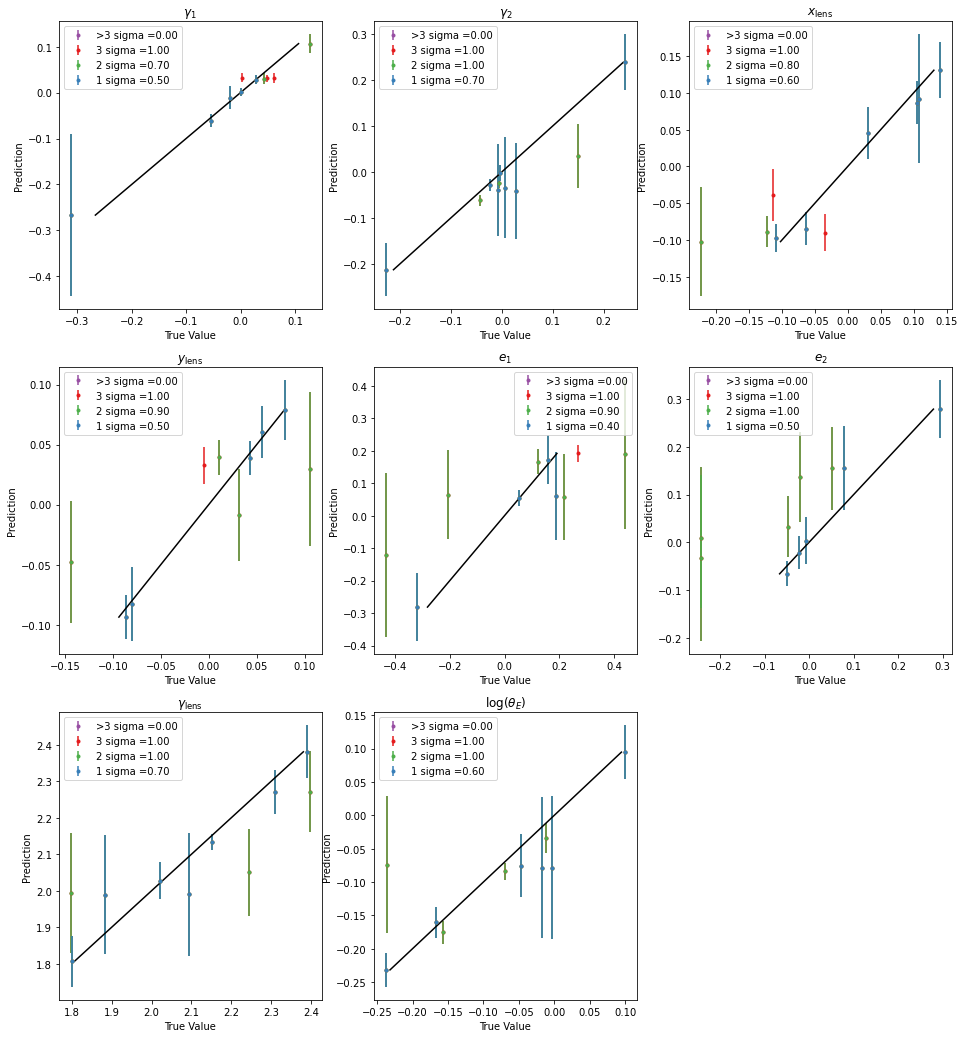

In [4]:
bnn_infer.gen_coverage_plots()

Another good check is to see the posterior of some example images.

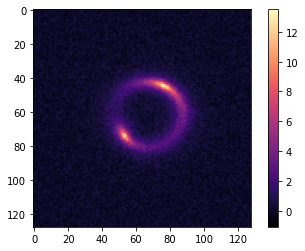

external_shear_g1 0.048173256
external_shear_g2 -0.0029258102
lens_mass_center_x 0.10458248
lens_mass_center_y 0.032046475
lens_mass_e1 0.123333566
lens_mass_e2 -0.04676816
lens_mass_gamma 2.0224562
lens_mass_theta_E_log -0.011567347


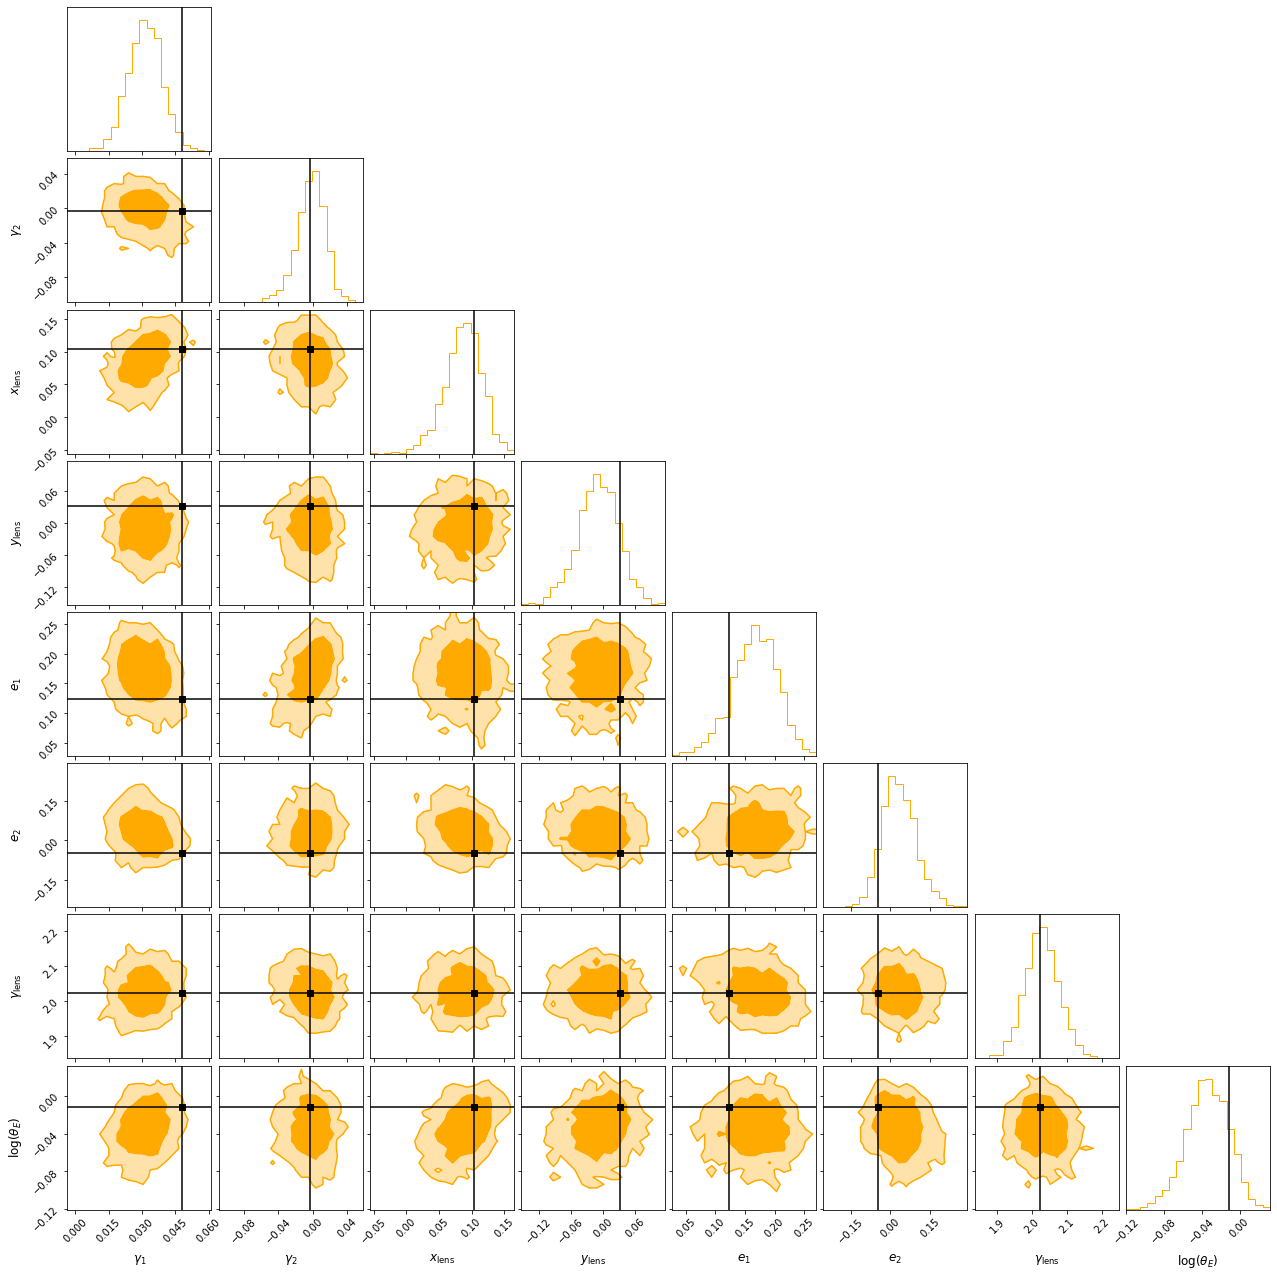

In [5]:
image_index = 5
bnn_infer.plot_posterior_contours(image_index)

It's important to understand where our uncertainty is coming from. We can inspect wether our uncertainty is dominated by aleatoric or epistemic sources. 

/home/parlange/ovejero/ovejero/bnn_inference.py:514: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+self.final_params_print_names)
/home/parlange/ovejero/ovejero/bnn_inference.py:515: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0]+self.final_params_print_names)


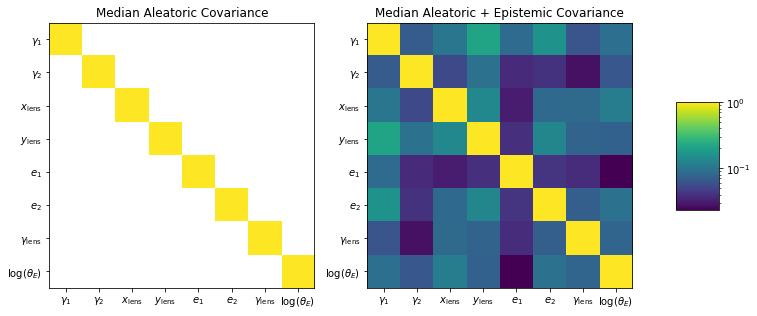

/home/parlange/ovejero/ovejero/bnn_inference.py:529: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[0].set_xticklabels([0]+self.final_params_print_names)
/home/parlange/ovejero/ovejero/bnn_inference.py:530: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[0].set_yticklabels([0]+self.final_params_print_names)


[<Figure size 864x360 with 3 Axes>, <Figure size 432x432 with 2 Axes>]

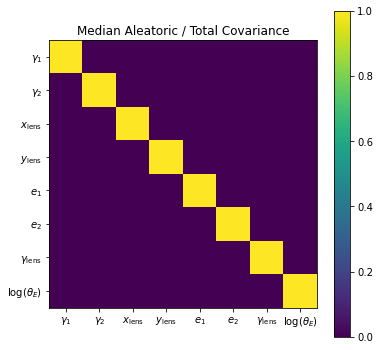

In [6]:
bnn_infer.comp_al_ep_unc()

At the end what we want our network's posterior to be well calibrated. That means that the truth should be a representative draw from the distribution we're predicting. The exact sampling that goes into the calibration plot is complicated, but the x axis repesents how much of the data the model expects to fall within a certain region of our posterior, and the y axis represents how much data actually falls within that region. Ideally this would be a straight line (y=x), but in practice our model is likely to be overconfident, underconfident, or some combination of both. The lower right hand corner of our plot represents overconfidence, and the upper right hand corner represents underconfidence.

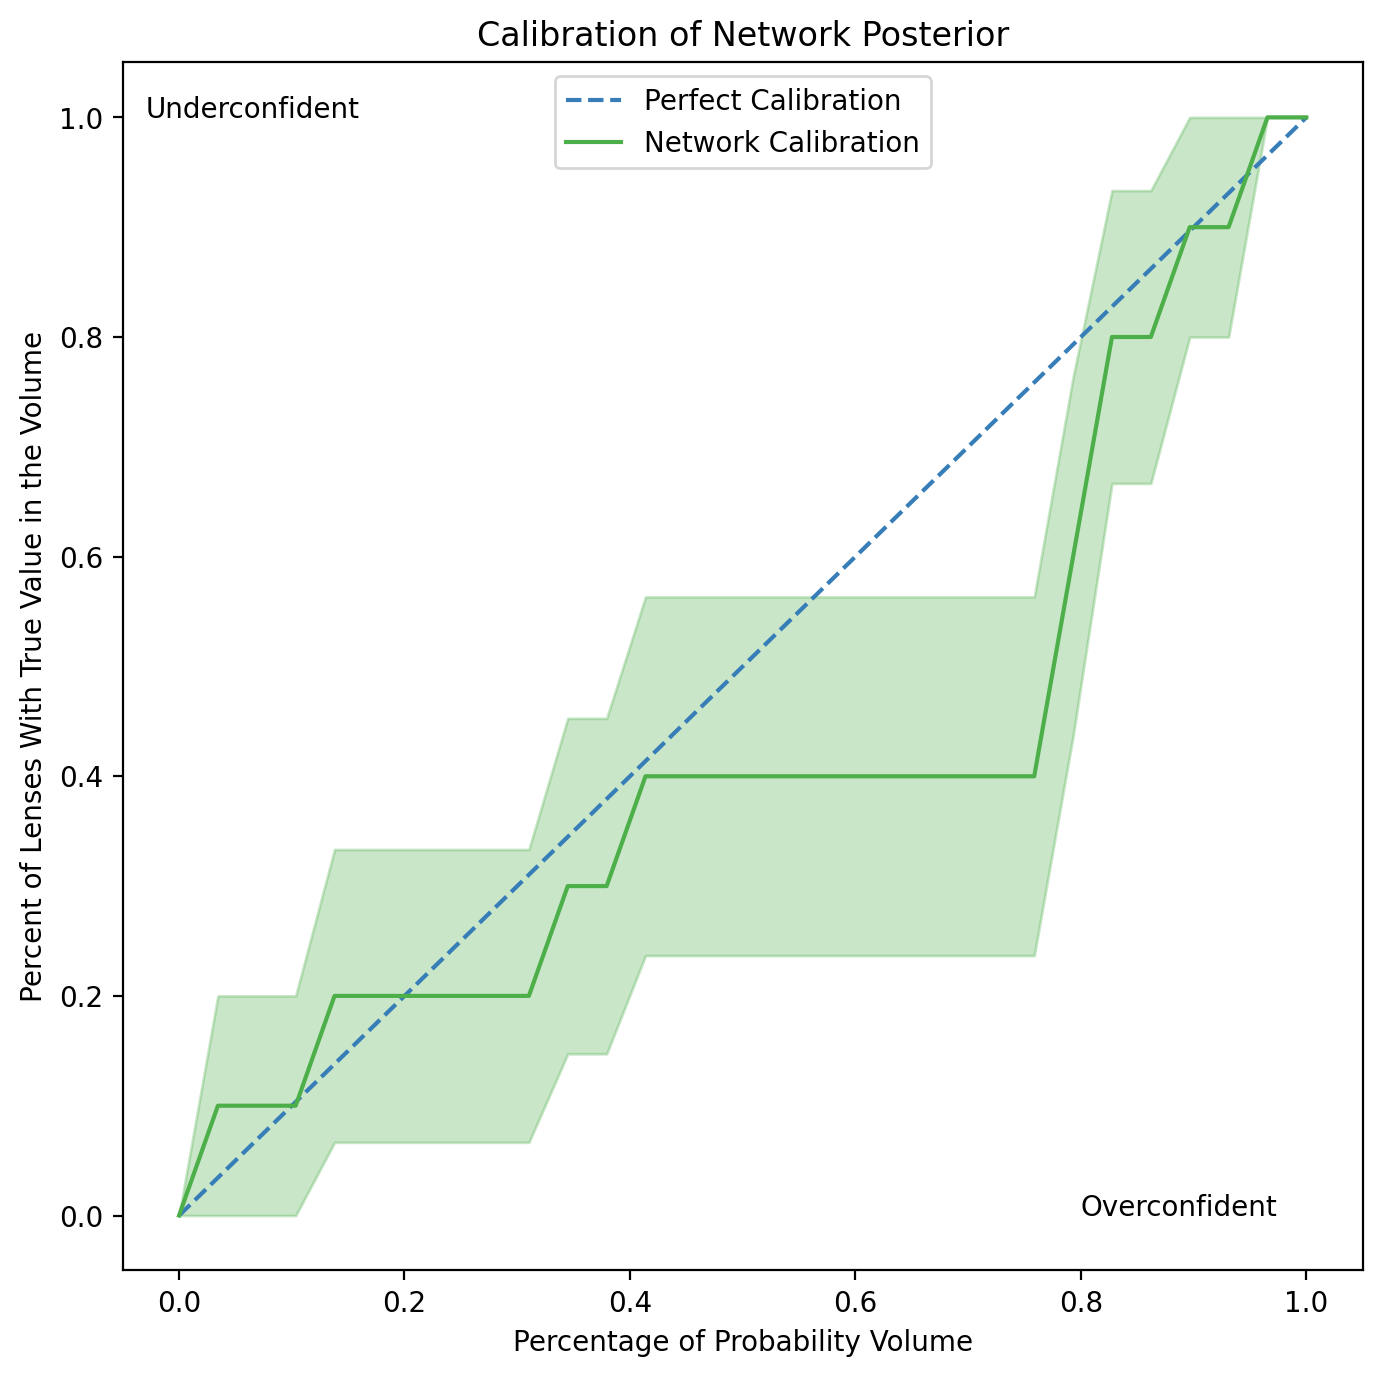

In [7]:
color_map = ["#377eb8", "#4daf4a"]
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points)

 ## Understanding the Calibration Plot

Throughout our paper we argue that the calibration plot is the best metric to asses the quality of the BNN posterior. Here, we include a few examples to give a better feel for the calibration plot. We focus on toy 2D models since those are easy to visualize and conceptualize. We can start with a biased 2D posterior prediction.

In [8]:
# First we'll make a class to generate our comparison
matplotlib.rcParams.update({'font.size': 13})
def plot_toy_model_calibration(data_mean,data_cov,post_mean,post_cov,toy_batch_size,n_draws,
                              fit_guass_data=False):
    bnn_toy = bnn_inference.InferenceClass(cfg)
    # We generate our toy data 
    data = np.random.multivariate_normal(data_mean,data_cov,(toy_batch_size))

    # Now we generate our posterior means and covariances
    post_samples = np.random.multivariate_normal(post_mean,post_cov,(n_draws,toy_batch_size))

    # We change our bnn inference instance to have these values
    bnn_toy.samples_init = True
    bnn_toy.y_pred = np.mean(post_samples,axis=0)
    bnn_toy.predict_samps = post_samples
    bnn_toy.y_test = data
    
    # We can visualize the true data and the posterior, and compare that to the calibration plot.
    color_map=["#377eb8", "#4daf4a"]
    fig = corner.corner(post_samples.reshape(-1,2),bins=20,labels=['x','y'],show_titles=False, plot_datapoints=False,
                  label_kwargs=dict(fontsize=15),levels=[0.68,0.95],dpi=200, 
                  color=color_map[1],fill_contours=True,range=[[-6,6],[-6,6]])
    fig.axes[2].plot(data[:,0],data[:,1],'.',c=color_map[0],alpha=0.1)
    post_line = mlines.Line2D([], [], color=color_map[0], label='True Posterior')
    data_line = mlines.Line2D([], [], color=color_map[1], label='Inferred Posterior')
    plt.legend(handles=[post_line,data_line], bbox_to_anchor=(0.05, 1.0, 1., .0), loc=4,fontsize=12)
    plt.show()
    
    cal_fig = bnn_toy.plot_calibration(n_perc_points=30,title='',
                                       legend=['Perfect Calibration','Inferred Posterior Calibration'])
    
    return (fig,cal_fig)

Is model built: True
Loaded weights /home/parlange/ovejero/test/test_data/test_model.h5
TFRecord found at /home/parlange/ovejero/test/test_data/tf_record_test_val


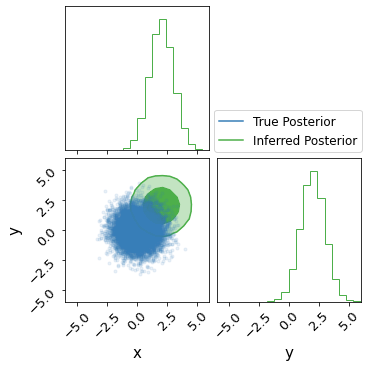

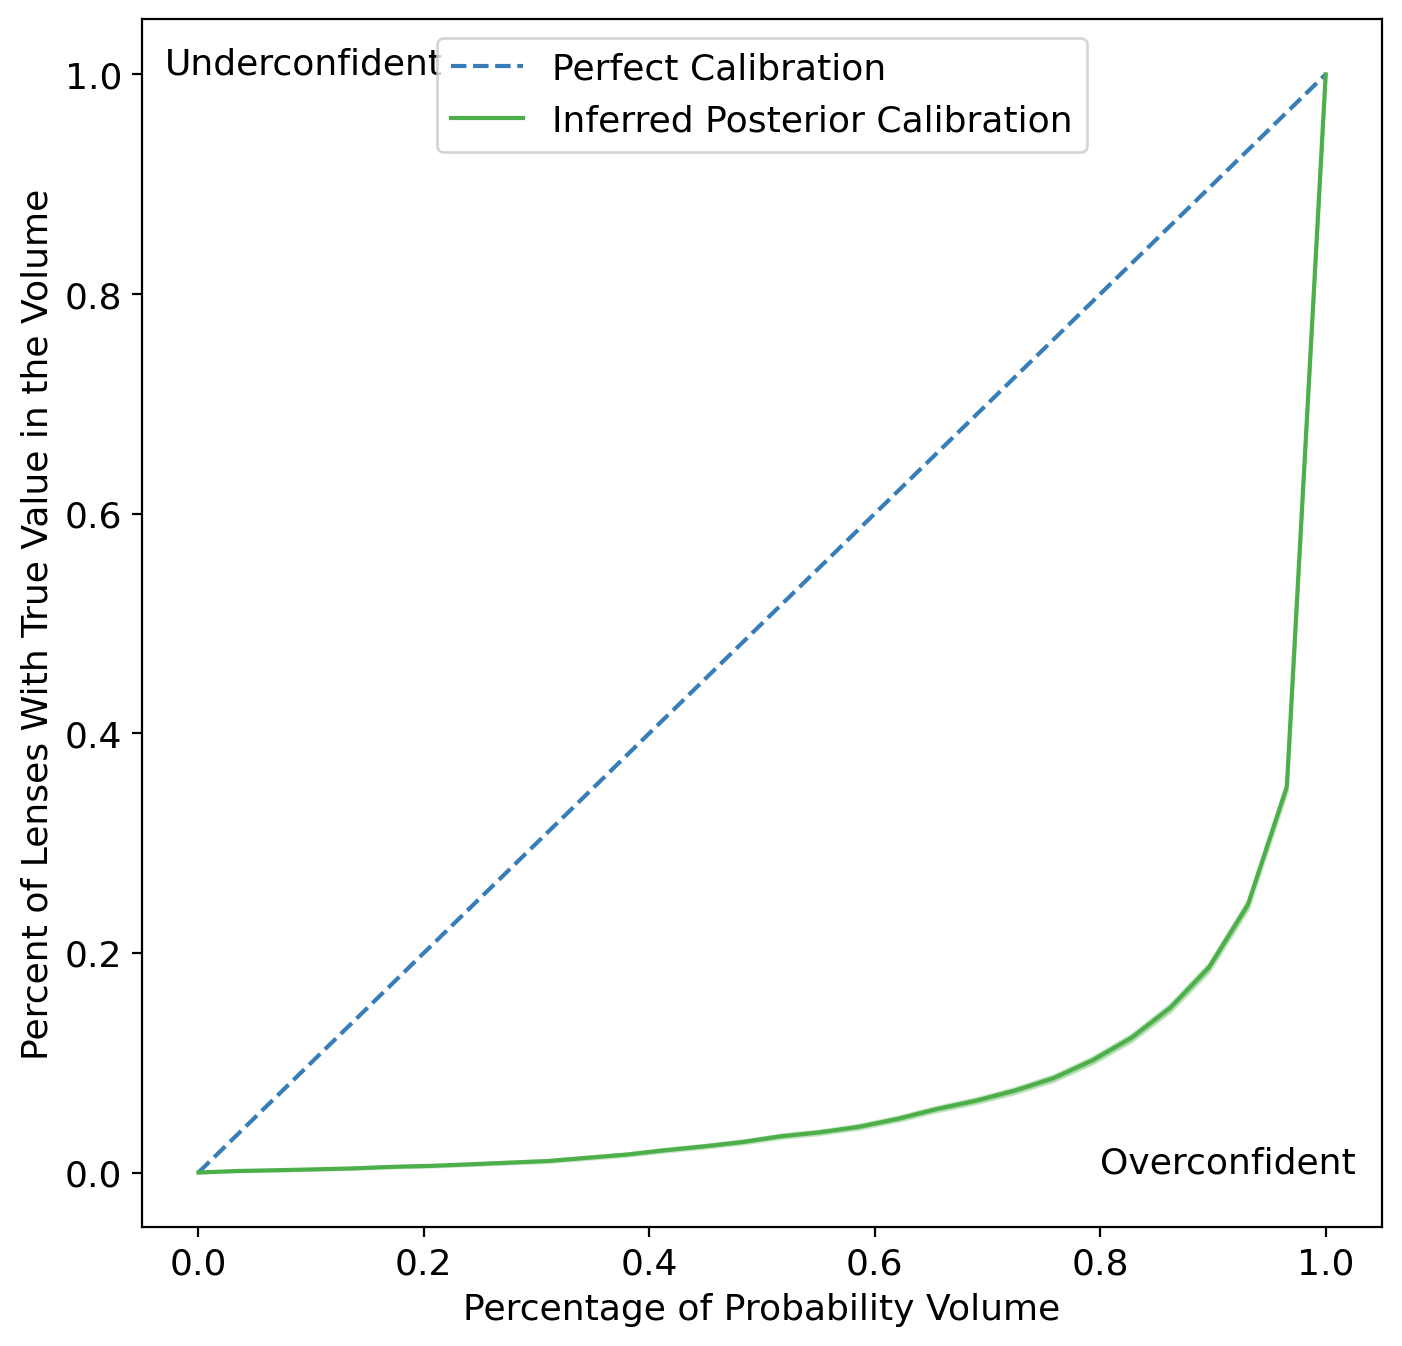

In [9]:
# We start with our offset posterior
data_mean = np.zeros(2)
data_cov = np.eye(2)
toy_batch_size = 10000
n_draws = 1000
post_mean = np.ones(2)*2
post_cov=np.eye(2)
post_fig, cal_fig = plot_toy_model_calibration(data_mean,data_cov,post_mean,post_cov,toy_batch_size,n_draws)
post_fig.savefig('/home/parlange/ovejero/paper/offset_corn.pdf')
cal_fig.savefig('/home/parlange/ovejero/paper/offset_cal.pdf')

The posterior we're predicting is offset from the truth, so our model is consistently overconfident. We can repeat the exercise with a posterior that is correctly centered but has a much tighter contour. We still expect our model to be overconfident.

Is model built: True
Loaded weights /home/parlange/ovejero/test/test_data/test_model.h5
TFRecord found at /home/parlange/ovejero/test/test_data/tf_record_test_val


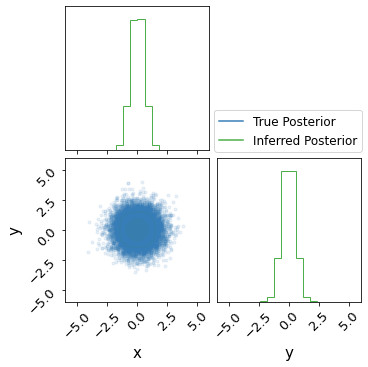

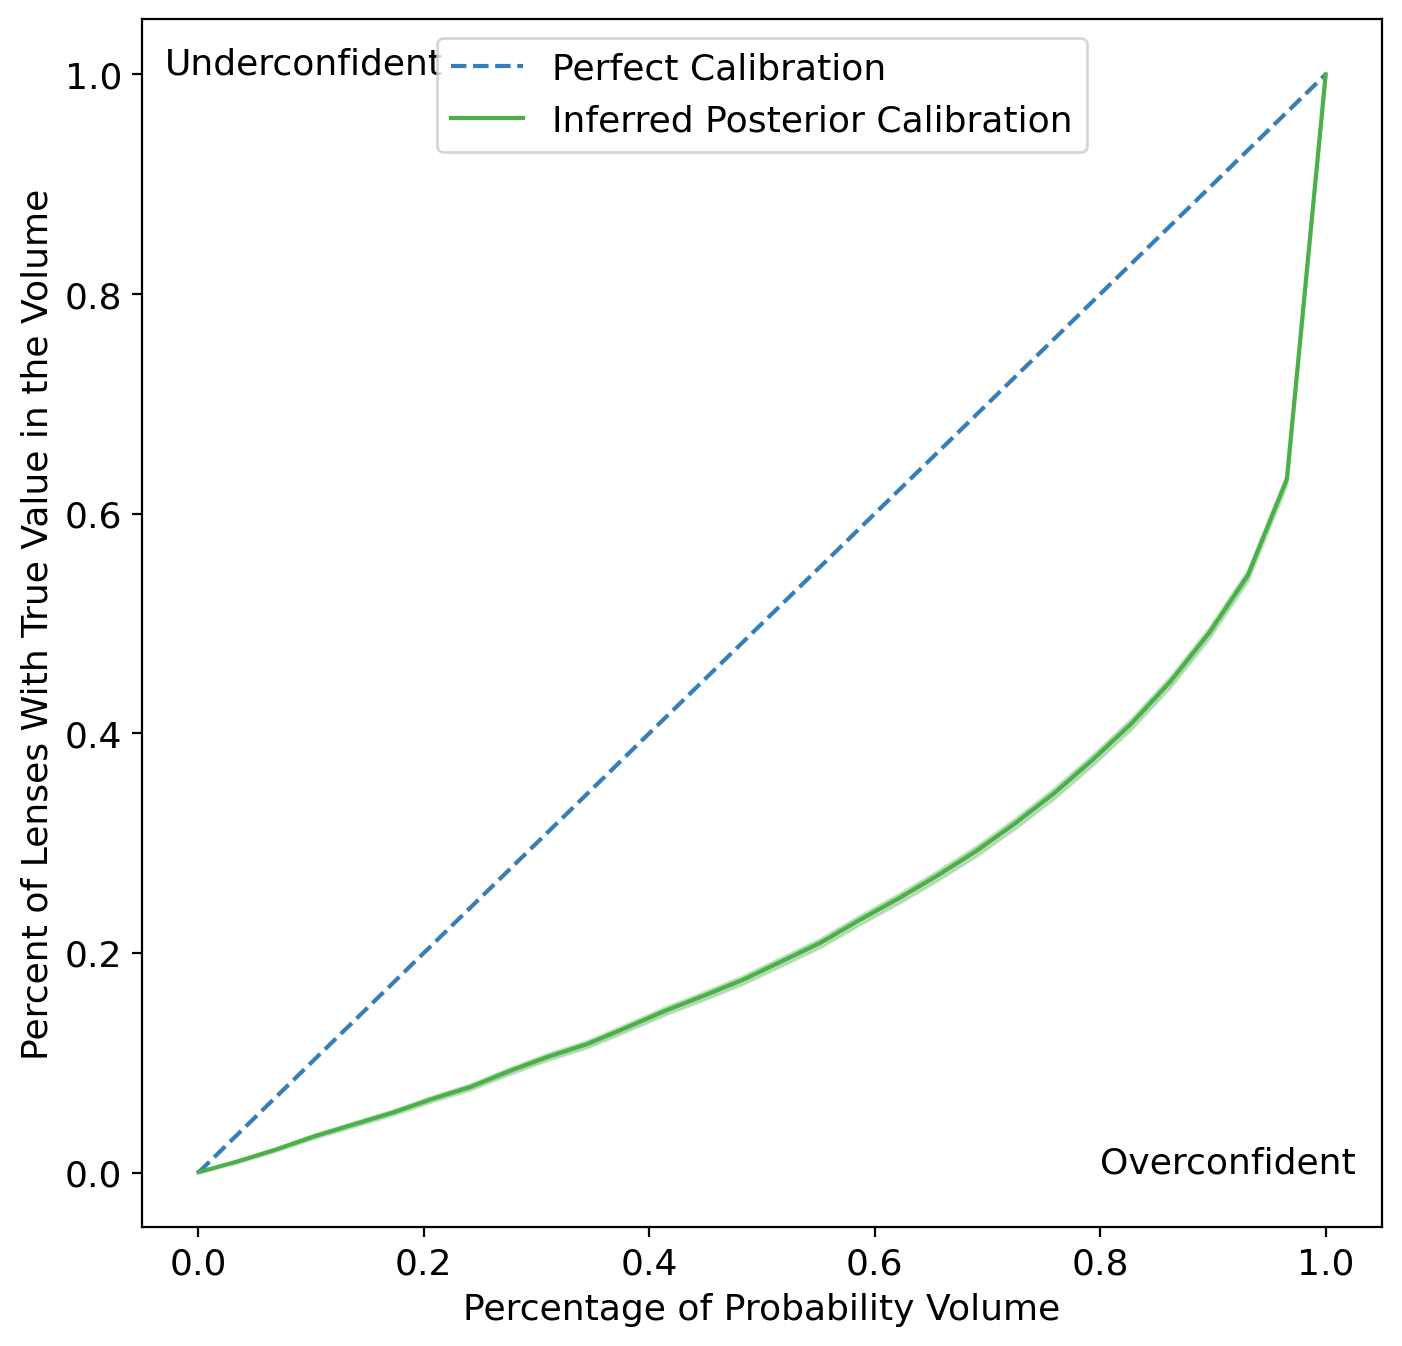

In [10]:
data_mean = np.zeros(2)
data_cov = np.eye(2)
toy_batch_size = 10000
n_draws = 1000
post_mean = np.zeros(2)
post_cov=np.eye(2)*0.3
_ = plot_toy_model_calibration(data_mean,data_cov,post_mean,post_cov,toy_batch_size,n_draws = 1000)

Once again, our model is overconfident. We can similary see what happens when our model is underconfident by expanding our contours.

Is model built: True
Loaded weights /home/parlange/ovejero/test/test_data/test_model.h5
TFRecord found at /home/parlange/ovejero/test/test_data/tf_record_test_val


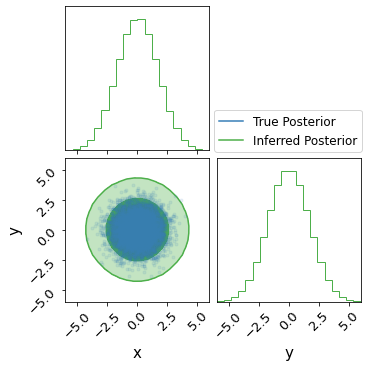

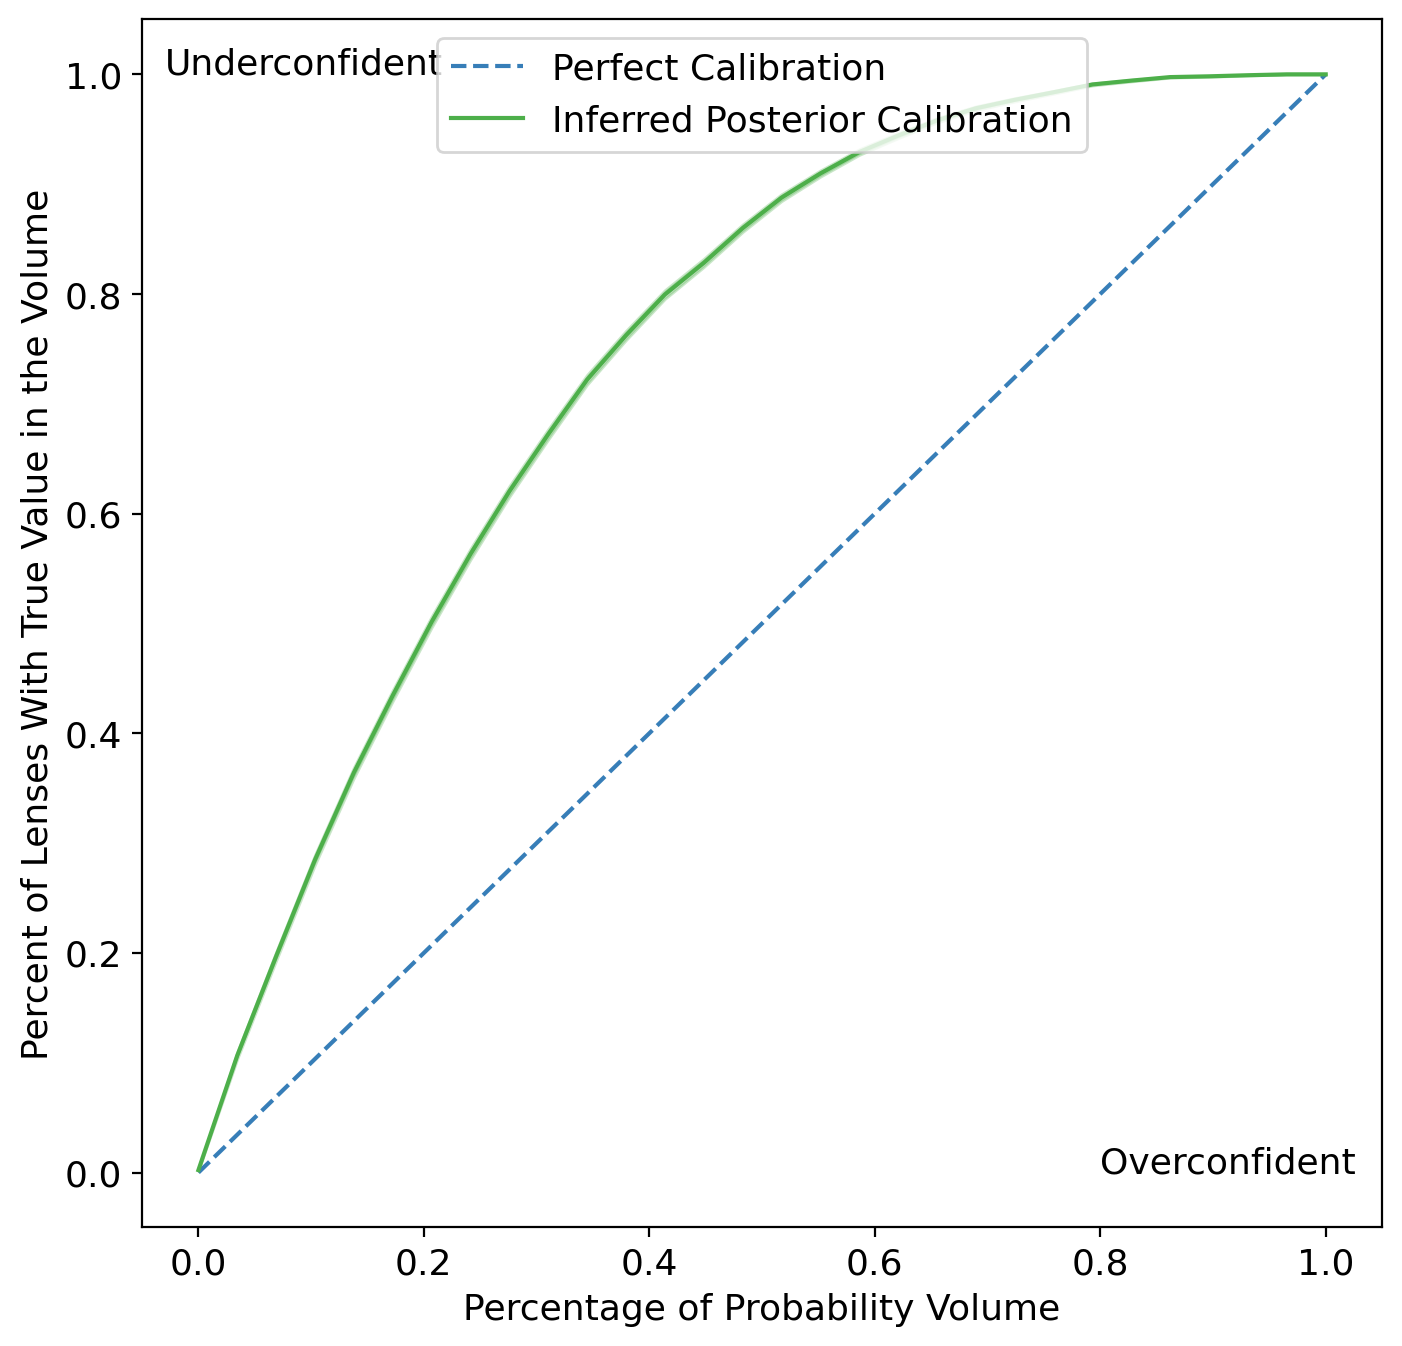

In [11]:
data_mean = np.zeros(2)
data_cov = np.eye(2)
toy_batch_size = 10000
n_draws = 1000
post_mean = np.zeros(2)
post_cov=np.eye(2)*3
post_fig, cal_fig = plot_toy_model_calibration(data_mean,data_cov,post_mean,post_cov,toy_batch_size,n_draws)
post_fig.savefig('/home/parlange/ovejero/paper/underconf_corn.pdf')
cal_fig.savefig('/home/parlange/ovejero/paper/underconf_cal.pdf')

The model posterior here is underconfident - almost 90% of the data falls within the 1 sigma countour. We can look at a more realistic example - a Gaussian posterior with no covariance trying to fit data with covariance.

Is model built: True
Loaded weights /home/parlange/ovejero/test/test_data/test_model.h5
TFRecord found at /home/parlange/ovejero/test/test_data/tf_record_test_val


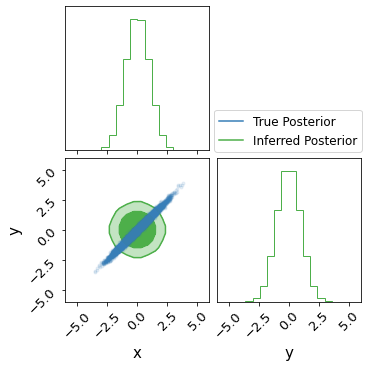

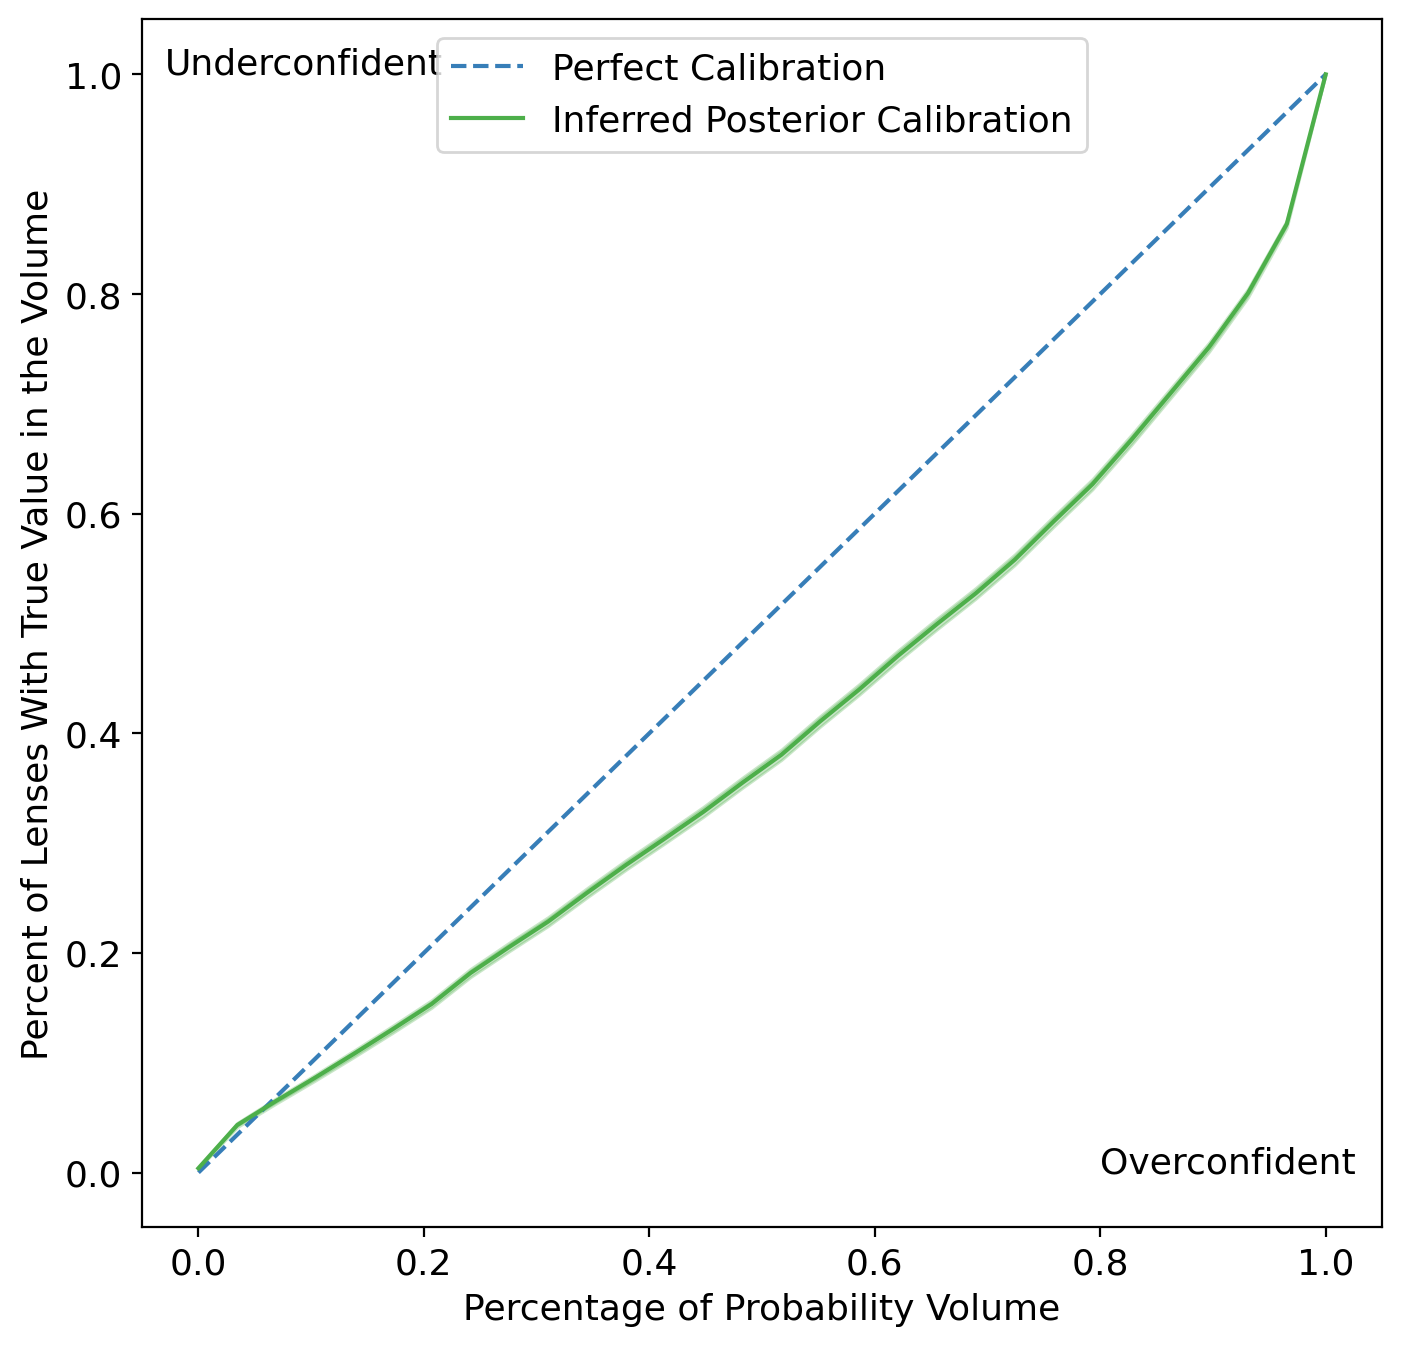

In [12]:
# We start with our offset posterior
data_mean = np.zeros(2)
data_cov = np.array([[1,0.99],[0.99,1]])
toy_batch_size = 10000
n_draws = 1000
post_mean = np.zeros(2)
post_cov=np.diag(np.std(np.random.multivariate_normal(data_mean,data_cov,(toy_batch_size)),axis=0))
_ = plot_toy_model_calibration(data_mean,data_cov,post_mean,post_cov,toy_batch_size,n_draws)

This comes off mostly as overconfident by our network - it's not capturing the extreme covariance in the data, causing the networks contours to assign too little probabilistic weight to the tails.

Another issue our network may have is that the posterior we pick is not sufficiently multimodal to capture the true distribution of the data (or the multimodality is poorly tuned). We can see what this looks like by fitting a full covariance matrix posterior to multimodal data.

In [15]:
# First we'll make a class to generate our comparison
def plot_toy_model_calibration_gm(data_means,data_covs,post_mean,post_cov,toy_batch_size,ps,n_draws,
                              fit_guass_data=False):
    bnn_toy = bnn_inference.InferenceClass(cfg)
    # We generate our toy data 
    data = []
    for dmi in range(len(data_means)):
        data.append(np.random.multivariate_normal(data_means[dmi],data_covs[dmi],(int(toy_batch_size*ps[dmi]))))
    data = np.concatenate(data,axis=0)
    
    if fit_guass_data == True:
        post_mean = np.mean(data,axis=0)
        post_cov=np.diag(np.std(data,axis=0))

    # Now we generate our posterior means and covariances
    post_samples = np.random.multivariate_normal(post_mean,post_cov,(n_draws,toy_batch_size))

    # We change our bnn inference instance to have these values
    bnn_toy.samples_init = True
    bnn_toy.y_pred = np.mean(post_samples,axis=0)
    bnn_toy.predict_samps = post_samples
    bnn_toy.y_test = data
    
    # We can visualize the true data and the posterior, and compare that to the calibration plot.
    color_map=["#377eb8", "#4daf4a"]
    fig = corner.corner(post_samples.reshape((-1,2)),bins=20,labels=['x','y'],show_titles=False, 
                        plot_datapoints=False,label_kwargs=dict(fontsize=15),levels=[0.68,0.95],dpi=1600, 
                        color=color_map[1],fill_contours=True,range=[[-6,6],[-6,6]])
    fig.axes[2].plot(data[:,0],data[:,1],'.',c=color_map[0],alpha=0.1)
    post_line = mlines.Line2D([], [], color=color_map[0], label='True Posterior')
    data_line = mlines.Line2D([], [], color=color_map[1], label='Inferred Posterior')
    plt.legend(handles=[data_line,post_line], bbox_to_anchor=(0.05, 1.0, 1., .0), loc=4,fontsize=12.0)
    plt.show()
    cal_fig = bnn_toy.plot_calibration(n_perc_points=30,title='',
                                       legend=['Perfect Calibration','Inferred Posterior Calibration'])
    return (fig,cal_fig)

Is model built: True
Loaded weights /home/parlange/ovejero/test/test_data/test_model.h5
TFRecord found at /home/parlange/ovejero/test/test_data/tf_record_test_val


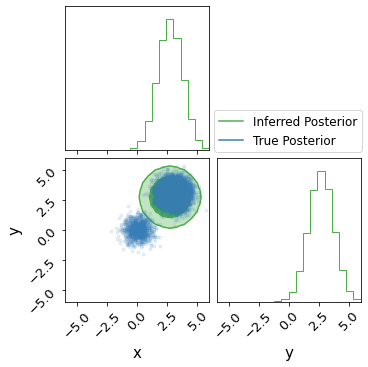

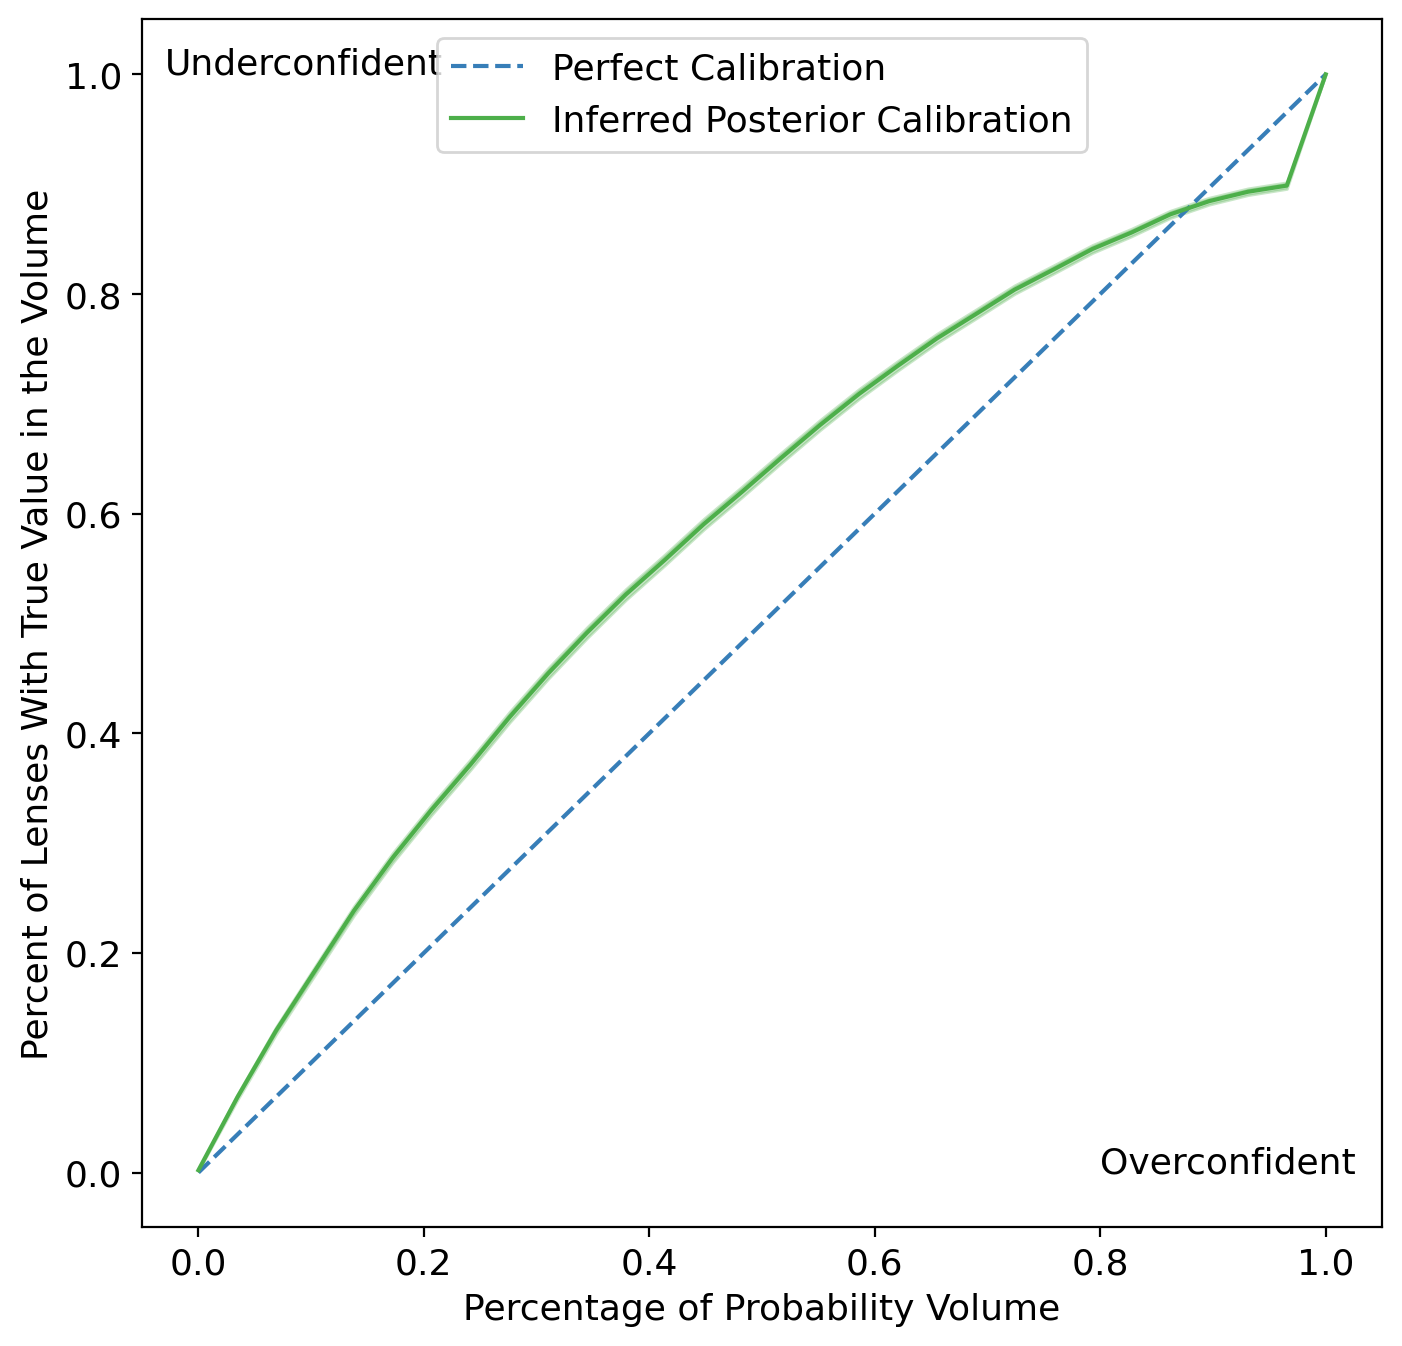

In [16]:
# Estimate a single Gaussian from the multimodal data.
data_means = [np.ones(2)*3,np.zeros(2)]
data_covs = [np.array([[0.4,0],[0,0.4]]),np.array([[0.4,0],[0,0.4]])]
ps = [0.9,0.1]
toy_batch_size = 10000
n_draws = 1000

data = []
for dmi in range(len(data_means)):
    data.append(np.random.multivariate_normal(data_means[dmi],data_covs[dmi],(toy_batch_size//len(
    data_mean))))
data = np.concatenate(data,axis=0)

post_mean = np.mean(data,axis=0)
post_cov=np.diag(np.std(data,axis=0))
post_fig, cal_fig = plot_toy_model_calibration_gm(data_means,data_covs,post_mean,post_cov,toy_batch_size,
                                                  ps,n_draws,fit_guass_data=True)
post_fig.savefig('/home/parlange/ovejero/paper/biv_corn.pdf')
cal_fig.savefig('/home/parlange/ovejero/paper/biv_cal.pdf')

Interestingly, the multimodal data leads to both under and over confidence by our network. In the interior region, corresponding to the principle mode, the toy prediction is has slightly too large covariances. In the tails, where our second mode becomes relevant, our single Gaussian prediction is suddenly very underconfident (since it assigns almost no weight to the second mode).